# LDA on the corpus : generation of features and plots

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import word_tokenize, download
from nltk.corpus import stopwords
from functools import reduce


In [59]:
df = pd.read_csv('../data/who_wrote_this_corpus_complete.csv', sep ='|')

In [60]:
download('punkt', quiet=True)
download("stopwords")
_punctuation = '.?!:;&()`"\'@°_-~'
CUSTOM_STOPWORDS = ["--", ".", ",", "!", ";", "’", ":", "?", "...", "'", "«", "»", '(', ')', '[', ']']
other_stopwords = ['comme', 'elles', "c'était", "qu'il", "qu'elle", 'où', 'car', 'sans', 'vers', 'encore', 'cette', 
                  'a', 'faire', 'fait', 'fais', 'à', 'donc', 'tout', 'cet', 'là', 'ceux', 'leur', 'leurs', 'parmi', 
                  'puis', 'ensuite', 'alors', "qu'ils", "qu'elles", "m'en", "j'en", 'dit-il', 'dit-elle', 'répondit',
                  "s'ils", 'vont', "s'il", "n'est", 'pourquoi', "lorsqu'il", "lorsqu'elle", "presque", 'lorsque', 
                  "contre", 'toujours', 'plus', 'dès', 'autre', 'tous', 'tout', 'si', "j'ai", "tous", 'tout', 'toutes',
                  'pourtant', "c'est", "cela", "être", "jamais", "s'était", "l'avait"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/slimane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
def make_stopwords_remover(stopwords):
    def stopwords_remover(words):
        return [word for word in words if word not in stopwords]

    return stopwords_remover

def flatten_count(accumulator, items):
    for item in items:
        accumulator[item] = accumulator.get(item, 0) + 1
    return accumulator

In [62]:
french_stopwords = set(stopwords.words("french")).union(CUSTOM_STOPWORDS).union(other_stopwords)
df["tokenized"] = df["paragraph"].str.lower().map(word_tokenize)
df["tokenized"] = df["tokenized"].map(make_stopwords_remover(french_stopwords))
docs = df["tokenized"].values

In [63]:
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=20, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in docs]

from gensim.models import LdaModel

# Set training parameters.
num_topics = 50
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2019-12-19 11:19:41,090 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-19 11:19:41,774 : INFO : adding document #10000 to Dictionary(44624 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 'apparence']...)
2019-12-19 11:19:42,121 : INFO : adding document #20000 to Dictionary(50968 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 'apparence']...)
2019-12-19 11:19:42,589 : INFO : adding document #30000 to Dictionary(61433 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 'apparence']...)
2019-12-19 11:19:43,208 : INFO : adding document #40000 to Dictionary(78493 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 'apparence']...)
2019-12-19 11:19:43,741 : INFO : adding document #50000 to Dictionary(83681 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 'apparence']...)
2019-12-19 11:19:44,333 : INFO : adding document #60000 to Dictionary(93306 unique tokens: ['_concha', 'aborder', 'alençon', 'ambitieux', 

2019-12-19 11:19:54,791 : INFO : topic diff=0.278909, rho=0.577350
2019-12-19 11:19:54,838 : INFO : PROGRESS: pass 0, at document #8000/64247
2019-12-19 11:19:55,832 : INFO : optimized alpha [0.021222966, 0.020076448, 0.0214766, 0.021693233, 0.020921703, 0.020871816, 0.020284519, 0.021312388, 0.021168433, 0.020903211, 0.020999689, 0.021399707, 0.02055632, 0.019933576, 0.018787587, 0.020930352, 0.020271825, 0.01987822, 0.020423094, 0.019800581, 0.01998688, 0.02047016, 0.01974215, 0.020624746, 0.02061429, 0.019859841, 0.021010702, 0.021258404, 0.020385766, 0.01967618, 0.020899728, 0.020552777, 0.020691155, 0.020659773, 0.020271463, 0.020298636, 0.019988032, 0.02070586, 0.021154871, 0.019890323, 0.021100601, 0.019974502, 0.020624965, 0.02008153, 0.02156516, 0.019560412, 0.020673906, 0.01924551, 0.019905623, 0.02071299]
2019-12-19 11:19:55,860 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:19:55,896 : INFO : topic #14 (0.019): 0.025*"bon" + 0.022

2019-12-19 11:19:59,557 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:19:59,599 : INFO : topic #36 (0.020): 0.024*"capitaine" + 0.013*"siège" + 0.011*"lit" + 0.010*"colonel" + 0.010*"porte" + 0.008*"dîner" + 0.007*"grande" + 0.007*"nuit" + 0.007*"d'une" + 0.007*"deux"
2019-12-19 11:19:59,601 : INFO : topic #47 (0.020): 0.046*"cent" + 0.042*"entendu" + 0.039*"_" + 0.026*"quart" + 0.025*"d'ici" + 0.024*"livres" + 0.021*"entendit" + 0.021*"deux" + 0.021*"d'heure" + 0.020*"l'honneur"
2019-12-19 11:19:59,602 : INFO : topic #48 (0.024): 0.107*"cardinal" + 0.036*"gardes" + 0.030*"reine" + 0.021*"carrosse" + 0.015*"deux" + 0.013*"roi" + 0.013*"vin" + 0.010*"régiment" + 0.009*"blessé" + 0.007*"d'un"
2019-12-19 11:19:59,603 : INFO : topic #2 (0.024): 0.047*"dit" + 0.046*"bien" + 0.025*"oui" + 0.020*"eh" + 0.018*"non" + 0.016*"monsieur" + 0.015*"voyons" + 0.013*"oh" + 0.012*"l'ai" + 0.011*"voilà"
2019-12-19 11:19:59,605 : INFO : topic #8 (0.025): 0.258

2019-12-19 11:20:03,223 : INFO : topic #47 (0.022): 0.098*"cent" + 0.052*"entendu" + 0.033*"livres" + 0.028*"l'honneur" + 0.026*"quart" + 0.024*"sorte" + 0.022*"d'ici" + 0.021*"possible" + 0.019*"entendit" + 0.019*"deux"
2019-12-19 11:20:03,224 : INFO : topic #2 (0.026): 0.049*"dit" + 0.046*"bien" + 0.031*"oui" + 0.023*"non" + 0.021*"eh" + 0.020*"monsieur" + 0.018*"voyons" + 0.014*"l'ai" + 0.014*"oh" + 0.014*"voilà"
2019-12-19 11:20:03,226 : INFO : topic #8 (0.027): 0.348*"m." + 0.035*"dit" + 0.031*"monseigneur" + 0.018*"comte" + 0.010*"chez" + 0.009*"prince" + 0.009*"main" + 0.008*"conduire" + 0.008*"général" + 0.007*"quitté"
2019-12-19 11:20:03,228 : INFO : topic #35 (0.028): 0.105*"monsieur" + 0.083*"dit" + 0.068*"bien" + 0.066*"comte" + 0.049*"ah" + 0.040*"eh" + 0.025*"s'écria" + 0.019*"oh" + 0.013*"voici" + 0.013*"l'abbé"
2019-12-19 11:20:03,230 : INFO : topic diff=0.275843, rho=0.288675
2019-12-19 11:20:03,273 : INFO : PROGRESS: pass 0, at document #26000/64247
2019-12-19 11:20:0

2019-12-19 11:20:07,465 : INFO : topic #35 (0.030): 0.100*"monsieur" + 0.068*"dit" + 0.067*"bien" + 0.049*"ah" + 0.046*"comte" + 0.030*"s'écria" + 0.026*"eh" + 0.018*"vite" + 0.017*"voici" + 0.016*"oh"
2019-12-19 11:20:07,467 : INFO : topic #5 (0.031): 0.029*"main" + 0.019*"porte" + 0.018*"d'un" + 0.018*"yeux" + 0.017*"venait" + 0.015*"leva" + 0.014*"entra" + 0.013*"tête" + 0.012*"l'obscurité" + 0.011*"moment"
2019-12-19 11:20:07,469 : INFO : topic diff=0.317273, rho=0.250000
2019-12-19 11:20:07,512 : INFO : PROGRESS: pass 0, at document #34000/64247
2019-12-19 11:20:08,511 : INFO : optimized alpha [0.030287568, 0.025560636, 0.02917181, 0.029756395, 0.028252486, 0.03178728, 0.02798104, 0.027793864, 0.02884102, 0.028662996, 0.027058301, 0.026447628, 0.028413398, 0.026109451, 0.024270974, 0.027936812, 0.027108002, 0.025235094, 0.025344346, 0.024723904, 0.025235642, 0.026750058, 0.024535619, 0.029713446, 0.028478457, 0.02450419, 0.030658768, 0.026565896, 0.030295623, 0.025725732, 0.027374

2019-12-19 11:20:11,432 : INFO : topic #26 (0.036): 0.059*"mme" + 0.019*"derrière" + 0.018*"l'ombre" + 0.012*"doigts" + 0.011*"voix" + 0.009*"loup" + 0.009*"ténèbres" + 0.009*"autour" + 0.009*"banc" + 0.008*"sentit"
2019-12-19 11:20:11,434 : INFO : topic diff=0.265696, rho=0.223607
2019-12-19 11:20:11,480 : INFO : PROGRESS: pass 0, at document #42000/64247
2019-12-19 11:20:12,246 : INFO : optimized alpha [0.035093457, 0.027341366, 0.031211333, 0.0318439, 0.031333547, 0.036622945, 0.03145019, 0.031048344, 0.030368308, 0.030394947, 0.029843576, 0.029426787, 0.033172067, 0.027884249, 0.02598971, 0.030140106, 0.028992727, 0.026867855, 0.027427908, 0.026944783, 0.027931385, 0.030006472, 0.026014611, 0.033294477, 0.03311112, 0.026086606, 0.036964558, 0.030908106, 0.032850996, 0.027684655, 0.03077735, 0.029671459, 0.031650074, 0.028578732, 0.027978234, 0.031440187, 0.027104646, 0.027000401, 0.032315914, 0.026536632, 0.03518946, 0.027516915, 0.033077482, 0.027115788, 0.029579174, 0.028416328, 

2019-12-19 11:20:15,800 : INFO : topic diff=0.235729, rho=0.204124
2019-12-19 11:20:15,839 : INFO : PROGRESS: pass 0, at document #50000/64247
2019-12-19 11:20:17,441 : INFO : optimized alpha [0.03841722, 0.029178511, 0.034126293, 0.035532556, 0.033728216, 0.04013132, 0.034239467, 0.033025768, 0.03298227, 0.033834383, 0.032633934, 0.03130196, 0.03679329, 0.030023215, 0.02898369, 0.033385307, 0.031642612, 0.028487133, 0.02964812, 0.029243326, 0.033172913, 0.03316083, 0.027807089, 0.039659247, 0.036336076, 0.02794603, 0.041396383, 0.032749705, 0.035600796, 0.030711336, 0.032899406, 0.03192325, 0.035930805, 0.03146237, 0.030972766, 0.034556005, 0.029381676, 0.029129501, 0.037041698, 0.029001715, 0.039720073, 0.029883869, 0.036353312, 0.02909663, 0.032091465, 0.031391617, 0.035932764, 0.02668084, 0.030875407, 0.029825946]
2019-12-19 11:20:17,469 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:17,499 : INFO : topic #47 (0.027): 0.094*"cent" + 0.

2019-12-19 11:20:22,518 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:22,548 : INFO : topic #47 (0.028): 0.174*"cent" + 0.053*"possible" + 0.050*"livres" + 0.033*"entendu" + 0.031*"triste" + 0.027*"quart" + 0.025*"_" + 0.020*"sorte" + 0.019*"d'heure" + 0.017*"placer"
2019-12-19 11:20:22,549 : INFO : topic #22 (0.029): 0.018*"richelieu" + 0.018*"commençait" + 0.017*"folie" + 0.016*"sortes" + 0.014*"puissant" + 0.013*"l'histoire" + 0.013*"sage" + 0.013*"entier" + 0.011*"quelquefois" + 0.011*"l'occasion"
2019-12-19 11:20:22,551 : INFO : topic #23 (0.043): 0.021*"vie" + 0.017*"bien" + 0.016*"dieu" + 0.010*"mort" + 0.010*"âme" + 0.010*"bonheur" + 0.008*"trop" + 0.008*"malheur" + 0.008*"quand" + 0.008*"peut-être"
2019-12-19 11:20:22,552 : INFO : topic #40 (0.045): 0.014*"d'un" + 0.013*"peu" + 0.013*"dont" + 0.012*"figure" + 0.011*"d'une" + 0.008*"yeux" + 0.008*"quelque" + 0.007*"fleuve" + 0.007*"noir" + 0.006*"beauté"
2019-12-19 11:20:22,554 : 

2019-12-19 11:20:26,280 : INFO : topic #22 (0.032): 0.031*"finit" + 0.026*"folie" + 0.023*"richelieu" + 0.023*"sage" + 0.018*"sortes" + 0.018*"commençait" + 0.016*"entier" + 0.016*"l'histoire" + 0.014*"fabricant" + 0.014*"révolutionnaires"
2019-12-19 11:20:26,282 : INFO : topic #5 (0.050): 0.031*"d'un" + 0.026*"main" + 0.023*"yeux" + 0.023*"venait" + 0.021*"bras" + 0.019*"regardait" + 0.017*"coup" + 0.016*"tête" + 0.016*"geste" + 0.015*"d'une"
2019-12-19 11:20:26,283 : INFO : topic #40 (0.053): 0.017*"d'un" + 0.014*"dont" + 0.014*"d'une" + 0.009*"peu" + 0.009*"femme" + 0.009*"figure" + 0.008*"yeux" + 0.007*"noire" + 0.007*"faisait" + 0.007*"toute"
2019-12-19 11:20:26,284 : INFO : topic #26 (0.053): 0.042*"mme" + 0.016*"derrière" + 0.013*"silence" + 0.011*"voix" + 0.010*"d'une" + 0.010*"corps" + 0.010*"montaient" + 0.010*"l'ombre" + 0.010*"lentement" + 0.009*"coup"
2019-12-19 11:20:26,287 : INFO : topic diff=0.199400, rho=0.174078
2019-12-19 11:20:26,320 : INFO : PROGRESS: pass 1, at do

2019-12-19 11:20:30,568 : INFO : topic #26 (0.056): 0.031*"mme" + 0.015*"derrière" + 0.012*"silence" + 0.012*"voix" + 0.011*"l'ombre" + 0.010*"d'une" + 0.009*"doigts" + 0.009*"coup" + 0.009*"lentement" + 0.008*"d'un"
2019-12-19 11:20:30,569 : INFO : topic #40 (0.058): 0.016*"d'un" + 0.014*"dont" + 0.013*"d'une" + 0.012*"femme" + 0.009*"figure" + 0.008*"peu" + 0.007*"yeux" + 0.007*"femmes" + 0.007*"faisait" + 0.007*"vieille"
2019-12-19 11:20:30,572 : INFO : topic #23 (0.058): 0.025*"vie" + 0.015*"bien" + 0.014*"dieu" + 0.012*"femme" + 0.012*"cœur" + 0.010*"mort" + 0.009*"quand" + 0.009*"trop" + 0.009*"mère" + 0.009*"père"
2019-12-19 11:20:30,577 : INFO : topic diff=0.113944, rho=0.171188
2019-12-19 11:20:30,610 : INFO : PROGRESS: pass 1, at document #10000/64247
2019-12-19 11:20:31,203 : INFO : optimized alpha [0.052282322, 0.037997026, 0.050775167, 0.047525126, 0.04656836, 0.055057682, 0.045589637, 0.04202594, 0.037905984, 0.046690714, 0.04278135, 0.041134853, 0.05282213, 0.03731124, 0

2019-12-19 11:20:33,335 : INFO : topic #23 (0.062): 0.023*"vie" + 0.017*"dieu" + 0.015*"bien" + 0.012*"femme" + 0.010*"mort" + 0.008*"trop" + 0.008*"cœur" + 0.008*"quand" + 0.008*"malheur" + 0.008*"âme"
2019-12-19 11:20:33,337 : INFO : topic diff=0.115230, rho=0.171188
2019-12-19 11:20:33,370 : INFO : PROGRESS: pass 1, at document #18000/64247
2019-12-19 11:20:33,941 : INFO : optimized alpha [0.054157924, 0.040120482, 0.056491513, 0.048371788, 0.047756415, 0.05918617, 0.047887936, 0.043472353, 0.040246442, 0.051066916, 0.043846767, 0.041644327, 0.05429345, 0.038588054, 0.03702205, 0.04464654, 0.043583367, 0.03661426, 0.03895346, 0.037420813, 0.05174542, 0.04554554, 0.034904186, 0.062344395, 0.053565755, 0.036707252, 0.05697489, 0.040441766, 0.050111257, 0.04298298, 0.04436116, 0.04216383, 0.05359788, 0.042564344, 0.041023053, 0.054972444, 0.039750345, 0.0376077, 0.05383948, 0.038172673, 0.058403913, 0.04091549, 0.051506627, 0.03896207, 0.04078856, 0.04610447, 0.050376967, 0.03381799, 0

2019-12-19 11:20:36,324 : INFO : PROGRESS: pass 1, at document #26000/64247
2019-12-19 11:20:36,977 : INFO : optimized alpha [0.057815086, 0.0424991, 0.06258608, 0.05045176, 0.04866267, 0.063344456, 0.050301585, 0.0452484, 0.041850764, 0.05499645, 0.045442354, 0.04269289, 0.05674028, 0.040026236, 0.037963614, 0.046560176, 0.045000795, 0.037364166, 0.0400646, 0.03877913, 0.055776075, 0.04696099, 0.035767756, 0.06754414, 0.055298917, 0.038001295, 0.059759464, 0.04159436, 0.052453056, 0.04456333, 0.045634914, 0.04349831, 0.05709061, 0.045040663, 0.042589035, 0.06275686, 0.040519, 0.03933899, 0.055682756, 0.039242744, 0.05998449, 0.04235535, 0.05398659, 0.04067512, 0.04202722, 0.04813779, 0.052538626, 0.03473327, 0.042245664, 0.040428028]
2019-12-19 11:20:37,005 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:37,034 : INFO : topic #47 (0.035): 0.121*"cent" + 0.071*"entendu" + 0.047*"livres" + 0.037*"possible" + 0.029*"triste" + 0.028*"l'honneur

2019-12-19 11:20:40,560 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:40,589 : INFO : topic #47 (0.037): 0.116*"cent" + 0.082*"_" + 0.068*"possible" + 0.051*"entendu" + 0.046*"livres" + 0.034*"triste" + 0.027*"quart" + 0.026*"désormais" + 0.025*"sorte" + 0.023*"sauvé"
2019-12-19 11:20:40,591 : INFO : topic #22 (0.038): 0.030*"peuple" + 0.025*"l'histoire" + 0.020*"commençait" + 0.020*"quelquefois" + 0.019*"volontiers" + 0.019*"sortes" + 0.015*"l'émeute" + 0.014*"merci" + 0.014*"mêlée" + 0.012*"songea"
2019-12-19 11:20:40,592 : INFO : topic #40 (0.067): 0.012*"d'un" + 0.012*"peu" + 0.011*"d'une" + 0.011*"dont" + 0.010*"figure" + 0.010*"faisait" + 0.009*"quelque" + 0.009*"femme" + 0.009*"chose" + 0.008*"homme"
2019-12-19 11:20:40,593 : INFO : topic #5 (0.069): 0.040*"main" + 0.024*"d'un" + 0.020*"yeux" + 0.019*"bras" + 0.017*"homme" + 0.017*"fit" + 0.017*"tête" + 0.017*"prit" + 0.016*"coup" + 0.016*"porte"
2019-12-19 11:20:40,594 : INFO : to

2019-12-19 11:20:43,663 : INFO : topic #22 (0.040): 0.030*"peuple" + 0.027*"commençait" + 0.021*"l'histoire" + 0.021*"quelquefois" + 0.021*"sortes" + 0.016*"finit" + 0.015*"songea" + 0.014*"l'occasion" + 0.014*"cause" + 0.013*"volontiers"
2019-12-19 11:20:43,664 : INFO : topic #40 (0.075): 0.014*"d'un" + 0.012*"peu" + 0.012*"figure" + 0.012*"femme" + 0.012*"d'une" + 0.010*"faisait" + 0.010*"dont" + 0.009*"quelque" + 0.009*"noir" + 0.008*"chose"
2019-12-19 11:20:43,665 : INFO : topic #5 (0.076): 0.037*"main" + 0.029*"d'un" + 0.023*"bras" + 0.019*"yeux" + 0.017*"prit" + 0.017*"coup" + 0.016*"tête" + 0.016*"fit" + 0.015*"entra" + 0.014*"homme"
2019-12-19 11:20:43,666 : INFO : topic #23 (0.079): 0.023*"vie" + 0.022*"dieu" + 0.013*"bien" + 0.013*"mort" + 0.012*"femme" + 0.010*"quand" + 0.010*"père" + 0.009*"bonheur" + 0.009*"mère" + 0.008*"enfant"
2019-12-19 11:20:43,668 : INFO : topic diff=0.070773, rho=0.171188
2019-12-19 11:20:43,701 : INFO : PROGRESS: pass 1, at document #44000/64247
20

2019-12-19 11:20:46,765 : INFO : topic #40 (0.081): 0.014*"figure" + 0.014*"peu" + 0.012*"femme" + 0.012*"d'un" + 0.010*"dont" + 0.010*"d'une" + 0.010*"voyait" + 0.010*"yeux" + 0.010*"faisait" + 0.009*"quelque"
2019-12-19 11:20:46,766 : INFO : topic #23 (0.091): 0.026*"vie" + 0.018*"dieu" + 0.016*"bonheur" + 0.015*"bien" + 0.013*"mort" + 0.013*"âme" + 0.011*"malheur" + 0.011*"femme" + 0.009*"quand" + 0.008*"peut-être"
2019-12-19 11:20:46,768 : INFO : topic diff=0.097312, rho=0.171188
2019-12-19 11:20:46,801 : INFO : PROGRESS: pass 1, at document #52000/64247
2019-12-19 11:20:47,455 : INFO : optimized alpha [0.07604968, 0.048345607, 0.075747326, 0.06101152, 0.059093233, 0.0812251, 0.062464774, 0.054062378, 0.049203895, 0.06437131, 0.05604172, 0.053848717, 0.0753245, 0.047478378, 0.045301195, 0.05746273, 0.053218585, 0.04449161, 0.049117237, 0.046878997, 0.081500605, 0.060744535, 0.042521928, 0.09294373, 0.07270439, 0.044889696, 0.08099852, 0.05175422, 0.062799975, 0.054441612, 0.0573448

2019-12-19 11:20:49,581 : INFO : topic #23 (0.095): 0.023*"vie" + 0.017*"dieu" + 0.015*"bien" + 0.013*"mort" + 0.012*"bonheur" + 0.011*"âme" + 0.009*"malheur" + 0.008*"quand" + 0.008*"femme" + 0.008*"peut-être"
2019-12-19 11:20:49,583 : INFO : topic diff=0.062160, rho=0.171188
2019-12-19 11:20:49,665 : INFO : PROGRESS: pass 1, at document #60000/64247
2019-12-19 11:20:50,604 : INFO : optimized alpha [0.07833996, 0.051474124, 0.082437225, 0.06531993, 0.067841046, 0.08606858, 0.0675674, 0.057411384, 0.049777422, 0.06897921, 0.059827186, 0.057271402, 0.08159967, 0.050207134, 0.047100615, 0.061186343, 0.056266345, 0.046981663, 0.05189601, 0.049016725, 0.08799011, 0.066852525, 0.044583593, 0.09859402, 0.08287883, 0.047489185, 0.08568269, 0.053551055, 0.06662662, 0.058476068, 0.062499344, 0.05458913, 0.082309544, 0.059022766, 0.056122247, 0.07441885, 0.052676003, 0.048784684, 0.08698533, 0.049676042, 0.09110651, 0.052840408, 0.06936253, 0.05013536, 0.05461244, 0.06298019, 0.079001874, 0.0418

2019-12-19 11:20:52,714 : INFO : topic diff=0.129888, rho=0.171188
2019-12-19 11:20:52,751 : INFO : PROGRESS: pass 2, at document #2000/64247
2019-12-19 11:20:53,579 : INFO : optimized alpha [0.08825285, 0.05622225, 0.09378059, 0.069880016, 0.075330324, 0.09799837, 0.07446751, 0.062446702, 0.05105136, 0.07429564, 0.06593283, 0.065035, 0.09330069, 0.05424955, 0.049791545, 0.06651983, 0.062123224, 0.051757973, 0.056518435, 0.05333265, 0.1048046, 0.0746505, 0.04824566, 0.113000825, 0.09477788, 0.05147523, 0.09630315, 0.058383677, 0.0732655, 0.06294304, 0.07089409, 0.060454477, 0.089118384, 0.064689115, 0.061235614, 0.08135181, 0.059431154, 0.05263563, 0.097420804, 0.055388942, 0.10354888, 0.056822896, 0.07873293, 0.053910796, 0.059782855, 0.06914447, 0.08889331, 0.04471556, 0.054931954, 0.056787927]
2019-12-19 11:20:53,607 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:53,637 : INFO : topic #47 (0.045): 0.141*"cent" + 0.062*"possible" + 0.037

2019-12-19 11:20:56,448 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:20:56,476 : INFO : topic #47 (0.047): 0.132*"cent" + 0.051*"livres" + 0.049*"_" + 0.047*"triste" + 0.044*"entendu" + 0.043*"possible" + 0.033*"payer" + 0.024*"voulu" + 0.023*"pouvez" + 0.021*"désormais"
2019-12-19 11:20:56,477 : INFO : topic #22 (0.050): 0.027*"finit" + 0.023*"folie" + 0.023*"l'histoire" + 0.022*"commençait" + 0.017*"peuple" + 0.017*"sage" + 0.016*"richelieu" + 0.016*"sortes" + 0.014*"merci" + 0.014*"prudence"
2019-12-19 11:20:56,478 : INFO : topic #40 (0.109): 0.017*"d'un" + 0.016*"dont" + 0.016*"d'une" + 0.013*"femme" + 0.009*"figure" + 0.009*"peu" + 0.008*"yeux" + 0.008*"femmes" + 0.007*"faisait" + 0.007*"grande"
2019-12-19 11:20:56,479 : INFO : topic #20 (0.116): 0.023*"chez" + 0.022*"femme" + 0.022*"madame" + 0.018*"jeune" + 0.014*"lettre" + 0.014*"fille" + 0.013*"pouvait" + 0.013*"n'avait" + 0.012*"devait" + 0.011*"voulait"
2019-12-19 11:20:56,481 : 

2019-12-19 11:20:58,857 : INFO : topic #22 (0.052): 0.041*"coadjuteur" + 0.035*"peuple" + 0.028*"commençait" + 0.026*"richelieu" + 0.024*"merci" + 0.018*"finit" + 0.016*"folie" + 0.016*"l'histoire" + 0.013*"conséquent" + 0.013*"sortes"
2019-12-19 11:20:58,858 : INFO : topic #2 (0.122): 0.057*"bien" + 0.047*"dit" + 0.033*"non" + 0.032*"oui" + 0.018*"oh" + 0.018*"rien" + 0.017*"voilà" + 0.017*"ça" + 0.016*"va" + 0.016*"ah"
2019-12-19 11:20:58,860 : INFO : topic #20 (0.122): 0.020*"chez" + 0.020*"jeune" + 0.020*"femme" + 0.019*"madame" + 0.018*"lettre" + 0.015*"pouvait" + 0.014*"n'avait" + 0.013*"fille" + 0.012*"devait" + 0.011*"voulait"
2019-12-19 11:20:58,861 : INFO : topic #23 (0.128): 0.024*"vie" + 0.017*"dieu" + 0.013*"femme" + 0.013*"bien" + 0.012*"mort" + 0.009*"bonheur" + 0.009*"pauvre" + 0.009*"malheur" + 0.009*"cœur" + 0.009*"mère"
2019-12-19 11:20:58,863 : INFO : topic diff=0.072832, rho=0.168733
2019-12-19 11:20:58,896 : INFO : PROGRESS: pass 2, at document #20000/64247
2019-1

2019-12-19 11:21:01,495 : INFO : topic #2 (0.135): 0.056*"bien" + 0.049*"dit" + 0.040*"non" + 0.035*"oui" + 0.024*"oh" + 0.018*"eh" + 0.017*"rien" + 0.017*"voilà" + 0.015*"sais" + 0.014*"crois"
2019-12-19 11:21:01,496 : INFO : topic #23 (0.136): 0.023*"dieu" + 0.023*"vie" + 0.017*"mort" + 0.013*"père" + 0.012*"bien" + 0.011*"femme" + 0.011*"mère" + 0.010*"pauvre" + 0.010*"bonheur" + 0.010*"malheur"
2019-12-19 11:21:01,498 : INFO : topic diff=0.057688, rho=0.168733
2019-12-19 11:21:01,533 : INFO : PROGRESS: pass 2, at document #28000/64247
2019-12-19 11:21:02,171 : INFO : optimized alpha [0.104486585, 0.065773025, 0.1363501, 0.079084456, 0.07931154, 0.12214916, 0.08563762, 0.06997578, 0.059117943, 0.0953226, 0.07292604, 0.07118883, 0.105310306, 0.06024994, 0.056128833, 0.073599026, 0.07063019, 0.055809595, 0.06278767, 0.059178922, 0.13281135, 0.079200536, 0.053286683, 0.13880019, 0.10055055, 0.058578968, 0.10167937, 0.06287062, 0.085128196, 0.07159147, 0.07745232, 0.06644896, 0.10957621

2019-12-19 11:21:05,413 : INFO : topic diff=0.057545, rho=0.168733
2019-12-19 11:21:05,474 : INFO : PROGRESS: pass 2, at document #36000/64247
2019-12-19 11:21:07,161 : INFO : optimized alpha [0.1130533, 0.067499, 0.14167628, 0.081334665, 0.08545086, 0.13057661, 0.092874184, 0.074631475, 0.05973912, 0.095816314, 0.076989606, 0.07733937, 0.115264416, 0.064126596, 0.058853254, 0.07781418, 0.07209948, 0.059955236, 0.067063875, 0.062582485, 0.13873897, 0.08655703, 0.05679677, 0.14978962, 0.11352064, 0.0614374, 0.111004755, 0.06704728, 0.09111345, 0.074782625, 0.08540568, 0.07051204, 0.11733899, 0.07785445, 0.0697764, 0.11365781, 0.06491517, 0.06259772, 0.119292594, 0.0633574, 0.12185927, 0.073138155, 0.093699984, 0.06365086, 0.06922234, 0.085862756, 0.10954972, 0.05166901, 0.06558925, 0.06683513]
2019-12-19 11:21:07,210 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:07,258 : INFO : topic #47 (0.052): 0.114*"cent" + 0.079*"_" + 0.078*"possible"

2019-12-19 11:21:11,409 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:11,451 : INFO : topic #47 (0.052): 0.101*"cent" + 0.071*"possible" + 0.052*"triste" + 0.052*"_" + 0.050*"livres" + 0.049*"entendu" + 0.041*"voulu" + 0.027*"quart" + 0.025*"payer" + 0.025*"devoir"
2019-12-19 11:21:11,453 : INFO : topic #22 (0.059): 0.044*"peuple" + 0.031*"commençait" + 0.023*"quelquefois" + 0.023*"l'histoire" + 0.021*"sortes" + 0.018*"finit" + 0.017*"songea" + 0.014*"l'occasion" + 0.013*"brune" + 0.012*"volontiers"
2019-12-19 11:21:11,457 : INFO : topic #2 (0.144): 0.056*"bien" + 0.036*"non" + 0.031*"ça" + 0.029*"dit" + 0.025*"rien" + 0.023*"oui" + 0.022*"voilà" + 0.021*"va" + 0.018*"oh" + 0.017*"bon"
2019-12-19 11:21:11,459 : INFO : topic #23 (0.156): 0.025*"vie" + 0.020*"dieu" + 0.015*"mort" + 0.013*"femme" + 0.013*"mère" + 0.012*"enfant" + 0.012*"bien" + 0.011*"père" + 0.010*"quand" + 0.010*"bonheur"
2019-12-19 11:21:11,464 : INFO : topic #20 (0.156):

2019-12-19 11:21:15,313 : INFO : topic #2 (0.153): 0.061*"bien" + 0.031*"non" + 0.031*"dit" + 0.022*"va" + 0.021*"rien" + 0.020*"voilà" + 0.020*"ça" + 0.019*"mieux" + 0.018*"oui" + 0.018*"bon"
2019-12-19 11:21:15,315 : INFO : topic #23 (0.178): 0.027*"vie" + 0.016*"bonheur" + 0.016*"dieu" + 0.015*"mort" + 0.013*"bien" + 0.013*"âme" + 0.011*"femme" + 0.011*"cœur" + 0.011*"malheur" + 0.009*"père"
2019-12-19 11:21:15,317 : INFO : topic #20 (0.190): 0.025*"duchesse" + 0.018*"chez" + 0.017*"femme" + 0.017*"point" + 0.016*"jeune" + 0.014*"lettre" + 0.014*"pouvait" + 0.013*"fort" + 0.013*"n'avait" + 0.012*"fille"
2019-12-19 11:21:15,319 : INFO : topic diff=0.054368, rho=0.168733
2019-12-19 11:21:15,355 : INFO : PROGRESS: pass 2, at document #54000/64247
2019-12-19 11:21:15,973 : INFO : optimized alpha [0.12530166, 0.07277207, 0.15369263, 0.090698555, 0.09353246, 0.14906564, 0.10263237, 0.08000607, 0.067245446, 0.1057337, 0.086582996, 0.08699808, 0.12934078, 0.06928333, 0.06571895, 0.08707316,

2019-12-19 11:21:18,493 : INFO : topic #20 (0.202): 0.017*"jeune" + 0.017*"pouvait" + 0.015*"chez" + 0.015*"n'avait" + 0.015*"duchesse" + 0.015*"point" + 0.015*"femme" + 0.013*"lettre" + 0.012*"bien" + 0.012*"fille"
2019-12-19 11:21:18,495 : INFO : topic diff=0.081475, rho=0.168733
2019-12-19 11:21:18,533 : INFO : PROGRESS: pass 2, at document #62000/64247
2019-12-19 11:21:19,382 : INFO : optimized alpha [0.13244088, 0.077175625, 0.17194434, 0.09652001, 0.1038327, 0.16157295, 0.11045715, 0.08568408, 0.06895604, 0.112177484, 0.092144735, 0.09375341, 0.14307934, 0.07299753, 0.0679714, 0.091776185, 0.085756265, 0.067629255, 0.07827345, 0.07255712, 0.21138772, 0.10570268, 0.06492469, 0.18644433, 0.14141087, 0.07137469, 0.13910262, 0.07794908, 0.10158506, 0.08809565, 0.10332136, 0.081407286, 0.14808401, 0.09437617, 0.08510447, 0.12420701, 0.07622151, 0.071906455, 0.15440659, 0.074525416, 0.15728766, 0.0843784, 0.1093813, 0.073754214, 0.08162289, 0.09852509, 0.13498844, 0.058356225, 0.073294

2019-12-19 11:21:22,514 : INFO : optimized alpha [0.14357859, 0.083520606, 0.19239256, 0.10247744, 0.11318384, 0.17888917, 0.118357405, 0.09084138, 0.0694437, 0.12116621, 0.09918355, 0.10330737, 0.1564816, 0.07768774, 0.07182688, 0.09746167, 0.09377395, 0.07388737, 0.08460898, 0.07764117, 0.2528138, 0.11588943, 0.0693452, 0.21503502, 0.15437229, 0.07725699, 0.14751977, 0.08315214, 0.10951089, 0.09416823, 0.114140265, 0.087881416, 0.16062589, 0.101419754, 0.09051663, 0.13736095, 0.083746135, 0.0766334, 0.17148314, 0.08005672, 0.17170744, 0.08989259, 0.12033283, 0.078252114, 0.08894275, 0.10608742, 0.14826344, 0.062303104, 0.07732388, 0.084198385]
2019-12-19 11:21:22,545 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:22,575 : INFO : topic #47 (0.062): 0.152*"cent" + 0.054*"possible" + 0.050*"livres" + 0.038*"triste" + 0.038*"entendu" + 0.034*"voulu" + 0.032*"payer" + 0.028*"désormais" + 0.027*"_" + 0.024*"pouvez"
2019-12-19 11:21:22,577 : IN

2019-12-19 11:21:25,705 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:25,733 : INFO : topic #47 (0.064): 0.128*"cent" + 0.053*"livres" + 0.048*"_" + 0.048*"entendu" + 0.047*"triste" + 0.047*"possible" + 0.038*"voulu" + 0.035*"payer" + 0.026*"pouvez" + 0.024*"quart"
2019-12-19 11:21:25,734 : INFO : topic #22 (0.071): 0.027*"commençait" + 0.026*"finit" + 0.023*"peuple" + 0.023*"l'histoire" + 0.022*"folie" + 0.021*"richelieu" + 0.016*"sage" + 0.016*"sortes" + 0.015*"merci" + 0.015*"prudence"
2019-12-19 11:21:25,737 : INFO : topic #2 (0.219): 0.064*"bien" + 0.035*"dit" + 0.030*"non" + 0.025*"oui" + 0.024*"ça" + 0.021*"rien" + 0.020*"ah" + 0.018*"quand" + 0.018*"oh" + 0.017*"voilà"
2019-12-19 11:21:25,738 : INFO : topic #23 (0.227): 0.028*"vie" + 0.016*"femme" + 0.015*"dieu" + 0.014*"mort" + 0.013*"cœur" + 0.012*"pauvre" + 0.011*"bien" + 0.010*"mère" + 0.010*"bonheur" + 0.009*"quand"
2019-12-19 11:21:25,740 : INFO : topic #20 (0.281): 0.025*"c

2019-12-19 11:21:28,474 : INFO : topic #23 (0.230): 0.026*"vie" + 0.019*"mort" + 0.018*"dieu" + 0.012*"femme" + 0.012*"pauvre" + 0.011*"bien" + 0.010*"bonheur" + 0.010*"malheur" + 0.009*"heureux" + 0.009*"cœur"
2019-12-19 11:21:28,476 : INFO : topic #2 (0.246): 0.065*"bien" + 0.050*"dit" + 0.036*"non" + 0.034*"oui" + 0.021*"rien" + 0.020*"oh" + 0.017*"eh" + 0.017*"ah" + 0.017*"voilà" + 0.016*"bon"
2019-12-19 11:21:28,477 : INFO : topic #20 (0.303): 0.022*"jeune" + 0.022*"chez" + 0.019*"femme" + 0.017*"n'avait" + 0.016*"pouvait" + 0.015*"lettre" + 0.014*"madame" + 0.014*"homme" + 0.013*"point" + 0.013*"fille"
2019-12-19 11:21:28,479 : INFO : topic diff=0.038455, rho=0.166382
2019-12-19 11:21:28,515 : INFO : PROGRESS: pass 3, at document #22000/64247
2019-12-19 11:21:29,128 : INFO : optimized alpha [0.15340519, 0.09183285, 0.25490987, 0.10786077, 0.11549106, 0.20455237, 0.12909982, 0.09619417, 0.07661587, 0.14196546, 0.103732735, 0.10637646, 0.16403183, 0.08265497, 0.07768325, 0.10248706

2019-12-19 11:21:31,311 : INFO : topic #20 (0.335): 0.025*"chez" + 0.022*"jeune" + 0.019*"n'avait" + 0.018*"point" + 0.017*"fille" + 0.017*"femme" + 0.016*"homme" + 0.015*"pouvait" + 0.013*"madame" + 0.012*"n'était"
2019-12-19 11:21:31,313 : INFO : topic diff=0.070657, rho=0.166382
2019-12-19 11:21:31,353 : INFO : PROGRESS: pass 3, at document #30000/64247
2019-12-19 11:21:32,087 : INFO : optimized alpha [0.16331913, 0.09365461, 0.2750683, 0.11130452, 0.1171168, 0.218559, 0.13341501, 0.0989756, 0.079782866, 0.14489423, 0.10656068, 0.110262394, 0.17065546, 0.08504343, 0.07914723, 0.10545691, 0.10322308, 0.07850749, 0.09151027, 0.084437564, 0.34386706, 0.11936121, 0.07565282, 0.24742356, 0.16029988, 0.08483872, 0.154506, 0.08745447, 0.12402957, 0.102809064, 0.12297757, 0.09509589, 0.1900453, 0.11391838, 0.09651412, 0.17585945, 0.08610586, 0.084519416, 0.18460184, 0.08480862, 0.17689225, 0.10911511, 0.13168617, 0.0874079, 0.092729256, 0.11921398, 0.15522492, 0.06780218, 0.086331725, 0.090

2019-12-19 11:21:35,317 : INFO : optimized alpha [0.17422804, 0.09553855, 0.28337672, 0.11256916, 0.124612875, 0.23213574, 0.1429736, 0.104919344, 0.08110558, 0.14384219, 0.1118091, 0.11905737, 0.18718599, 0.08970116, 0.08269708, 0.109658584, 0.104703575, 0.08320935, 0.09632985, 0.088939115, 0.37599772, 0.12870383, 0.079914786, 0.26788202, 0.1805195, 0.08819985, 0.17094345, 0.09278584, 0.13139099, 0.10613897, 0.13351569, 0.09936058, 0.2002872, 0.11778682, 0.09979265, 0.16779816, 0.08935886, 0.08781447, 0.19893721, 0.08857399, 0.19485092, 0.11458891, 0.13758375, 0.088678926, 0.09850919, 0.124018274, 0.17487927, 0.06986091, 0.090120845, 0.09590328]
2019-12-19 11:21:35,346 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:35,375 : INFO : topic #47 (0.070): 0.108*"cent" + 0.078*"possible" + 0.074*"_" + 0.052*"livres" + 0.050*"triste" + 0.046*"entendu" + 0.038*"voulu" + 0.032*"devoir" + 0.027*"quart" + 0.025*"payer"
2019-12-19 11:21:35,376 : INFO 

2019-12-19 11:21:38,192 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:38,223 : INFO : topic #47 (0.071): 0.108*"cent" + 0.069*"possible" + 0.059*"livres" + 0.054*"triste" + 0.048*"entendu" + 0.046*"_" + 0.045*"voulu" + 0.027*"quart" + 0.026*"payer" + 0.026*"devoir"
2019-12-19 11:21:38,224 : INFO : topic #22 (0.082): 0.047*"peuple" + 0.034*"commençait" + 0.026*"quelquefois" + 0.024*"l'histoire" + 0.023*"finit" + 0.020*"sortes" + 0.017*"l'occasion" + 0.016*"songea" + 0.016*"prête" + 0.015*"sage"
2019-12-19 11:21:38,225 : INFO : topic #23 (0.283): 0.029*"vie" + 0.019*"dieu" + 0.016*"mort" + 0.014*"femme" + 0.013*"enfant" + 0.013*"bonheur" + 0.012*"mère" + 0.010*"quand" + 0.010*"âme" + 0.010*"pauvre"
2019-12-19 11:21:38,226 : INFO : topic #2 (0.291): 0.071*"bien" + 0.037*"non" + 0.032*"dit" + 0.027*"rien" + 0.027*"ça" + 0.022*"voilà" + 0.022*"oui" + 0.019*"bon" + 0.019*"va" + 0.019*"quand"
2019-12-19 11:21:38,228 : INFO : topic #20 (0.454): 0

2019-12-19 11:21:41,274 : INFO : topic #2 (0.311): 0.085*"bien" + 0.037*"non" + 0.033*"dit" + 0.023*"rien" + 0.021*"voilà" + 0.021*"mieux" + 0.020*"bon" + 0.020*"va" + 0.017*"oui" + 0.017*"quand"
2019-12-19 11:21:41,276 : INFO : topic #23 (0.315): 0.031*"vie" + 0.018*"mort" + 0.018*"bonheur" + 0.015*"dieu" + 0.014*"cœur" + 0.013*"âme" + 0.011*"amour" + 0.010*"femme" + 0.010*"pauvre" + 0.010*"malheur"
2019-12-19 11:21:41,278 : INFO : topic #20 (0.578): 0.019*"point" + 0.017*"chez" + 0.017*"jeune" + 0.016*"duchesse" + 0.015*"femme" + 0.015*"pouvait" + 0.014*"n'avait" + 0.014*"fort" + 0.013*"fois" + 0.013*"fille"
2019-12-19 11:21:41,279 : INFO : topic diff=0.057250, rho=0.166382
2019-12-19 11:21:41,315 : INFO : PROGRESS: pass 3, at document #56000/64247
2019-12-19 11:21:41,884 : INFO : optimized alpha [0.18624717, 0.10161414, 0.3121082, 0.12610795, 0.14007431, 0.26085958, 0.15351665, 0.11035446, 0.088723965, 0.1541164, 0.12345792, 0.12977372, 0.20319237, 0.096216194, 0.0905524, 0.12050642

2019-12-19 11:21:44,395 : INFO : topic #20 (0.652): 0.020*"chez" + 0.017*"femme" + 0.016*"jeune" + 0.016*"pouvait" + 0.015*"point" + 0.014*"n'avait" + 0.013*"fois" + 0.012*"voir" + 0.012*"quand" + 0.012*"n'était"
2019-12-19 11:21:44,396 : INFO : topic diff=0.081916, rho=0.166382
2019-12-19 11:21:44,434 : INFO : PROGRESS: pass 3, at document #64000/64247
2019-12-19 11:21:45,192 : INFO : optimized alpha [0.20023188, 0.10700269, 0.35656527, 0.1313183, 0.15225546, 0.29280046, 0.16851598, 0.118650585, 0.09175405, 0.1601903, 0.1310035, 0.14094119, 0.23001346, 0.101020105, 0.09386523, 0.12756632, 0.12290369, 0.093522154, 0.11047442, 0.10122705, 0.6801302, 0.15240943, 0.089853264, 0.33331904, 0.22443534, 0.100274965, 0.21108024, 0.10643143, 0.14458966, 0.12201322, 0.1586558, 0.113784865, 0.24478953, 0.14062417, 0.119555265, 0.17257063, 0.10429619, 0.09964129, 0.25385574, 0.103347175, 0.24968307, 0.1299764, 0.15773466, 0.10170957, 0.114759214, 0.13960703, 0.20858459, 0.07812718, 0.100462556, 0.

2019-12-19 11:21:47,989 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:48,019 : INFO : topic #47 (0.084): 0.150*"cent" + 0.053*"livres" + 0.049*"possible" + 0.044*"triste" + 0.039*"payer" + 0.037*"entendu" + 0.037*"_" + 0.032*"voulu" + 0.026*"pouvez" + 0.025*"désormais"
2019-12-19 11:21:48,020 : INFO : topic #8 (0.092): 0.221*"m." + 0.081*"marquis" + 0.058*"général" + 0.036*"conduire" + 0.034*"l'honneur" + 0.030*"maman" + 0.026*"battre" + 0.023*"quitté" + 0.023*"monseigneur" + 0.017*"balle"
2019-12-19 11:21:48,022 : INFO : topic #23 (0.394): 0.033*"vie" + 0.021*"cœur" + 0.018*"mort" + 0.013*"dieu" + 0.013*"femme" + 0.012*"pauvre" + 0.012*"bonheur" + 0.011*"l'amour" + 0.011*"enfant" + 0.010*"mère"
2019-12-19 11:21:48,024 : INFO : topic #2 (0.409): 0.080*"bien" + 0.033*"dit" + 0.032*"ça" + 0.030*"non" + 0.025*"ah" + 0.022*"rien" + 0.021*"oui" + 0.020*"bon" + 0.020*"quand" + 0.019*"voilà"
2019-12-19 11:21:48,025 : INFO : topic #20 (0.826): 0.

2019-12-19 11:21:51,179 : INFO : topic #23 (0.416): 0.032*"vie" + 0.019*"mort" + 0.015*"dieu" + 0.015*"cœur" + 0.013*"pauvre" + 0.012*"femme" + 0.011*"bonheur" + 0.010*"enfant" + 0.009*"amour" + 0.009*"heureux"
2019-12-19 11:21:51,182 : INFO : topic #2 (0.474): 0.086*"bien" + 0.047*"dit" + 0.032*"non" + 0.026*"oui" + 0.025*"ah" + 0.021*"eh" + 0.021*"bon" + 0.020*"rien" + 0.019*"voilà" + 0.019*"ça"
2019-12-19 11:21:51,184 : INFO : topic #20 (0.933): 0.023*"chez" + 0.021*"femme" + 0.018*"jeune" + 0.014*"madame" + 0.014*"fois" + 0.014*"homme" + 0.012*"n'avait" + 0.012*"pouvait" + 0.011*"voir" + 0.011*"point"
2019-12-19 11:21:51,187 : INFO : topic diff=0.075082, rho=0.164125
2019-12-19 11:21:51,243 : INFO : PROGRESS: pass 4, at document #16000/64247
2019-12-19 11:21:51,956 : INFO : optimized alpha [0.22196221, 0.12016616, 0.4899426, 0.1414958, 0.16043632, 0.35504803, 0.18375921, 0.12757885, 0.09912578, 0.1866858, 0.1420325, 0.1531238, 0.2527154, 0.109694645, 0.10412743, 0.13647835, 0.13777

2019-12-19 11:21:54,262 : INFO : topic #20 (1.032): 0.022*"chez" + 0.020*"jeune" + 0.017*"homme" + 0.016*"fois" + 0.016*"femme" + 0.016*"point" + 0.012*"n'avait" + 0.012*"pouvait" + 0.011*"madame" + 0.011*"aussi"
2019-12-19 11:21:54,264 : INFO : topic diff=0.038781, rho=0.164125
2019-12-19 11:21:54,300 : INFO : PROGRESS: pass 4, at document #24000/64247
2019-12-19 11:21:54,821 : INFO : optimized alpha [0.22711466, 0.12508915, 0.5612785, 0.14419271, 0.1613178, 0.3767186, 0.18836427, 0.13071363, 0.10355547, 0.19531855, 0.1440606, 0.15459627, 0.25714558, 0.11261502, 0.106318116, 0.13904138, 0.1403472, 0.101269156, 0.12286128, 0.11230948, 1.0617219, 0.16138674, 0.09996115, 0.43677193, 0.23801537, 0.112070896, 0.21939075, 0.11363604, 0.16744228, 0.1370107, 0.1729293, 0.12463735, 0.3104977, 0.15655069, 0.12898801, 0.23557955, 0.11146484, 0.111592926, 0.2851948, 0.11179755, 0.26289648, 0.16097352, 0.17791785, 0.115774415, 0.123250715, 0.16201222, 0.22133534, 0.08783048, 0.113941796, 0.1213588

2019-12-19 11:21:57,696 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:21:57,725 : INFO : topic #47 (0.091): 0.125*"cent" + 0.094*"_" + 0.062*"entendu" + 0.057*"possible" + 0.048*"livres" + 0.045*"triste" + 0.033*"voulu" + 0.031*"quart" + 0.026*"payer" + 0.023*"d'heure"
2019-12-19 11:21:57,726 : INFO : topic #22 (0.105): 0.062*"peuple" + 0.034*"l'histoire" + 0.027*"commençait" + 0.023*"quelquefois" + 0.019*"l'émeute" + 0.018*"volontiers" + 0.018*"sortes" + 0.018*"merci" + 0.016*"mêlée" + 0.015*"finit"
2019-12-19 11:21:57,727 : INFO : topic #23 (0.470): 0.031*"vie" + 0.028*"mort" + 0.022*"dieu" + 0.015*"enfant" + 0.013*"mère" + 0.013*"pauvre" + 0.011*"père" + 0.011*"bonheur" + 0.010*"ainsi" + 0.009*"peut-être"
2019-12-19 11:21:57,728 : INFO : topic #2 (0.583): 0.080*"bien" + 0.060*"dit" + 0.037*"non" + 0.023*"bon" + 0.022*"oui" + 0.022*"voilà" + 0.021*"rien" + 0.020*"eh" + 0.020*"oh" + 0.019*"ah"
2019-12-19 11:21:57,730 : INFO : topic #20 (1.1

2019-12-19 11:22:00,520 : INFO : topic #23 (0.504): 0.029*"vie" + 0.024*"mort" + 0.020*"dieu" + 0.018*"enfant" + 0.012*"bonheur" + 0.011*"cœur" + 0.011*"pauvre" + 0.010*"âme" + 0.010*"ainsi" + 0.010*"mère"
2019-12-19 11:22:00,521 : INFO : topic #2 (0.582): 0.083*"bien" + 0.050*"dit" + 0.038*"non" + 0.025*"bon" + 0.024*"voilà" + 0.023*"rien" + 0.022*"ah" + 0.019*"oui" + 0.018*"va" + 0.017*"quand"
2019-12-19 11:22:00,523 : INFO : topic #20 (1.246): 0.020*"point" + 0.018*"chez" + 0.018*"fois" + 0.018*"homme" + 0.016*"femme" + 0.015*"peu" + 0.014*"rien" + 0.014*"quand" + 0.013*"n'avait" + 0.013*"jour"
2019-12-19 11:22:00,525 : INFO : topic diff=0.046753, rho=0.164125
2019-12-19 11:22:00,561 : INFO : PROGRESS: pass 4, at document #42000/64247
2019-12-19 11:22:01,069 : INFO : optimized alpha [0.2662332, 0.13049187, 0.58708286, 0.15137242, 0.17683102, 0.46354198, 0.21200977, 0.1434092, 0.10838201, 0.19212718, 0.15701956, 0.17830364, 0.3086046, 0.1213816, 0.11310691, 0.1497531, 0.14720541, 0.1

2019-12-19 11:22:03,071 : INFO : topic diff=0.047925, rho=0.164125
2019-12-19 11:22:03,109 : INFO : PROGRESS: pass 4, at document #50000/64247
2019-12-19 11:22:03,723 : INFO : optimized alpha [0.27653953, 0.13324459, 0.6319768, 0.1596689, 0.17992745, 0.5010779, 0.21684091, 0.14681861, 0.115260504, 0.20162429, 0.16465773, 0.18381654, 0.320049, 0.12589863, 0.121346794, 0.1578763, 0.15447062, 0.11414631, 0.14114636, 0.1286702, 1.5507472, 0.18968408, 0.114467464, 0.58896965, 0.29918936, 0.12505881, 0.27560598, 0.13386188, 0.18552397, 0.15141714, 0.20414315, 0.14077948, 0.37270308, 0.17327091, 0.1478437, 0.22975948, 0.12426586, 0.12479272, 0.36623415, 0.12717544, 0.3332879, 0.18265532, 0.19984831, 0.123490766, 0.14322679, 0.17513897, 0.2743113, 0.09660733, 0.12288154, 0.13762854]
2019-12-19 11:22:03,749 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:03,779 : INFO : topic #47 (0.097): 0.120*"cent" + 0.076*"possible" + 0.059*"triste" + 0.055*"liv

2019-12-19 11:22:06,384 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:06,415 : INFO : topic #47 (0.100): 0.204*"cent" + 0.069*"possible" + 0.061*"livres" + 0.044*"triste" + 0.043*"entendu" + 0.033*"quart" + 0.033*"_" + 0.032*"voulu" + 0.025*"devoir" + 0.023*"d'heure"
2019-12-19 11:22:06,416 : INFO : topic #22 (0.117): 0.054*"peuple" + 0.031*"commençait" + 0.022*"quelquefois" + 0.021*"folie" + 0.021*"richelieu" + 0.020*"sortes" + 0.019*"l'histoire" + 0.018*"prudence" + 0.018*"finit" + 0.018*"puissant"
2019-12-19 11:22:06,417 : INFO : topic #23 (0.600): 0.033*"vie" + 0.021*"mort" + 0.015*"bonheur" + 0.015*"ainsi" + 0.014*"dieu" + 0.014*"cœur" + 0.012*"âme" + 0.012*"quelle" + 0.010*"pauvre" + 0.010*"enfant"
2019-12-19 11:22:06,418 : INFO : topic #2 (0.659): 0.108*"bien" + 0.046*"dit" + 0.035*"non" + 0.024*"bon" + 0.022*"voilà" + 0.020*"rien" + 0.019*"ah" + 0.019*"mieux" + 0.017*"ici" + 0.017*"eh"
2019-12-19 11:22:06,419 : INFO : topic #20 (1

2019-12-19 11:22:08,877 : INFO : topic #23 (0.647): 0.034*"vie" + 0.029*"mort" + 0.019*"ainsi" + 0.015*"dieu" + 0.011*"pauvre" + 0.011*"mourir" + 0.010*"enfant" + 0.010*"bonheur" + 0.010*"peut-être" + 0.010*"quelle"
2019-12-19 11:22:08,879 : INFO : topic #2 (0.722): 0.102*"bien" + 0.049*"ça" + 0.036*"dit" + 0.034*"ah" + 0.034*"non" + 0.025*"bon" + 0.021*"oui" + 0.019*"qu'on" + 0.019*"rien" + 0.017*"quand"
2019-12-19 11:22:08,880 : INFO : topic #20 (1.852): 0.014*"quand" + 0.014*"peu" + 0.014*"femme" + 0.014*"depuis" + 0.013*"fois" + 0.013*"venait" + 0.013*"après" + 0.013*"chez" + 0.013*"toute" + 0.012*"n'avait"
2019-12-19 11:22:08,881 : INFO : topic diff=0.111278, rho=0.164125
2019-12-19 11:22:08,922 : INFO : PROGRESS: pass 5, at document #2000/64247
2019-12-19 11:22:09,614 : INFO : optimized alpha [0.3060737, 0.14901227, 0.7462677, 0.17805253, 0.22214001, 0.6157401, 0.24989505, 0.16323169, 0.12238205, 0.21786529, 0.18581216, 0.21079415, 0.37872806, 0.14036526, 0.13077357, 0.17603001, 

2019-12-19 11:22:11,802 : INFO : topic diff=0.051891, rho=0.161958
2019-12-19 11:22:11,839 : INFO : PROGRESS: pass 5, at document #10000/64247
2019-12-19 11:22:12,302 : INFO : optimized alpha [0.32701683, 0.15565988, 0.8725932, 0.1879175, 0.22281834, 0.6723126, 0.25820386, 0.1690069, 0.1266775, 0.23346613, 0.19167666, 0.21947555, 0.40021235, 0.14394687, 0.13625054, 0.18067797, 0.18464933, 0.1323769, 0.16570325, 0.14853092, 2.1165361, 0.22488247, 0.130741, 0.7575539, 0.38727936, 0.14560734, 0.32625, 0.15112305, 0.21412024, 0.17829648, 0.24760097, 0.16341662, 0.46402737, 0.19426705, 0.17044392, 0.25757313, 0.14802599, 0.14501612, 0.48540294, 0.148807, 0.42368543, 0.21283962, 0.23341717, 0.14629957, 0.166801, 0.20698497, 0.32775402, 0.11179609, 0.14172919, 0.1603112]
2019-12-19 11:22:12,330 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:12,361 : INFO : topic #47 (0.112): 0.142*"cent" + 0.054*"livres" + 0.052*"_" + 0.050*"triste" + 0.047*"poss

2019-12-19 11:22:14,568 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:14,598 : INFO : topic #47 (0.114): 0.123*"cent" + 0.071*"entendu" + 0.057*"livres" + 0.051*"_" + 0.049*"possible" + 0.041*"triste" + 0.035*"pouvez" + 0.031*"quart" + 0.031*"payer" + 0.026*"d'ici"
2019-12-19 11:22:14,599 : INFO : topic #17 (0.134): 0.074*"jean" + 0.035*"foule" + 0.034*"bourreau" + 0.031*"compagnons" + 0.026*"heureusement" + 0.026*"autres" + 0.024*"s'approcha" + 0.022*"envoyé" + 0.018*"paix" + 0.018*"uns"
2019-12-19 11:22:14,600 : INFO : topic #23 (0.776): 0.032*"vie" + 0.021*"mort" + 0.017*"ainsi" + 0.015*"dieu" + 0.014*"pauvre" + 0.013*"cœur" + 0.012*"enfant" + 0.011*"bonheur" + 0.010*"heureux" + 0.009*"quelle"
2019-12-19 11:22:14,602 : INFO : topic #2 (0.992): 0.100*"bien" + 0.099*"dit" + 0.032*"non" + 0.026*"ah" + 0.025*"oui" + 0.024*"eh" + 0.021*"bon" + 0.019*"voilà" + 0.017*"oh" + 0.016*"rien"
2019-12-19 11:22:14,603 : INFO : topic #20 (2.215): 0.01

2019-12-19 11:22:16,763 : INFO : topic #23 (0.820): 0.031*"vie" + 0.027*"mort" + 0.021*"dieu" + 0.019*"ainsi" + 0.015*"pauvre" + 0.012*"enfant" + 0.012*"bonheur" + 0.010*"malheur" + 0.009*"peut-être" + 0.009*"heureux"
2019-12-19 11:22:16,765 : INFO : topic #2 (1.085): 0.105*"dit" + 0.096*"bien" + 0.038*"non" + 0.028*"eh" + 0.027*"oui" + 0.023*"oh" + 0.022*"ah" + 0.021*"voilà" + 0.019*"bon" + 0.016*"cher"
2019-12-19 11:22:16,767 : INFO : topic #20 (2.371): 0.022*"homme" + 0.019*"jeune" + 0.018*"chez" + 0.017*"fois" + 0.016*"point" + 0.013*"femme" + 0.013*"peu" + 0.013*"après" + 0.012*"aussi" + 0.012*"dont"
2019-12-19 11:22:16,769 : INFO : topic diff=0.048074, rho=0.161958
2019-12-19 11:22:16,806 : INFO : PROGRESS: pass 5, at document #28000/64247
2019-12-19 11:22:17,341 : INFO : optimized alpha [0.34928024, 0.16720477, 1.0817744, 0.19475897, 0.22741495, 0.77010673, 0.27521396, 0.17814642, 0.14027628, 0.2554161, 0.19884828, 0.22205076, 0.4137963, 0.1529562, 0.14367063, 0.18784867, 0.1951

2019-12-19 11:22:19,324 : INFO : topic diff=0.045822, rho=0.161958
2019-12-19 11:22:19,363 : INFO : PROGRESS: pass 5, at document #36000/64247
2019-12-19 11:22:19,890 : INFO : optimized alpha [0.370786, 0.1691888, 1.0615369, 0.19778836, 0.24074309, 0.81511956, 0.2941738, 0.18752043, 0.14065816, 0.25205234, 0.20629166, 0.23679316, 0.44713217, 0.16056071, 0.1493817, 0.19510187, 0.19758677, 0.14502615, 0.17952453, 0.16287589, 2.4191186, 0.24265362, 0.14580701, 0.8899051, 0.45273268, 0.15815145, 0.36132368, 0.16302261, 0.24466044, 0.19315548, 0.27572528, 0.17757037, 0.54323107, 0.20947435, 0.18050466, 0.28117383, 0.15542157, 0.15862583, 0.54547423, 0.16074836, 0.4601984, 0.2456735, 0.25346896, 0.15906319, 0.17827989, 0.23143163, 0.37328997, 0.1205624, 0.15868534, 0.17397362]
2019-12-19 11:22:19,919 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:19,949 : INFO : topic #47 (0.121): 0.123*"cent" + 0.083*"_" + 0.082*"possible" + 0.052*"livres" + 0.

2019-12-19 11:22:22,219 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:22,250 : INFO : topic #47 (0.122): 0.111*"cent" + 0.077*"possible" + 0.057*"_" + 0.057*"triste" + 0.054*"livres" + 0.054*"entendu" + 0.030*"quart" + 0.029*"payer" + 0.024*"désormais" + 0.023*"devoir"
2019-12-19 11:22:22,251 : INFO : topic #8 (0.144): 0.430*"m." + 0.037*"marquis" + 0.028*"posa" + 0.026*"général" + 0.024*"conduire" + 0.024*"monseigneur" + 0.024*"l'honneur" + 0.024*"battre" + 0.021*"quitté" + 0.014*"dirait"
2019-12-19 11:22:22,252 : INFO : topic #23 (0.915): 0.033*"vie" + 0.022*"mort" + 0.017*"ainsi" + 0.017*"enfant" + 0.017*"dieu" + 0.013*"cœur" + 0.012*"quel" + 0.012*"quelle" + 0.011*"pauvre" + 0.011*"bonheur"
2019-12-19 11:22:22,254 : INFO : topic #2 (1.043): 0.092*"bien" + 0.071*"dit" + 0.033*"non" + 0.026*"qu'on" + 0.023*"bon" + 0.023*"rien" + 0.022*"voilà" + 0.021*"ça" + 0.019*"ah" + 0.018*"oui"
2019-12-19 11:22:22,258 : INFO : topic #20 (2.591): 0.0

2019-12-19 11:22:24,575 : INFO : topic #23 (1.036): 0.036*"vie" + 0.021*"mort" + 0.019*"bonheur" + 0.016*"ainsi" + 0.016*"cœur" + 0.015*"âme" + 0.013*"dieu" + 0.013*"quelle" + 0.013*"pauvre" + 0.012*"quel"
2019-12-19 11:22:24,576 : INFO : topic #2 (1.117): 0.115*"bien" + 0.074*"dit" + 0.028*"non" + 0.025*"bon" + 0.021*"voilà" + 0.019*"qu'on" + 0.018*"rien" + 0.018*"ici" + 0.018*"petit" + 0.017*"peut"
2019-12-19 11:22:24,578 : INFO : topic #20 (2.988): 0.019*"homme" + 0.019*"peu" + 0.017*"point" + 0.017*"après" + 0.017*"fort" + 0.015*"fois" + 0.014*"chez" + 0.014*"femme" + 0.013*"quand" + 0.013*"jeune"
2019-12-19 11:22:24,580 : INFO : topic diff=0.044333, rho=0.161958
2019-12-19 11:22:24,615 : INFO : PROGRESS: pass 5, at document #54000/64247
2019-12-19 11:22:25,040 : INFO : optimized alpha [0.40032303, 0.17828739, 1.1091847, 0.21616174, 0.25684908, 0.9447101, 0.31410196, 0.19702414, 0.15796956, 0.26775166, 0.22692037, 0.26024115, 0.48583665, 0.17002597, 0.16328923, 0.21339358, 0.218982

2019-12-19 11:22:26,846 : INFO : topic diff=0.070221, rho=0.161958
2019-12-19 11:22:26,884 : INFO : PROGRESS: pass 5, at document #62000/64247
2019-12-19 11:22:27,417 : INFO : optimized alpha [0.4179221, 0.18671414, 1.1875408, 0.22664367, 0.2798994, 1.0206245, 0.33047348, 0.20815985, 0.16121066, 0.27750403, 0.23791513, 0.27520823, 0.53018326, 0.17680937, 0.16736674, 0.22180681, 0.2286797, 0.15933977, 0.20202783, 0.18468203, 3.1343076, 0.28239474, 0.16283992, 1.0518311, 0.5616843, 0.17573856, 0.43527597, 0.18505198, 0.26294345, 0.21905166, 0.31568637, 0.19923367, 0.6366655, 0.23377275, 0.2116962, 0.28096187, 0.17693792, 0.17740595, 0.695261, 0.18443356, 0.5705492, 0.26778167, 0.28152227, 0.17875865, 0.2003925, 0.25475657, 0.4316867, 0.1326345, 0.17389734, 0.19687742]
2019-12-19 11:22:27,447 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:27,477 : INFO : topic #47 (0.133): 0.198*"cent" + 0.067*"possible" + 0.055*"livres" + 0.048*"triste" + 0.

2019-12-19 11:22:29,553 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:29,586 : INFO : topic #47 (0.140): 0.165*"cent" + 0.060*"possible" + 0.054*"livres" + 0.042*"triste" + 0.041*"entendu" + 0.035*"payer" + 0.030*"désormais" + 0.029*"_" + 0.026*"pouvez" + 0.023*"d'heure"
2019-12-19 11:22:29,589 : INFO : topic #8 (0.163): 0.226*"m." + 0.091*"marquis" + 0.090*"général" + 0.042*"battre" + 0.038*"conduire" + 0.035*"maman" + 0.035*"l'honneur" + 0.027*"quitté" + 0.020*"monseigneur" + 0.018*"balle"
2019-12-19 11:22:29,590 : INFO : topic #23 (1.178): 0.038*"vie" + 0.023*"ainsi" + 0.022*"cœur" + 0.019*"mort" + 0.013*"pauvre" + 0.013*"dieu" + 0.012*"bonheur" + 0.012*"enfant" + 0.012*"l'amour" + 0.011*"amour"
2019-12-19 11:22:29,591 : INFO : topic #2 (1.272): 0.102*"bien" + 0.069*"dit" + 0.030*"ça" + 0.028*"non" + 0.027*"ah" + 0.023*"bon" + 0.021*"qu'on" + 0.019*"oui" + 0.018*"rien" + 0.016*"voilà"
2019-12-19 11:22:29,593 : INFO : topic #20 (3.428):

2019-12-19 11:22:31,687 : INFO : topic #23 (1.228): 0.036*"vie" + 0.023*"ainsi" + 0.019*"mort" + 0.016*"cœur" + 0.016*"pauvre" + 0.014*"dieu" + 0.012*"enfant" + 0.011*"quel" + 0.011*"bonheur" + 0.010*"quelle"
2019-12-19 11:22:31,689 : INFO : topic #2 (1.410): 0.104*"bien" + 0.089*"dit" + 0.027*"non" + 0.025*"ah" + 0.023*"bon" + 0.022*"qu'on" + 0.020*"oui" + 0.019*"ça" + 0.018*"voilà" + 0.018*"petit"
2019-12-19 11:22:31,690 : INFO : topic #20 (3.592): 0.018*"femme" + 0.017*"homme" + 0.017*"chez" + 0.015*"quand" + 0.015*"après" + 0.014*"jeune" + 0.014*"dont" + 0.014*"madame" + 0.014*"fois" + 0.013*"peu"
2019-12-19 11:22:31,692 : INFO : topic diff=0.082059, rho=0.159875
2019-12-19 11:22:31,728 : INFO : PROGRESS: pass 6, at document #14000/64247
2019-12-19 11:22:32,110 : INFO : optimized alpha [0.46035057, 0.2076253, 1.4540517, 0.24368262, 0.302194, 1.1783336, 0.36192518, 0.22583498, 0.17244098, 0.31213492, 0.25795308, 0.3014099, 0.5850267, 0.19187847, 0.18277273, 0.23884374, 0.25913557, 0

2019-12-19 11:22:33,651 : INFO : topic diff=0.033544, rho=0.159875
2019-12-19 11:22:33,688 : INFO : PROGRESS: pass 6, at document #22000/64247
2019-12-19 11:22:34,083 : INFO : optimized alpha [0.465175, 0.21581903, 1.579802, 0.24645597, 0.30489403, 1.2104338, 0.37071857, 0.2309125, 0.17905752, 0.32519096, 0.2609929, 0.30145532, 0.5859256, 0.1964448, 0.18618998, 0.24260426, 0.2645693, 0.17535362, 0.22354649, 0.2046337, 3.711438, 0.29923004, 0.18107744, 1.2388091, 0.61104214, 0.19498558, 0.45260334, 0.20196441, 0.30051592, 0.2453209, 0.34518304, 0.21978198, 0.7439295, 0.25573185, 0.2271069, 0.3330989, 0.19181049, 0.19924858, 0.7791052, 0.20127645, 0.59921396, 0.317374, 0.3136132, 0.20493834, 0.21701351, 0.2947724, 0.45111325, 0.14707708, 0.19887602, 0.2170711]
2019-12-19 11:22:34,113 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:34,143 : INFO : topic #47 (0.147): 0.137*"cent" + 0.085*"entendu" + 0.059*"livres" + 0.052*"possible" + 0.042*"tr

2019-12-19 11:22:36,174 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:36,204 : INFO : topic #47 (0.150): 0.143*"cent" + 0.072*"entendu" + 0.067*"_" + 0.056*"possible" + 0.051*"livres" + 0.047*"triste" + 0.036*"quart" + 0.032*"payer" + 0.029*"pouvez" + 0.027*"d'ici"
2019-12-19 11:22:36,206 : INFO : topic #17 (0.180): 0.180*"jean" + 0.033*"foule" + 0.024*"vivant" + 0.023*"entré" + 0.023*"s'approcha" + 0.020*"côtés" + 0.019*"envoyé" + 0.019*"heureusement" + 0.018*"bourreau" + 0.018*"compagnons"
2019-12-19 11:22:36,207 : INFO : topic #23 (1.289): 0.031*"vie" + 0.026*"mort" + 0.024*"ainsi" + 0.021*"dieu" + 0.017*"enfant" + 0.016*"pauvre" + 0.014*"reste" + 0.011*"qu'une" + 0.011*"quel" + 0.011*"mère"
2019-12-19 11:22:36,209 : INFO : topic #2 (1.608): 0.116*"dit" + 0.092*"bien" + 0.033*"non" + 0.028*"qu'on" + 0.023*"bon" + 0.021*"oui" + 0.021*"eh" + 0.020*"voilà" + 0.020*"ah" + 0.019*"oh"
2019-12-19 11:22:36,210 : INFO : topic #20 (3.811): 0.023

2019-12-19 11:22:38,431 : INFO : topic #23 (1.351): 0.030*"vie" + 0.024*"mort" + 0.023*"ainsi" + 0.019*"dieu" + 0.019*"enfant" + 0.016*"reste" + 0.014*"quel" + 0.013*"pauvre" + 0.012*"quelle" + 0.011*"bonheur"
2019-12-19 11:22:38,432 : INFO : topic #2 (1.553): 0.092*"dit" + 0.087*"bien" + 0.034*"non" + 0.028*"qu'on" + 0.026*"bon" + 0.022*"voilà" + 0.020*"ah" + 0.019*"rien" + 0.017*"oui" + 0.016*"peut"
2019-12-19 11:22:38,433 : INFO : topic #20 (3.830): 0.022*"homme" + 0.019*"peu" + 0.018*"point" + 0.016*"quand" + 0.016*"fois" + 0.015*"après" + 0.015*"toute" + 0.014*"femme" + 0.014*"jour" + 0.013*"dont"
2019-12-19 11:22:38,436 : INFO : topic diff=0.030608, rho=0.159875
2019-12-19 11:22:38,474 : INFO : PROGRESS: pass 6, at document #40000/64247
2019-12-19 11:22:38,889 : INFO : optimized alpha [0.516219, 0.22424035, 1.525975, 0.25436425, 0.3243296, 1.3475416, 0.40162718, 0.25034353, 0.18862344, 0.3232316, 0.27682415, 0.33562958, 0.6588847, 0.20947242, 0.19516696, 0.25679404, 0.2754631, 0.

2019-12-19 11:22:40,496 : INFO : topic diff=0.032470, rho=0.159875
2019-12-19 11:22:40,538 : INFO : PROGRESS: pass 6, at document #48000/64247
2019-12-19 11:22:40,976 : INFO : optimized alpha [0.530945, 0.2283072, 1.5482506, 0.26298642, 0.32700947, 1.4239143, 0.40459204, 0.2553336, 0.19775595, 0.33156195, 0.28749537, 0.34684414, 0.676019, 0.21315575, 0.19942828, 0.2653302, 0.2848865, 0.1933606, 0.24617179, 0.22639583, 4.1566696, 0.33674434, 0.20061871, 1.4297181, 0.73776245, 0.21040882, 0.5426884, 0.23158672, 0.3215446, 0.2601405, 0.38966247, 0.242139, 0.80534184, 0.27642536, 0.2505199, 0.33002836, 0.20750448, 0.21717696, 0.9126275, 0.22306201, 0.7010437, 0.3419052, 0.3420141, 0.21524073, 0.24147877, 0.30796596, 0.5222918, 0.15714179, 0.2093556, 0.2379654]
2019-12-19 11:22:41,007 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:41,041 : INFO : topic #47 (0.157): 0.117*"cent" + 0.080*"possible" + 0.061*"triste" + 0.061*"livres" + 0.051*"enten

2019-12-19 11:22:43,181 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:43,213 : INFO : topic #47 (0.162): 0.190*"cent" + 0.082*"possible" + 0.050*"livres" + 0.050*"triste" + 0.046*"entendu" + 0.042*"quart" + 0.036*"_" + 0.029*"d'heure" + 0.023*"payer" + 0.022*"pouvez"
2019-12-19 11:22:43,214 : INFO : topic #17 (0.198): 0.055*"jean" + 0.039*"compagnons" + 0.033*"foule" + 0.033*"pensait" + 0.029*"etc" + 0.025*"côtés" + 0.024*"heureusement" + 0.020*"vivant" + 0.019*"globe" + 0.019*"s'approcha"
2019-12-19 11:22:43,216 : INFO : topic #23 (1.447): 0.035*"vie" + 0.025*"ainsi" + 0.020*"mort" + 0.016*"cœur" + 0.016*"bonheur" + 0.014*"quel" + 0.014*"quelle" + 0.013*"pauvre" + 0.013*"âme" + 0.012*"dieu"
2019-12-19 11:22:43,217 : INFO : topic #2 (1.545): 0.114*"bien" + 0.078*"dit" + 0.032*"non" + 0.024*"bon" + 0.021*"qu'on" + 0.019*"peut" + 0.019*"rien" + 0.019*"voilà" + 0.018*"ici" + 0.017*"mieux"
2019-12-19 11:22:43,218 : INFO : topic #20 (4.403): 0

2019-12-19 11:22:45,619 : INFO : topic #5 (1.540): 0.103*"d'un" + 0.054*"d'une" + 0.041*"yeux" + 0.036*"deux" + 0.032*"coup" + 0.032*"main" + 0.030*"devant" + 0.029*"voix" + 0.027*"bras" + 0.023*"fit"
2019-12-19 11:22:45,620 : INFO : topic #2 (1.637): 0.109*"bien" + 0.063*"dit" + 0.044*"ça" + 0.033*"qu'on" + 0.029*"non" + 0.026*"bon" + 0.025*"ah" + 0.020*"oui" + 0.018*"rien" + 0.017*"petit"
2019-12-19 11:22:45,622 : INFO : topic #20 (4.563): 0.018*"peu" + 0.017*"dont" + 0.016*"quand" + 0.015*"homme" + 0.015*"après" + 0.015*"toute" + 0.013*"fois" + 0.013*"femme" + 0.012*"aussi" + 0.012*"jour"
2019-12-19 11:22:45,625 : INFO : topic diff=0.052986, rho=0.159875
2019-12-19 11:22:45,664 : INFO : PROGRESS: pass 6, at document #64247/64247
2019-12-19 11:22:45,735 : INFO : optimized alpha [0.55758286, 0.24638177, 1.6242776, 0.29009604, 0.3927415, 1.5659978, 0.44988355, 0.27745518, 0.21170145, 0.35489577, 0.317621, 0.37714157, 0.74901175, 0.23271155, 0.2167616, 0.293087, 0.3230231, 0.21423954, 0

2019-12-19 11:22:47,682 : INFO : topic diff=0.032483, rho=0.157870
2019-12-19 11:22:47,720 : INFO : PROGRESS: pass 7, at document #8000/64247
2019-12-19 11:22:48,150 : INFO : optimized alpha [0.58228874, 0.2577855, 1.8016447, 0.3051273, 0.3910163, 1.6310568, 0.45273197, 0.28527242, 0.21519738, 0.37663862, 0.32805458, 0.39514038, 0.7766635, 0.23640713, 0.22506675, 0.30090588, 0.33631825, 0.21946949, 0.28036398, 0.25559282, 4.905308, 0.38749373, 0.22452496, 1.6426046, 0.87779504, 0.23955424, 0.5986192, 0.25733423, 0.36235997, 0.30101126, 0.4436859, 0.27379012, 0.91191375, 0.30631563, 0.28360057, 0.3597278, 0.24168377, 0.24863276, 1.1134325, 0.2562215, 0.820745, 0.3753147, 0.38484487, 0.24883565, 0.27657717, 0.3512172, 0.5865599, 0.17879122, 0.23331127, 0.2723681]
2019-12-19 11:22:48,180 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:48,210 : INFO : topic #47 (0.179): 0.153*"cent" + 0.059*"_" + 0.058*"livres" + 0.055*"triste" + 0.051*"possibl

2019-12-19 11:22:50,061 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:50,092 : INFO : topic #47 (0.181): 0.134*"cent" + 0.071*"entendu" + 0.061*"livres" + 0.058*"_" + 0.051*"possible" + 0.046*"triste" + 0.036*"pouvez" + 0.034*"payer" + 0.030*"quart" + 0.026*"d'ici"
2019-12-19 11:22:50,093 : INFO : topic #17 (0.220): 0.090*"jean" + 0.032*"foule" + 0.030*"heureusement" + 0.028*"compagnons" + 0.026*"bourreau" + 0.024*"s'approcha" + 0.024*"envoyé" + 0.021*"pensait" + 0.019*"côtés" + 0.019*"faux"
2019-12-19 11:22:50,094 : INFO : topic #5 (1.663): 0.094*"d'un" + 0.050*"d'une" + 0.041*"yeux" + 0.037*"deux" + 0.037*"main" + 0.032*"coup" + 0.030*"fit" + 0.029*"voix" + 0.025*"devant" + 0.021*"bras"
2019-12-19 11:22:50,096 : INFO : topic #2 (1.948): 0.117*"dit" + 0.106*"bien" + 0.029*"non" + 0.025*"ah" + 0.025*"qu'on" + 0.023*"oui" + 0.022*"bon" + 0.021*"eh" + 0.018*"cher" + 0.018*"voilà"
2019-12-19 11:22:50,097 : INFO : topic #20 (5.003): 0.020*"ho

2019-12-19 11:22:52,725 : INFO : topic #5 (1.682): 0.090*"d'un" + 0.049*"d'une" + 0.041*"yeux" + 0.040*"main" + 0.040*"deux" + 0.031*"fit" + 0.029*"coup" + 0.026*"devant" + 0.026*"voix" + 0.022*"côté"
2019-12-19 11:22:52,728 : INFO : topic #2 (2.081): 0.130*"dit" + 0.102*"bien" + 0.034*"non" + 0.027*"eh" + 0.025*"oui" + 0.024*"qu'on" + 0.023*"ah" + 0.021*"cher" + 0.019*"oh" + 0.019*"bon"
2019-12-19 11:22:52,731 : INFO : topic #20 (5.105): 0.023*"homme" + 0.016*"jeune" + 0.015*"fois" + 0.015*"dont" + 0.015*"chez" + 0.014*"après" + 0.014*"peu" + 0.013*"aussi" + 0.013*"deux" + 0.013*"quand"
2019-12-19 11:22:52,736 : INFO : topic diff=0.049253, rho=0.157870
2019-12-19 11:22:52,791 : INFO : PROGRESS: pass 7, at document #26000/64247
2019-12-19 11:22:53,280 : INFO : optimized alpha [0.59357786, 0.27632174, 2.0987923, 0.30931458, 0.38512236, 1.6962476, 0.46584985, 0.29494277, 0.23779817, 0.409218, 0.33295196, 0.38565648, 0.76040107, 0.24592772, 0.23557016, 0.3083989, 0.35004246, 0.22068582, 0

2019-12-19 11:22:55,270 : INFO : topic diff=0.051882, rho=0.157870
2019-12-19 11:22:55,313 : INFO : PROGRESS: pass 7, at document #34000/64247
2019-12-19 11:22:55,874 : INFO : optimized alpha [0.61356354, 0.27656174, 2.0228386, 0.3144358, 0.39987105, 1.7389418, 0.4863641, 0.30163324, 0.23841347, 0.40332156, 0.34138545, 0.406714, 0.7897269, 0.2537731, 0.23960693, 0.31834483, 0.355537, 0.23340067, 0.2966901, 0.27055696, 5.137517, 0.39766932, 0.24152265, 1.7230554, 0.91198397, 0.25275373, 0.61756015, 0.26655194, 0.3966116, 0.31587794, 0.46115148, 0.2903393, 0.9882908, 0.32564333, 0.29077294, 0.4034879, 0.24485485, 0.26581144, 1.1408972, 0.26828825, 0.8141232, 0.4189291, 0.40279472, 0.26607588, 0.28459686, 0.38270736, 0.6030813, 0.18946905, 0.2569706, 0.28499603]
2019-12-19 11:22:55,920 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:55,955 : INFO : topic #47 (0.189): 0.139*"cent" + 0.095*"_" + 0.080*"possible" + 0.062*"entendu" + 0.055*"livres

2019-12-19 11:22:58,136 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:22:58,169 : INFO : topic #47 (0.191): 0.120*"cent" + 0.081*"possible" + 0.066*"_" + 0.059*"livres" + 0.056*"triste" + 0.054*"entendu" + 0.033*"quart" + 0.032*"payer" + 0.025*"désormais" + 0.024*"d'heure"
2019-12-19 11:22:58,171 : INFO : topic #17 (0.237): 0.163*"jean" + 0.041*"foule" + 0.027*"côtés" + 0.025*"pensait" + 0.024*"vivant" + 0.019*"faux" + 0.017*"fil" + 0.017*"note" + 0.017*"portrait" + 0.017*"cherchant"
2019-12-19 11:22:58,172 : INFO : topic #5 (1.833): 0.087*"d'un" + 0.048*"d'une" + 0.040*"deux" + 0.035*"yeux" + 0.034*"devant" + 0.034*"main" + 0.031*"coup" + 0.028*"fit" + 0.027*"bras" + 0.024*"voix"
2019-12-19 11:22:58,174 : INFO : topic #2 (1.946): 0.095*"bien" + 0.087*"dit" + 0.034*"qu'on" + 0.033*"non" + 0.025*"bon" + 0.022*"rien" + 0.022*"voilà" + 0.020*"ah" + 0.017*"ça" + 0.017*"oui"
2019-12-19 11:22:58,177 : INFO : topic #20 (5.193): 0.021*"homme" + 0.02

2019-12-19 11:23:00,634 : INFO : topic #2 (1.980): 0.117*"bien" + 0.084*"dit" + 0.029*"non" + 0.027*"qu'on" + 0.025*"bon" + 0.021*"voilà" + 0.020*"peut" + 0.020*"rien" + 0.018*"ah" + 0.017*"petit"
2019-12-19 11:23:00,637 : INFO : topic #20 (5.608): 0.021*"homme" + 0.019*"peu" + 0.018*"point" + 0.016*"après" + 0.015*"fort" + 0.015*"quand" + 0.014*"fois" + 0.014*"toute" + 0.014*"femme" + 0.013*"jour"
2019-12-19 11:23:00,641 : INFO : topic diff=0.062744, rho=0.157870
2019-12-19 11:23:00,697 : INFO : PROGRESS: pass 7, at document #52000/64247
2019-12-19 11:23:01,237 : INFO : optimized alpha [0.6494367, 0.28584775, 1.9931084, 0.3340677, 0.40664983, 1.859618, 0.49730438, 0.31684935, 0.26547912, 0.4174671, 0.36487424, 0.43349522, 0.83022773, 0.26581046, 0.2594629, 0.3388637, 0.37917835, 0.24216522, 0.31730542, 0.28904888, 5.7008753, 0.4235795, 0.25459474, 1.8732138, 0.9568352, 0.26515743, 0.68234015, 0.29101816, 0.4085003, 0.33455244, 0.47831842, 0.30490175, 1.0589775, 0.34089777, 0.3145706, 

2019-12-19 11:23:03,788 : INFO : optimized alpha [0.6380937, 0.2942375, 2.0060945, 0.3456821, 0.44922432, 1.8870629, 0.5133902, 0.3247244, 0.264431, 0.42627078, 0.37490618, 0.43859434, 0.8520676, 0.27208737, 0.2624163, 0.34820712, 0.38980526, 0.24901581, 0.32334328, 0.29513562, 5.732366, 0.44484547, 0.26023772, 1.848688, 1.0361174, 0.2715237, 0.6919188, 0.2935994, 0.41880944, 0.34613934, 0.49452662, 0.31123263, 1.0781893, 0.35243106, 0.32377002, 0.4036575, 0.2676035, 0.2879809, 1.2832655, 0.29171386, 0.91592824, 0.43847176, 0.42663237, 0.28762463, 0.30856672, 0.41059148, 0.6636894, 0.20316671, 0.2746674, 0.31224063]
2019-12-19 11:23:03,822 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:03,853 : INFO : topic #47 (0.203): 0.196*"cent" + 0.073*"possible" + 0.062*"livres" + 0.051*"triste" + 0.047*"entendu" + 0.042*"_" + 0.039*"quart" + 0.028*"d'heure" + 0.024*"placer" + 0.023*"pouvez"
2019-12-19 11:23:03,854 : INFO : topic #17 (0.249): 0.042*"

2019-12-19 11:23:05,790 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:05,827 : INFO : topic #47 (0.210): 0.165*"cent" + 0.072*"possible" + 0.043*"entendu" + 0.043*"triste" + 0.041*"livres" + 0.035*"désormais" + 0.032*"_" + 0.031*"payer" + 0.029*"d'heure" + 0.027*"quart"
2019-12-19 11:23:05,828 : INFO : topic #17 (0.265): 0.174*"jean" + 0.031*"foule" + 0.027*"paix" + 0.023*"faux" + 0.021*"heureusement" + 0.021*"pensait" + 0.019*"vivant" + 0.017*"courait" + 0.017*"côtés" + 0.016*"fil"
2019-12-19 11:23:05,829 : INFO : topic #5 (2.014): 0.105*"d'un" + 0.066*"d'une" + 0.044*"yeux" + 0.038*"deux" + 0.036*"coup" + 0.030*"devant" + 0.029*"main" + 0.027*"voix" + 0.024*"bras" + 0.023*"fit"
2019-12-19 11:23:05,831 : INFO : topic #2 (2.045): 0.109*"bien" + 0.063*"dit" + 0.034*"qu'on" + 0.033*"ça" + 0.031*"non" + 0.028*"ah" + 0.023*"bon" + 0.020*"oui" + 0.020*"rien" + 0.015*"mieux"
2019-12-19 11:23:05,832 : INFO : topic #20 (6.030): 0.018*"dont" + 0.0

2019-12-19 11:23:07,953 : INFO : topic #2 (2.227): 0.109*"bien" + 0.085*"dit" + 0.029*"qu'on" + 0.027*"non" + 0.025*"ah" + 0.024*"bon" + 0.021*"ça" + 0.019*"rien" + 0.019*"oui" + 0.018*"petit"
2019-12-19 11:23:07,956 : INFO : topic #20 (6.239): 0.019*"homme" + 0.017*"quand" + 0.017*"dont" + 0.017*"chez" + 0.017*"femme" + 0.015*"madame" + 0.014*"deux" + 0.014*"après" + 0.013*"peu" + 0.013*"aussi"
2019-12-19 11:23:07,959 : INFO : topic diff=0.079261, rho=0.155939
2019-12-19 11:23:08,000 : INFO : PROGRESS: pass 8, at document #12000/64247
2019-12-19 11:23:08,334 : INFO : optimized alpha [0.69461113, 0.31916827, 2.2552435, 0.36620897, 0.47248265, 2.0909166, 0.54574096, 0.34829548, 0.27405754, 0.4601457, 0.40063474, 0.4777834, 0.92527175, 0.28801933, 0.27865738, 0.3662526, 0.42628914, 0.26805392, 0.34941658, 0.31514955, 6.2680397, 0.46293944, 0.27699596, 2.020053, 1.0928746, 0.29183006, 0.72452945, 0.31477997, 0.44911993, 0.36803326, 0.52608204, 0.3365207, 1.1257291, 0.36935577, 0.33990452,

2019-12-19 11:23:10,146 : INFO : optimized alpha [0.69322133, 0.32880583, 2.3953815, 0.36569247, 0.47301787, 2.1099265, 0.5561739, 0.35243145, 0.28606164, 0.47601455, 0.40197292, 0.47070345, 0.9126075, 0.2919785, 0.2848295, 0.3702259, 0.42979056, 0.26813388, 0.3484648, 0.31730136, 6.2942176, 0.45832175, 0.28139517, 1.9974273, 1.0760338, 0.29456484, 0.7070785, 0.31377628, 0.45941046, 0.3724052, 0.5219495, 0.3384915, 1.1543689, 0.37623715, 0.34016886, 0.45181626, 0.28619295, 0.3145174, 1.3372378, 0.31580386, 0.93865234, 0.48982787, 0.46835783, 0.31659082, 0.3293884, 0.45719373, 0.669802, 0.22101712, 0.30710706, 0.33458647]
2019-12-19 11:23:10,173 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:10,203 : INFO : topic #47 (0.221): 0.137*"cent" + 0.076*"entendu" + 0.060*"livres" + 0.054*"possible" + 0.048*"_" + 0.044*"triste" + 0.038*"pouvez" + 0.035*"quart" + 0.032*"payer" + 0.029*"d'ici"
2019-12-19 11:23:10,205 : INFO : topic #17 (0.268): 0.073

2019-12-19 11:23:12,096 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:12,132 : INFO : topic #47 (0.224): 0.153*"cent" + 0.079*"entendu" + 0.055*"livres" + 0.050*"possible" + 0.049*"_" + 0.045*"triste" + 0.036*"quart" + 0.033*"pouvez" + 0.028*"payer" + 0.027*"d'ici"
2019-12-19 11:23:12,134 : INFO : topic #17 (0.270): 0.123*"jean" + 0.035*"foule" + 0.026*"s'approcha" + 0.025*"entré" + 0.023*"bourreau" + 0.023*"envoyé" + 0.023*"heureusement" + 0.023*"compagnons" + 0.022*"vivant" + 0.021*"faux"
2019-12-19 11:23:12,135 : INFO : topic #5 (2.127): 0.087*"d'un" + 0.057*"d'une" + 0.043*"yeux" + 0.042*"deux" + 0.040*"main" + 0.033*"fit" + 0.030*"devant" + 0.029*"coup" + 0.026*"voix" + 0.021*"bras"
2019-12-19 11:23:12,137 : INFO : topic #2 (2.477): 0.127*"dit" + 0.100*"bien" + 0.034*"non" + 0.030*"qu'on" + 0.024*"oui" + 0.024*"eh" + 0.022*"bon" + 0.021*"voilà" + 0.021*"ah" + 0.021*"oh"
2019-12-19 11:23:12,139 : INFO : topic #20 (6.360): 0.025*"homme

2019-12-19 11:23:14,213 : INFO : topic #2 (2.383): 0.103*"dit" + 0.088*"bien" + 0.035*"qu'on" + 0.033*"non" + 0.026*"bon" + 0.021*"voilà" + 0.021*"rien" + 0.019*"ah" + 0.019*"peut" + 0.018*"oui"
2019-12-19 11:23:14,215 : INFO : topic #20 (6.284): 0.025*"homme" + 0.019*"peu" + 0.019*"point" + 0.018*"deux" + 0.016*"toute" + 0.015*"quand" + 0.015*"dont" + 0.014*"fois" + 0.014*"après" + 0.014*"jour"
2019-12-19 11:23:14,219 : INFO : topic diff=0.038021, rho=0.155939
2019-12-19 11:23:14,259 : INFO : PROGRESS: pass 8, at document #38000/64247
2019-12-19 11:23:14,662 : INFO : optimized alpha [0.73491895, 0.33479917, 2.3640485, 0.37222978, 0.4847034, 2.182149, 0.5835344, 0.373116, 0.29528317, 0.4737302, 0.41561958, 0.49870446, 0.9616305, 0.30771545, 0.29361582, 0.3830133, 0.434347, 0.28457728, 0.3636681, 0.33239654, 6.32299, 0.48331687, 0.2969309, 2.0979328, 1.1778517, 0.30619687, 0.7612145, 0.3294483, 0.48537967, 0.37979814, 0.55395764, 0.35426104, 1.1813725, 0.38670528, 0.34876716, 0.46419725

2019-12-19 11:23:16,554 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:16,590 : INFO : topic #47 (0.231): 0.121*"cent" + 0.077*"possible" + 0.065*"livres" + 0.059*"triste" + 0.054*"entendu" + 0.053*"_" + 0.031*"quart" + 0.029*"payer" + 0.025*"désormais" + 0.024*"d'heure"
2019-12-19 11:23:16,591 : INFO : topic #17 (0.287): 0.127*"jean" + 0.043*"foule" + 0.029*"pensait" + 0.029*"côtés" + 0.025*"paul" + 0.023*"vivant" + 0.021*"cherchant" + 0.019*"fil" + 0.018*"s'approcha" + 0.018*"portrait"
2019-12-19 11:23:16,593 : INFO : topic #5 (2.298): 0.085*"d'un" + 0.054*"d'une" + 0.040*"deux" + 0.040*"yeux" + 0.036*"devant" + 0.031*"main" + 0.030*"coup" + 0.028*"fit" + 0.027*"bras" + 0.025*"voix"
2019-12-19 11:23:16,594 : INFO : topic #2 (2.310): 0.101*"bien" + 0.082*"dit" + 0.038*"qu'on" + 0.032*"non" + 0.024*"bon" + 0.024*"rien" + 0.022*"voilà" + 0.021*"ah" + 0.020*"ça" + 0.017*"oui"
2019-12-19 11:23:16,596 : INFO : topic #20 (6.515): 0.020*"homme" 

2019-12-19 11:23:18,552 : INFO : topic #2 (2.327): 0.122*"bien" + 0.083*"dit" + 0.030*"non" + 0.027*"qu'on" + 0.025*"bon" + 0.021*"peut" + 0.021*"rien" + 0.020*"voilà" + 0.018*"quoi" + 0.017*"mieux"
2019-12-19 11:23:18,554 : INFO : topic #20 (6.937): 0.020*"peu" + 0.020*"homme" + 0.017*"après" + 0.016*"point" + 0.014*"fois" + 0.014*"fort" + 0.014*"deux" + 0.014*"dont" + 0.014*"quand" + 0.014*"toute"
2019-12-19 11:23:18,556 : INFO : topic diff=0.045686, rho=0.155939
2019-12-19 11:23:18,600 : INFO : PROGRESS: pass 8, at document #56000/64247
2019-12-19 11:23:18,982 : INFO : optimized alpha [0.7415459, 0.34459445, 2.2923949, 0.40217838, 0.51696783, 2.244651, 0.59112126, 0.37864316, 0.31590107, 0.48857716, 0.43977007, 0.51418495, 0.965154, 0.31713483, 0.30793512, 0.40548307, 0.46361622, 0.29269958, 0.3816937, 0.34712124, 6.8654146, 0.51510906, 0.3053825, 2.1609192, 1.2386155, 0.31684518, 0.80644894, 0.34642437, 0.4844511, 0.39999115, 0.56657475, 0.36633164, 1.2443467, 0.40511462, 0.3753396

2019-12-19 11:23:21,169 : INFO : optimized alpha [0.7696787, 0.3544056, 2.3718684, 0.40889037, 0.5451948, 2.3895438, 0.6227674, 0.39725724, 0.32143286, 0.49630326, 0.45325735, 0.53633183, 1.0354425, 0.32498565, 0.3136828, 0.41767308, 0.47470567, 0.30341977, 0.3910272, 0.3559665, 6.9990892, 0.5270364, 0.31498846, 2.1617908, 1.3035619, 0.3263282, 0.84108573, 0.35665008, 0.5016621, 0.40816405, 0.5920691, 0.3826498, 1.2425264, 0.42048118, 0.38611248, 0.4607916, 0.32276282, 0.3516754, 1.5402036, 0.36131155, 1.1126246, 0.5181183, 0.5167468, 0.34617457, 0.37555322, 0.48889604, 0.7696411, 0.24369475, 0.33287442, 0.3762788]
2019-12-19 11:23:21,199 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:21,228 : INFO : topic #47 (0.244): 0.204*"cent" + 0.077*"possible" + 0.052*"triste" + 0.050*"livres" + 0.046*"entendu" + 0.036*"quart" + 0.030*"payer" + 0.030*"_" + 0.029*"d'heure" + 0.022*"placer"
2019-12-19 11:23:21,230 : INFO : topic #17 (0.303): 0.125*"je

2019-12-19 11:23:23,027 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:23,058 : INFO : topic #47 (0.256): 0.166*"cent" + 0.058*"livres" + 0.055*"possible" + 0.048*"triste" + 0.043*"payer" + 0.041*"entendu" + 0.040*"_" + 0.028*"pouvez" + 0.027*"désormais" + 0.024*"quart"
2019-12-19 11:23:23,059 : INFO : topic #17 (0.316): 0.137*"jean" + 0.029*"foule" + 0.026*"paix" + 0.025*"faux" + 0.022*"heureusement" + 0.021*"pensait" + 0.019*"reprit-il" + 0.019*"fil" + 0.018*"vivant" + 0.016*"envoyé"
2019-12-19 11:23:23,061 : INFO : topic #5 (2.436): 0.104*"d'un" + 0.070*"d'une" + 0.043*"yeux" + 0.042*"deux" + 0.032*"coup" + 0.031*"devant" + 0.028*"main" + 0.026*"voix" + 0.026*"fit" + 0.022*"bras"
2019-12-19 11:23:23,062 : INFO : topic #2 (2.487): 0.109*"bien" + 0.082*"dit" + 0.030*"qu'on" + 0.026*"ça" + 0.026*"non" + 0.024*"ah" + 0.024*"bon" + 0.021*"rien" + 0.018*"voilà" + 0.018*"oui"
2019-12-19 11:23:23,064 : INFO : topic #20 (7.343): 0.018*"homme" + 

2019-12-19 11:23:25,150 : INFO : topic #2 (2.643): 0.110*"bien" + 0.107*"dit" + 0.029*"qu'on" + 0.028*"non" + 0.025*"ah" + 0.023*"bon" + 0.022*"oui" + 0.020*"eh" + 0.018*"cher" + 0.018*"voilà"
2019-12-19 11:23:25,152 : INFO : topic #20 (7.412): 0.020*"homme" + 0.017*"dont" + 0.016*"femme" + 0.016*"quand" + 0.016*"deux" + 0.015*"chez" + 0.014*"madame" + 0.014*"après" + 0.014*"peu" + 0.013*"aussi"
2019-12-19 11:23:25,154 : INFO : topic diff=0.067300, rho=0.154077
2019-12-19 11:23:25,192 : INFO : PROGRESS: pass 9, at document #16000/64247
2019-12-19 11:23:25,507 : INFO : optimized alpha [0.79143846, 0.3790541, 2.67996, 0.42367145, 0.5476382, 2.4854653, 0.6389154, 0.40929314, 0.33487067, 0.5403355, 0.4684452, 0.549871, 1.0421246, 0.33793128, 0.33394915, 0.42926675, 0.50151265, 0.31525195, 0.40981013, 0.36966044, 7.396748, 0.5309082, 0.33070463, 2.3191512, 1.2797678, 0.34225354, 0.8219912, 0.36928913, 0.5324334, 0.43086055, 0.5985551, 0.39544436, 1.3194993, 0.42950824, 0.3931461, 0.5088011,

2019-12-19 11:23:27,215 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:27,245 : INFO : topic #47 (0.262): 0.150*"cent" + 0.086*"entendu" + 0.061*"livres" + 0.051*"possible" + 0.041*"triste" + 0.037*"pouvez" + 0.037*"_" + 0.034*"quart" + 0.029*"payer" + 0.028*"d'ici"
2019-12-19 11:23:27,246 : INFO : topic #17 (0.315): 0.058*"jean" + 0.031*"bourreau" + 0.031*"foule" + 0.030*"compagnons" + 0.029*"heureusement" + 0.027*"s'approcha" + 0.026*"envoyé" + 0.022*"entré" + 0.020*"faux" + 0.020*"vivant"
2019-12-19 11:23:27,247 : INFO : topic #5 (2.487): 0.088*"d'un" + 0.060*"d'une" + 0.044*"deux" + 0.044*"yeux" + 0.038*"main" + 0.033*"fit" + 0.030*"devant" + 0.028*"coup" + 0.025*"voix" + 0.022*"côté"
2019-12-19 11:23:27,248 : INFO : topic #2 (2.821): 0.133*"dit" + 0.106*"bien" + 0.035*"non" + 0.027*"eh" + 0.027*"qu'on" + 0.026*"oui" + 0.023*"ah" + 0.021*"cher" + 0.020*"bon" + 0.020*"oh"
2019-12-19 11:23:27,250 : INFO : topic #20 (7.460): 0.024*"homme"

2019-12-19 11:23:29,075 : INFO : topic #2 (2.771): 0.116*"dit" + 0.093*"bien" + 0.040*"qu'on" + 0.032*"non" + 0.024*"bon" + 0.021*"voilà" + 0.020*"rien" + 0.020*"oui" + 0.019*"ah" + 0.019*"eh"
2019-12-19 11:23:29,076 : INFO : topic #20 (7.456): 0.024*"homme" + 0.018*"deux" + 0.017*"peu" + 0.016*"point" + 0.015*"toute" + 0.015*"quand" + 0.015*"dont" + 0.015*"fois" + 0.014*"après" + 0.013*"jeune"
2019-12-19 11:23:29,078 : INFO : topic diff=0.048991, rho=0.154077
2019-12-19 11:23:29,115 : INFO : PROGRESS: pass 9, at document #34000/64247
2019-12-19 11:23:29,568 : INFO : optimized alpha [0.8166506, 0.38706812, 2.7404578, 0.43023503, 0.5525931, 2.5241394, 0.65978163, 0.42119998, 0.3447801, 0.5466776, 0.47533646, 0.56281984, 1.0519514, 0.3508709, 0.33779502, 0.442233, 0.50483966, 0.32978514, 0.42134777, 0.3802588, 7.425521, 0.5463203, 0.34305742, 2.38296, 1.3326468, 0.35126424, 0.84117013, 0.3755196, 0.5538103, 0.43636665, 0.6150609, 0.40697303, 1.3555758, 0.44304416, 0.3976458, 0.5392285, 0

2019-12-19 11:23:31,994 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:32,033 : INFO : topic #47 (0.268): 0.121*"cent" + 0.081*"possible" + 0.066*"_" + 0.059*"livres" + 0.056*"triste" + 0.054*"entendu" + 0.033*"quart" + 0.032*"payer" + 0.025*"désormais" + 0.024*"d'heure"
2019-12-19 11:23:32,034 : INFO : topic #17 (0.333): 0.162*"jean" + 0.047*"foule" + 0.026*"côtés" + 0.025*"pensait" + 0.024*"vivant" + 0.019*"faux" + 0.019*"fil" + 0.016*"note" + 0.016*"cherchant" + 0.016*"entré"
2019-12-19 11:23:32,035 : INFO : topic #5 (2.619): 0.084*"d'un" + 0.056*"d'une" + 0.043*"deux" + 0.037*"yeux" + 0.037*"devant" + 0.032*"main" + 0.030*"coup" + 0.029*"fit" + 0.026*"bras" + 0.023*"côté"
2019-12-19 11:23:32,037 : INFO : topic #2 (2.637): 0.098*"bien" + 0.089*"dit" + 0.038*"qu'on" + 0.033*"non" + 0.025*"bon" + 0.024*"rien" + 0.022*"voilà" + 0.020*"ah" + 0.017*"ça" + 0.017*"oui"
2019-12-19 11:23:32,040 : INFO : topic #20 (7.430): 0.021*"homme" + 0.019*"

2019-12-19 11:23:34,001 : INFO : topic #2 (2.657): 0.119*"bien" + 0.086*"dit" + 0.030*"qu'on" + 0.029*"non" + 0.025*"bon" + 0.022*"peut" + 0.022*"rien" + 0.021*"voilà" + 0.018*"dire" + 0.018*"ah"
2019-12-19 11:23:34,003 : INFO : topic #20 (7.846): 0.022*"homme" + 0.019*"peu" + 0.017*"point" + 0.016*"après" + 0.016*"quand" + 0.015*"deux" + 0.015*"fort" + 0.014*"toute" + 0.014*"fois" + 0.014*"femme"
2019-12-19 11:23:34,004 : INFO : topic diff=0.059721, rho=0.154077
2019-12-19 11:23:34,043 : INFO : PROGRESS: pass 9, at document #52000/64247
2019-12-19 11:23:34,385 : INFO : optimized alpha [0.84902394, 0.39305326, 2.6660013, 0.4488783, 0.55179363, 2.6256182, 0.6637483, 0.43506142, 0.37489477, 0.5570532, 0.49733457, 0.5874109, 1.081694, 0.36195523, 0.35893625, 0.46161932, 0.5242003, 0.33696735, 0.44182527, 0.39813045, 7.9385896, 0.5696947, 0.354784, 2.519123, 1.3623371, 0.36198047, 0.90529495, 0.40144396, 0.56029564, 0.45399302, 0.6264728, 0.41929984, 1.4169471, 0.45657456, 0.42273697, 0.53

2019-12-19 11:23:36,225 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:36,255 : INFO : topic #47 (0.280): 0.196*"cent" + 0.073*"possible" + 0.062*"livres" + 0.051*"triste" + 0.048*"entendu" + 0.042*"_" + 0.039*"quart" + 0.028*"d'heure" + 0.024*"placer" + 0.023*"pouvez"
2019-12-19 11:23:36,257 : INFO : topic #17 (0.344): 0.052*"foule" + 0.043*"jean" + 0.033*"compagnons" + 0.029*"pensait" + 0.027*"côtés" + 0.026*"heureusement" + 0.023*"etc" + 0.023*"globe" + 0.021*"cherchant" + 0.021*"vivant"
2019-12-19 11:23:36,258 : INFO : topic #5 (2.641): 0.091*"d'un" + 0.064*"d'une" + 0.046*"yeux" + 0.042*"deux" + 0.035*"main" + 0.031*"devant" + 0.031*"fit" + 0.028*"coup" + 0.028*"voix" + 0.025*"bras"
2019-12-19 11:23:36,260 : INFO : topic #2 (2.658): 0.118*"bien" + 0.081*"dit" + 0.029*"non" + 0.027*"qu'on" + 0.025*"bon" + 0.024*"ça" + 0.022*"peut" + 0.021*"rien" + 0.021*"ah" + 0.020*"voilà"
2019-12-19 11:23:36,261 : INFO : topic #20 (7.931): 0.020*"peu

2019-12-19 11:23:37,961 : INFO : topic #5 (2.769): 0.101*"d'un" + 0.076*"d'une" + 0.045*"yeux" + 0.040*"deux" + 0.034*"coup" + 0.032*"devant" + 0.028*"main" + 0.026*"voix" + 0.025*"fit" + 0.023*"bras"
2019-12-19 11:23:37,962 : INFO : topic #20 (8.213): 0.020*"dont" + 0.018*"quand" + 0.017*"femme" + 0.017*"homme" + 0.016*"deux" + 0.015*"après" + 0.015*"toute" + 0.014*"peu" + 0.013*"aussi" + 0.012*"chez"
2019-12-19 11:23:37,965 : INFO : topic diff=0.121292, rho=0.152280
2019-12-19 11:23:38,001 : INFO : PROGRESS: pass 10, at document #4000/64247
2019-12-19 11:23:38,405 : INFO : optimized alpha [0.86900306, 0.41641462, 2.7387824, 0.47225073, 0.62788165, 2.782815, 0.7035317, 0.46114555, 0.36818072, 0.5796725, 0.52606016, 0.627618, 1.1550105, 0.3787993, 0.3688986, 0.4812054, 0.55593675, 0.36371112, 0.46328682, 0.4171476, 8.314714, 0.6141925, 0.37217808, 2.6055868, 1.5138537, 0.3824587, 0.93696177, 0.41646892, 0.5865165, 0.47749653, 0.67447346, 0.445354, 1.449491, 0.48090148, 0.44391856, 0.54

2019-12-19 11:23:40,168 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:40,200 : INFO : topic #47 (0.295): 0.146*"cent" + 0.059*"livres" + 0.054*"possible" + 0.053*"_" + 0.053*"triste" + 0.053*"entendu" + 0.039*"payer" + 0.029*"pouvez" + 0.027*"quart" + 0.025*"désormais"
2019-12-19 11:23:40,201 : INFO : topic #17 (0.363): 0.106*"jean" + 0.036*"foule" + 0.030*"heureusement" + 0.027*"compagnons" + 0.026*"paix" + 0.022*"faux" + 0.021*"pensait" + 0.019*"envoyé" + 0.018*"s'approcha" + 0.016*"côtés"
2019-12-19 11:23:40,203 : INFO : topic #5 (2.837): 0.095*"d'un" + 0.068*"d'une" + 0.045*"yeux" + 0.041*"deux" + 0.032*"main" + 0.032*"coup" + 0.031*"devant" + 0.029*"fit" + 0.027*"voix" + 0.021*"bras"
2019-12-19 11:23:40,204 : INFO : topic #2 (2.884): 0.111*"bien" + 0.095*"dit" + 0.032*"qu'on" + 0.028*"non" + 0.025*"ah" + 0.024*"bon" + 0.020*"oui" + 0.020*"rien" + 0.019*"ça" + 0.018*"voilà"
2019-12-19 11:23:40,207 : INFO : topic #20 (8.429): 0.020*"ho

2019-12-19 11:23:41,846 : INFO : topic #2 (3.029): 0.129*"dit" + 0.109*"bien" + 0.032*"non" + 0.029*"qu'on" + 0.026*"oui" + 0.024*"ah" + 0.024*"eh" + 0.022*"bon" + 0.019*"cher" + 0.018*"voilà"
2019-12-19 11:23:41,848 : INFO : topic #20 (8.420): 0.023*"homme" + 0.017*"deux" + 0.017*"dont" + 0.015*"jeune" + 0.015*"quand" + 0.014*"après" + 0.014*"peu" + 0.014*"fois" + 0.013*"aussi" + 0.013*"chez"
2019-12-19 11:23:41,850 : INFO : topic diff=0.030191, rho=0.152280
2019-12-19 11:23:41,892 : INFO : PROGRESS: pass 10, at document #22000/64247
2019-12-19 11:23:42,217 : INFO : optimized alpha [0.87973523, 0.43710425, 3.0769088, 0.4791734, 0.6136431, 2.830727, 0.7175007, 0.46957436, 0.38929865, 0.6179056, 0.5284245, 0.61467594, 1.1392094, 0.3860761, 0.38175467, 0.48740783, 0.5695866, 0.36114863, 0.46744844, 0.4219535, 8.442591, 0.5926972, 0.37853357, 2.5930653, 1.4517213, 0.38869318, 0.9071009, 0.41706312, 0.608438, 0.48869494, 0.65882355, 0.4481587, 1.5058066, 0.48894194, 0.44352967, 0.5990097, 

2019-12-19 11:23:43,987 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:44,017 : INFO : topic #47 (0.301): 0.145*"cent" + 0.073*"entendu" + 0.067*"_" + 0.057*"possible" + 0.053*"livres" + 0.048*"triste" + 0.036*"quart" + 0.033*"payer" + 0.030*"pouvez" + 0.027*"d'ici"
2019-12-19 11:23:44,018 : INFO : topic #17 (0.366): 0.179*"jean" + 0.042*"foule" + 0.024*"vivant" + 0.023*"entré" + 0.023*"s'approcha" + 0.020*"faux" + 0.020*"côtés" + 0.020*"envoyé" + 0.019*"heureusement" + 0.018*"compagnons"
2019-12-19 11:23:44,020 : INFO : topic #5 (2.863): 0.085*"d'un" + 0.062*"d'une" + 0.043*"yeux" + 0.043*"deux" + 0.037*"main" + 0.033*"fit" + 0.031*"devant" + 0.029*"coup" + 0.026*"voix" + 0.024*"côté"
2019-12-19 11:23:44,021 : INFO : topic #2 (3.088): 0.123*"dit" + 0.099*"bien" + 0.037*"qu'on" + 0.034*"non" + 0.024*"bon" + 0.022*"oui" + 0.021*"eh" + 0.021*"voilà" + 0.020*"ah" + 0.019*"oh"
2019-12-19 11:23:44,023 : INFO : topic #20 (8.457): 0.025*"homme" +

2019-12-19 11:23:45,881 : INFO : topic #2 (2.978): 0.098*"dit" + 0.093*"bien" + 0.037*"qu'on" + 0.034*"non" + 0.026*"bon" + 0.023*"rien" + 0.023*"voilà" + 0.021*"ah" + 0.020*"peut" + 0.019*"dire"
2019-12-19 11:23:45,882 : INFO : topic #20 (8.351): 0.024*"homme" + 0.019*"deux" + 0.019*"peu" + 0.018*"quand" + 0.017*"point" + 0.016*"toute" + 0.015*"dont" + 0.014*"fois" + 0.014*"après" + 0.014*"femme"
2019-12-19 11:23:45,884 : INFO : topic diff=0.025753, rho=0.152280
2019-12-19 11:23:45,922 : INFO : PROGRESS: pass 10, at document #40000/64247
2019-12-19 11:23:46,256 : INFO : optimized alpha [0.92740804, 0.43875656, 2.9325035, 0.47893643, 0.6243287, 2.9220374, 0.7432958, 0.4896498, 0.39443547, 0.59921503, 0.5382934, 0.65051425, 1.1979029, 0.398709, 0.38706174, 0.4969982, 0.56620795, 0.37755367, 0.48112383, 0.4348796, 8.353384, 0.62030417, 0.39302358, 2.656282, 1.5767285, 0.39855984, 0.970082, 0.4450806, 0.6241254, 0.489401, 0.6949102, 0.4635959, 1.5082029, 0.49566087, 0.45308414, 0.583286, 

2019-12-19 11:23:47,961 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:47,992 : INFO : topic #47 (0.307): 0.119*"cent" + 0.080*"possible" + 0.061*"triste" + 0.061*"livres" + 0.052*"entendu" + 0.045*"_" + 0.038*"quart" + 0.029*"payer" + 0.025*"d'heure" + 0.022*"désormais"
2019-12-19 11:23:47,994 : INFO : topic #17 (0.380): 0.108*"jean" + 0.061*"foule" + 0.038*"pensait" + 0.031*"côtés" + 0.021*"paul" + 0.020*"etc" + 0.020*"vivant" + 0.020*"cherchant" + 0.019*"heureusement" + 0.018*"faux"
2019-12-19 11:23:47,995 : INFO : topic #2 (2.921): 0.110*"bien" + 0.085*"dit" + 0.037*"qu'on" + 0.031*"non" + 0.025*"bon" + 0.025*"rien" + 0.023*"voilà" + 0.020*"peut" + 0.020*"ah" + 0.019*"dire"
2019-12-19 11:23:47,997 : INFO : topic #5 (2.993): 0.082*"d'un" + 0.057*"d'une" + 0.044*"yeux" + 0.039*"deux" + 0.034*"devant" + 0.030*"fit" + 0.030*"main" + 0.029*"coup" + 0.027*"bras" + 0.023*"voix"
2019-12-19 11:23:47,998 : INFO : topic #20 (8.630): 0.021*"homme"

2019-12-19 11:23:49,771 : INFO : topic #5 (2.928): 0.088*"d'un" + 0.062*"d'une" + 0.048*"yeux" + 0.042*"deux" + 0.034*"fit" + 0.032*"devant" + 0.031*"main" + 0.027*"coup" + 0.023*"voix" + 0.023*"bras"
2019-12-19 11:23:49,773 : INFO : topic #20 (8.850): 0.020*"peu" + 0.019*"homme" + 0.017*"dont" + 0.017*"après" + 0.017*"deux" + 0.016*"point" + 0.015*"quand" + 0.014*"toute" + 0.014*"fois" + 0.014*"quelques"
2019-12-19 11:23:49,776 : INFO : topic diff=0.048585, rho=0.152280
2019-12-19 11:23:49,812 : INFO : PROGRESS: pass 10, at document #58000/64247
2019-12-19 11:23:50,155 : INFO : optimized alpha [0.912678, 0.4446874, 2.8816416, 0.51381797, 0.6636355, 2.9316623, 0.7425098, 0.49101835, 0.41592374, 0.6208547, 0.5603268, 0.6491265, 1.1796744, 0.40987805, 0.4021189, 0.5197498, 0.5950363, 0.38566664, 0.4981518, 0.44863543, 8.836311, 0.65292263, 0.40013435, 2.7197368, 1.6200203, 0.40902552, 0.9989481, 0.44723332, 0.6256531, 0.5138923, 0.6984996, 0.47025234, 1.579697, 0.5167483, 0.47870922, 0.5

2019-12-19 11:23:51,810 : INFO : merging changes from 247 documents into a model of 64247 documents
2019-12-19 11:23:51,841 : INFO : topic #47 (0.319): 0.192*"cent" + 0.086*"possible" + 0.047*"triste" + 0.046*"entendu" + 0.039*"désormais" + 0.039*"livres" + 0.036*"payer" + 0.036*"d'heure" + 0.032*"quart" + 0.027*"_"
2019-12-19 11:23:51,842 : INFO : topic #17 (0.405): 0.206*"jean" + 0.058*"foule" + 0.039*"paix" + 0.020*"heureusement" + 0.019*"courait" + 0.019*"vivant" + 0.019*"pensait" + 0.018*"fil" + 0.016*"côtés" + 0.016*"serrait"
2019-12-19 11:23:51,844 : INFO : topic #2 (2.904): 0.115*"bien" + 0.060*"dit" + 0.050*"qu'on" + 0.045*"ça" + 0.033*"ah" + 0.032*"non" + 0.026*"bon" + 0.022*"rien" + 0.020*"oui" + 0.018*"dire"
2019-12-19 11:23:51,845 : INFO : topic #5 (3.100): 0.100*"d'un" + 0.074*"d'une" + 0.045*"yeux" + 0.041*"deux" + 0.036*"coup" + 0.034*"devant" + 0.027*"main" + 0.025*"bras" + 0.023*"fit" + 0.023*"voix"
2019-12-19 11:23:51,847 : INFO : topic #20 (9.019): 0.019*"dont" + 0.

2019-12-19 11:23:53,842 : INFO : topic #5 (3.142): 0.100*"d'un" + 0.072*"d'une" + 0.047*"yeux" + 0.040*"deux" + 0.032*"devant" + 0.032*"coup" + 0.028*"main" + 0.026*"fit" + 0.026*"voix" + 0.024*"petit"
2019-12-19 11:23:53,844 : INFO : topic #20 (9.274): 0.019*"quand" + 0.019*"dont" + 0.019*"homme" + 0.017*"deux" + 0.016*"femme" + 0.016*"chez" + 0.015*"madame" + 0.014*"après" + 0.014*"toute" + 0.013*"aussi"
2019-12-19 11:23:53,846 : INFO : topic diff=0.043164, rho=0.150545
2019-12-19 11:23:53,883 : INFO : PROGRESS: pass 11, at document #10000/64247
2019-12-19 11:23:54,178 : INFO : optimized alpha [0.9675221, 0.46709394, 3.1099784, 0.5317094, 0.68314874, 3.1416717, 0.77458733, 0.5158171, 0.41805768, 0.649708, 0.5832236, 0.69616294, 1.2604259, 0.42257512, 0.4172028, 0.5354826, 0.62346166, 0.40623808, 0.52216583, 0.4654202, 9.315687, 0.6667584, 0.4158928, 2.8775365, 1.6773715, 0.4279006, 1.0238688, 0.46674398, 0.65194774, 0.53313667, 0.7323247, 0.49558488, 1.6145557, 0.52889955, 0.49225876

2019-12-19 11:23:55,750 : INFO : optimized alpha [0.95937824, 0.4764776, 3.2781916, 0.5253777, 0.678305, 3.1465025, 0.7817332, 0.517787, 0.43327346, 0.66888934, 0.5800435, 0.6801159, 1.2375255, 0.42501235, 0.42530262, 0.53432983, 0.62754166, 0.40432453, 0.517194, 0.46518618, 9.282848, 0.6513814, 0.42045876, 2.8446393, 1.6236347, 0.42987874, 0.99717206, 0.4633554, 0.6649393, 0.53670406, 0.7191275, 0.49487224, 1.6378213, 0.5322296, 0.4891409, 0.63271105, 0.4170865, 0.46674848, 1.9327242, 0.46778983, 1.3477643, 0.7009871, 0.6679457, 0.46393833, 0.4808782, 0.6552299, 0.9188212, 0.3317204, 0.45063448, 0.49407116]
2019-12-19 11:23:55,777 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:55,806 : INFO : topic #47 (0.332): 0.134*"cent" + 0.075*"entendu" + 0.061*"livres" + 0.054*"_" + 0.053*"possible" + 0.045*"triste" + 0.037*"pouvez" + 0.033*"payer" + 0.033*"quart" + 0.027*"d'ici"
2019-12-19 11:23:55,808 : INFO : topic #17 (0.404): 0.081*"jean" + 0.0

2019-12-19 11:23:57,359 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:23:57,388 : INFO : topic #47 (0.333): 0.151*"cent" + 0.086*"entendu" + 0.059*"livres" + 0.048*"possible" + 0.042*"triste" + 0.037*"pouvez" + 0.034*"quart" + 0.033*"_" + 0.030*"d'ici" + 0.029*"payer"
2019-12-19 11:23:57,390 : INFO : topic #17 (0.401): 0.052*"jean" + 0.050*"foule" + 0.030*"s'approcha" + 0.028*"bourreau" + 0.028*"envoyé" + 0.027*"heureusement" + 0.027*"compagnons" + 0.024*"entré" + 0.022*"vivant" + 0.020*"faux"
2019-12-19 11:23:57,391 : INFO : topic #5 (3.151): 0.085*"d'un" + 0.064*"d'une" + 0.046*"yeux" + 0.042*"deux" + 0.040*"main" + 0.034*"fit" + 0.029*"devant" + 0.027*"coup" + 0.025*"voix" + 0.021*"bras"
2019-12-19 11:23:57,393 : INFO : topic #2 (3.393): 0.135*"dit" + 0.106*"bien" + 0.037*"non" + 0.028*"qu'on" + 0.027*"eh" + 0.026*"oui" + 0.023*"ah" + 0.022*"oh" + 0.020*"voilà" + 0.020*"cher"
2019-12-19 11:23:57,394 : INFO : topic #20 (9.362): 0.025*"homm

2019-12-19 11:23:59,277 : INFO : topic #2 (3.284): 0.111*"dit" + 0.094*"bien" + 0.040*"qu'on" + 0.033*"non" + 0.027*"bon" + 0.023*"rien" + 0.021*"voilà" + 0.021*"dire" + 0.020*"ah" + 0.019*"peut"
2019-12-19 11:23:59,278 : INFO : topic #20 (9.261): 0.026*"homme" + 0.020*"deux" + 0.019*"peu" + 0.017*"point" + 0.016*"quand" + 0.016*"toute" + 0.015*"dont" + 0.014*"fois" + 0.014*"temps" + 0.014*"après"
2019-12-19 11:23:59,280 : INFO : topic diff=0.039838, rho=0.150545
2019-12-19 11:23:59,318 : INFO : PROGRESS: pass 11, at document #36000/64247
2019-12-19 11:23:59,664 : INFO : optimized alpha [0.99217254, 0.47823545, 3.2549505, 0.52874017, 0.6818902, 3.1507761, 0.80417013, 0.53509146, 0.43357128, 0.6607917, 0.5853805, 0.6937182, 1.257195, 0.4393161, 0.42755002, 0.5440986, 0.62135607, 0.4181334, 0.5285878, 0.47375295, 9.179707, 0.6707744, 0.43215892, 2.924563, 1.707628, 0.43686607, 1.0267102, 0.47202787, 0.68961143, 0.5373977, 0.73856276, 0.50439006, 1.6600237, 0.5414925, 0.4909646, 0.6494430

2019-12-19 11:24:01,354 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:01,384 : INFO : topic #47 (0.337): 0.118*"cent" + 0.080*"possible" + 0.060*"_" + 0.059*"triste" + 0.057*"entendu" + 0.057*"livres" + 0.031*"quart" + 0.030*"payer" + 0.025*"désormais" + 0.022*"d'heure"
2019-12-19 11:24:01,386 : INFO : topic #17 (0.420): 0.143*"jean" + 0.066*"foule" + 0.029*"côtés" + 0.026*"pensait" + 0.024*"paul" + 0.022*"vivant" + 0.019*"cherchant" + 0.017*"faux" + 0.017*"fil" + 0.016*"s'approcha"
2019-12-19 11:24:01,387 : INFO : topic #2 (3.146): 0.101*"bien" + 0.086*"dit" + 0.043*"qu'on" + 0.034*"non" + 0.028*"rien" + 0.024*"bon" + 0.022*"voilà" + 0.021*"ça" + 0.020*"dire" + 0.020*"ah"
2019-12-19 11:24:01,389 : INFO : topic #5 (3.290): 0.080*"d'un" + 0.060*"d'une" + 0.042*"deux" + 0.038*"yeux" + 0.037*"devant" + 0.031*"main" + 0.029*"coup" + 0.029*"fit" + 0.027*"bras" + 0.023*"voix"
2019-12-19 11:24:01,391 : INFO : topic #20 (9.255): 0.021*"homme" + 0

2019-12-19 11:24:03,128 : INFO : topic #5 (3.248): 0.077*"d'un" + 0.055*"d'une" + 0.049*"yeux" + 0.038*"deux" + 0.036*"fit" + 0.033*"devant" + 0.029*"coup" + 0.029*"main" + 0.026*"voix" + 0.024*"bras"
2019-12-19 11:24:03,129 : INFO : topic #20 (9.724): 0.022*"homme" + 0.019*"peu" + 0.016*"après" + 0.016*"point" + 0.016*"deux" + 0.016*"quand" + 0.015*"fort" + 0.014*"toute" + 0.014*"fois" + 0.014*"femme"
2019-12-19 11:24:03,131 : INFO : topic diff=0.037178, rho=0.150545
2019-12-19 11:24:03,167 : INFO : PROGRESS: pass 11, at document #54000/64247
2019-12-19 11:24:03,468 : INFO : optimized alpha [1.0038215, 0.48248032, 3.1515281, 0.55026174, 0.68703645, 3.2419858, 0.80875707, 0.5371206, 0.46239847, 0.6712627, 0.6075645, 0.71454483, 1.263339, 0.4451458, 0.44474858, 0.56522065, 0.6443023, 0.42189842, 0.5445553, 0.4894382, 9.774522, 0.692596, 0.4378781, 3.0108423, 1.7187554, 0.44679207, 1.077567, 0.49109972, 0.68001723, 0.55435586, 0.7490863, 0.51465005, 1.7166711, 0.5571598, 0.5156008, 0.639

2019-12-19 11:24:05,310 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:05,341 : INFO : topic #47 (0.350): 0.204*"cent" + 0.071*"possible" + 0.058*"livres" + 0.050*"triste" + 0.045*"entendu" + 0.037*"quart" + 0.035*"_" + 0.032*"payer" + 0.028*"d'heure" + 0.023*"placer"
2019-12-19 11:24:05,342 : INFO : topic #17 (0.428): 0.065*"foule" + 0.036*"jean" + 0.029*"pensait" + 0.027*"côtés" + 0.027*"compagnons" + 0.026*"paix" + 0.025*"heureusement" + 0.022*"courait" + 0.021*"cherchant" + 0.021*"vivant"
2019-12-19 11:24:05,343 : INFO : topic #2 (3.182): 0.119*"bien" + 0.075*"dit" + 0.043*"ça" + 0.032*"qu'on" + 0.030*"non" + 0.026*"bon" + 0.024*"ah" + 0.022*"rien" + 0.020*"oui" + 0.020*"dire"
2019-12-19 11:24:05,345 : INFO : topic #5 (3.319): 0.089*"d'un" + 0.068*"d'une" + 0.044*"yeux" + 0.040*"deux" + 0.033*"devant" + 0.032*"main" + 0.028*"coup" + 0.027*"fit" + 0.027*"voix" + 0.025*"bras"
2019-12-19 11:24:05,347 : INFO : topic #20 (9.756): 0.019*"peu

2019-12-19 11:24:07,027 : INFO : topic #5 (3.387): 0.099*"d'un" + 0.078*"d'une" + 0.046*"yeux" + 0.041*"deux" + 0.031*"coup" + 0.030*"devant" + 0.027*"main" + 0.026*"fit" + 0.026*"voix" + 0.022*"tête"
2019-12-19 11:24:07,028 : INFO : topic #20 (10.045): 0.020*"dont" + 0.019*"quand" + 0.019*"homme" + 0.018*"deux" + 0.017*"femme" + 0.017*"madame" + 0.015*"après" + 0.014*"chez" + 0.013*"toute" + 0.013*"peu"
2019-12-19 11:24:07,030 : INFO : topic diff=0.039652, rho=0.148867
2019-12-19 11:24:07,067 : INFO : PROGRESS: pass 12, at document #6000/64247
2019-12-19 11:24:07,423 : INFO : optimized alpha [1.0321286, 0.5032157, 3.2584004, 0.57922465, 0.74609035, 3.3925593, 0.83452326, 0.5594121, 0.44997656, 0.69533867, 0.629797, 0.75793064, 1.3326399, 0.4582901, 0.45286655, 0.57918394, 0.67379165, 0.44663072, 0.562911, 0.5046899, 10.097031, 0.7291077, 0.4550164, 3.11815, 1.843404, 0.46487904, 1.0966057, 0.50323063, 0.70426846, 0.57673216, 0.7870107, 0.53673077, 1.7504548, 0.5736747, 0.5352584, 0.65

2019-12-19 11:24:09,064 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:09,096 : INFO : topic #47 (0.363): 0.139*"cent" + 0.061*"livres" + 0.061*"entendu" + 0.058*"_" + 0.055*"possible" + 0.049*"triste" + 0.036*"payer" + 0.031*"pouvez" + 0.028*"quart" + 0.024*"d'ici"
2019-12-19 11:24:09,097 : INFO : topic #17 (0.443): 0.098*"jean" + 0.049*"foule" + 0.030*"heureusement" + 0.030*"paix" + 0.027*"compagnons" + 0.022*"pensait" + 0.022*"s'approcha" + 0.022*"faux" + 0.021*"envoyé" + 0.018*"fil"
2019-12-19 11:24:09,098 : INFO : topic #2 (3.413): 0.113*"bien" + 0.109*"dit" + 0.032*"qu'on" + 0.029*"non" + 0.026*"ah" + 0.024*"bon" + 0.022*"oui" + 0.021*"eh" + 0.021*"rien" + 0.020*"dire"
2019-12-19 11:24:09,100 : INFO : topic #5 (3.430): 0.091*"d'un" + 0.069*"d'une" + 0.044*"yeux" + 0.040*"deux" + 0.032*"main" + 0.031*"fit" + 0.030*"coup" + 0.030*"devant" + 0.026*"voix" + 0.023*"petit"
2019-12-19 11:24:09,101 : INFO : topic #20 (10.132): 0.021*"homme" 

2019-12-19 11:24:10,671 : INFO : topic #2 (3.557): 0.133*"dit" + 0.110*"bien" + 0.034*"non" + 0.030*"qu'on" + 0.026*"oui" + 0.026*"eh" + 0.025*"ah" + 0.021*"cher" + 0.021*"bon" + 0.020*"dire"
2019-12-19 11:24:10,672 : INFO : topic #20 (10.124): 0.024*"homme" + 0.019*"deux" + 0.017*"dont" + 0.015*"quand" + 0.015*"jeune" + 0.014*"fois" + 0.014*"peu" + 0.014*"chez" + 0.014*"après" + 0.013*"aussi"
2019-12-19 11:24:10,675 : INFO : topic diff=0.032190, rho=0.148867
2019-12-19 11:24:10,712 : INFO : PROGRESS: pass 12, at document #24000/64247
2019-12-19 11:24:10,992 : INFO : optimized alpha [1.0361658, 0.52328324, 3.5977442, 0.5740299, 0.7237269, 3.418582, 0.84296286, 0.5654536, 0.47784573, 0.73129, 0.6277089, 0.73239064, 1.3060375, 0.4636012, 0.46144122, 0.5803099, 0.68020076, 0.43889588, 0.5594776, 0.5063713, 10.134374, 0.69893825, 0.45690006, 3.0741823, 1.7488526, 0.4665978, 1.0652994, 0.50003356, 0.7230053, 0.58175534, 0.76499826, 0.5360885, 1.7847582, 0.58253205, 0.5295224, 0.7193674, 0.4

2019-12-19 11:24:12,744 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:12,775 : INFO : topic #47 (0.368): 0.137*"cent" + 0.098*"_" + 0.067*"entendu" + 0.062*"possible" + 0.053*"livres" + 0.049*"triste" + 0.034*"quart" + 0.029*"payer" + 0.025*"pouvez" + 0.025*"d'heure"
2019-12-19 11:24:12,777 : INFO : topic #17 (0.448): 0.222*"jean" + 0.057*"foule" + 0.023*"vivant" + 0.022*"entré" + 0.021*"paix" + 0.021*"côtés" + 0.020*"faux" + 0.020*"s'approcha" + 0.018*"bourreau" + 0.016*"heureusement"
2019-12-19 11:24:12,778 : INFO : topic #5 (3.455): 0.084*"d'un" + 0.066*"d'une" + 0.043*"deux" + 0.040*"yeux" + 0.036*"main" + 0.033*"devant" + 0.032*"fit" + 0.029*"coup" + 0.025*"côté" + 0.024*"voix"
2019-12-19 11:24:12,780 : INFO : topic #2 (3.540): 0.118*"dit" + 0.096*"bien" + 0.043*"qu'on" + 0.033*"non" + 0.025*"bon" + 0.023*"dire" + 0.023*"rien" + 0.021*"voilà" + 0.020*"oui" + 0.020*"ah"
2019-12-19 11:24:12,781 : INFO : topic #20 (10.076): 0.024*"homme

2019-12-19 11:24:14,553 : INFO : topic #5 (3.491): 0.080*"d'un" + 0.060*"d'une" + 0.042*"deux" + 0.039*"yeux" + 0.037*"devant" + 0.032*"main" + 0.031*"fit" + 0.028*"coup" + 0.025*"côté" + 0.024*"bras"
2019-12-19 11:24:14,554 : INFO : topic #20 (9.960): 0.023*"homme" + 0.021*"deux" + 0.019*"quand" + 0.019*"peu" + 0.016*"point" + 0.015*"fois" + 0.015*"toute" + 0.015*"dont" + 0.014*"femme" + 0.014*"après"
2019-12-19 11:24:14,558 : INFO : topic diff=0.037109, rho=0.148867
2019-12-19 11:24:14,594 : INFO : PROGRESS: pass 12, at document #42000/64247
2019-12-19 11:24:14,892 : INFO : optimized alpha [1.0904508, 0.51949584, 3.3827896, 0.5699671, 0.7346156, 3.5223577, 0.8700633, 0.58309466, 0.4726436, 0.7021261, 0.6377119, 0.7735627, 1.3737801, 0.47318375, 0.46251678, 0.5878226, 0.6735947, 0.4547527, 0.5728519, 0.5164069, 9.981894, 0.72646505, 0.46934348, 3.113549, 1.8832973, 0.4731018, 1.1335111, 0.533134, 0.73031473, 0.5765586, 0.80702156, 0.5508865, 1.768949, 0.5867769, 0.5401911, 0.6796175, 

2019-12-19 11:24:16,617 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:16,648 : INFO : topic #47 (0.372): 0.131*"cent" + 0.083*"possible" + 0.064*"triste" + 0.060*"livres" + 0.052*"entendu" + 0.037*"_" + 0.037*"quart" + 0.026*"payer" + 0.023*"placer" + 0.022*"pouvez"
2019-12-19 11:24:16,649 : INFO : topic #17 (0.456): 0.092*"jean" + 0.059*"foule" + 0.037*"pensait" + 0.030*"côtés" + 0.027*"etc" + 0.022*"portrait" + 0.020*"cherchant" + 0.019*"faux" + 0.019*"envoyé" + 0.018*"vivant"
2019-12-19 11:24:16,650 : INFO : topic #2 (3.389): 0.121*"bien" + 0.088*"dit" + 0.033*"qu'on" + 0.030*"non" + 0.026*"bon" + 0.025*"rien" + 0.024*"dire" + 0.023*"peut" + 0.022*"voilà" + 0.018*"ah"
2019-12-19 11:24:16,651 : INFO : topic #5 (3.526): 0.073*"d'un" + 0.053*"d'une" + 0.048*"yeux" + 0.037*"deux" + 0.035*"fit" + 0.034*"devant" + 0.030*"main" + 0.030*"coup" + 0.025*"bras" + 0.024*"petit"
2019-12-19 11:24:16,653 : INFO : topic #20 (10.379): 0.022*"homme" + 0

2019-12-19 11:24:18,313 : INFO : topic #5 (3.482): 0.086*"d'un" + 0.065*"d'une" + 0.047*"yeux" + 0.040*"deux" + 0.034*"fit" + 0.032*"main" + 0.030*"devant" + 0.026*"coup" + 0.025*"voix" + 0.023*"bras"
2019-12-19 11:24:18,315 : INFO : topic #20 (10.402): 0.020*"peu" + 0.019*"homme" + 0.018*"dont" + 0.018*"deux" + 0.017*"après" + 0.015*"point" + 0.015*"quand" + 0.014*"toute" + 0.014*"fois" + 0.014*"quelques"
2019-12-19 11:24:18,316 : INFO : topic diff=0.030870, rho=0.148867
2019-12-19 11:24:18,353 : INFO : PROGRESS: pass 12, at document #60000/64247
2019-12-19 11:24:18,712 : INFO : optimized alpha [1.0628667, 0.5245017, 3.3661304, 0.60116136, 0.7776467, 3.513765, 0.8704697, 0.5844003, 0.49472523, 0.7261563, 0.6562369, 0.76731086, 1.35781, 0.48370966, 0.47937614, 0.6111928, 0.6976151, 0.46241948, 0.58759683, 0.52872866, 10.42026, 0.75854856, 0.47756535, 3.1939845, 1.9151094, 0.483445, 1.1504794, 0.52774704, 0.7397383, 0.60496455, 0.8056866, 0.55576897, 1.8428559, 0.6043584, 0.56217206, 0.

2019-12-19 11:24:20,377 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:20,409 : INFO : topic #47 (0.383): 0.166*"cent" + 0.073*"possible" + 0.044*"entendu" + 0.043*"triste" + 0.042*"livres" + 0.035*"désormais" + 0.032*"_" + 0.031*"payer" + 0.030*"d'heure" + 0.027*"quart"
2019-12-19 11:24:20,411 : INFO : topic #17 (0.480): 0.165*"jean" + 0.055*"foule" + 0.040*"paix" + 0.023*"faux" + 0.020*"heureusement" + 0.020*"pensait" + 0.019*"vivant" + 0.017*"fil" + 0.016*"côtés" + 0.016*"courait"
2019-12-19 11:24:20,412 : INFO : topic #2 (3.356): 0.115*"bien" + 0.066*"dit" + 0.041*"qu'on" + 0.034*"ça" + 0.032*"non" + 0.029*"ah" + 0.025*"rien" + 0.024*"bon" + 0.021*"dire" + 0.021*"oui"
2019-12-19 11:24:20,413 : INFO : topic #5 (3.631): 0.098*"d'un" + 0.079*"d'une" + 0.045*"yeux" + 0.038*"deux" + 0.033*"coup" + 0.032*"devant" + 0.027*"main" + 0.025*"voix" + 0.025*"fit" + 0.025*"tête"
2019-12-19 11:24:20,415 : INFO : topic #20 (10.664): 0.021*"dont" + 0.0

2019-12-19 11:24:22,180 : INFO : topic #5 (3.677): 0.096*"d'un" + 0.073*"d'une" + 0.046*"yeux" + 0.039*"deux" + 0.032*"coup" + 0.031*"devant" + 0.029*"main" + 0.028*"fit" + 0.027*"petit" + 0.026*"voix"
2019-12-19 11:24:22,181 : INFO : topic #20 (10.833): 0.020*"homme" + 0.019*"quand" + 0.019*"deux" + 0.019*"dont" + 0.017*"femme" + 0.016*"chez" + 0.015*"madame" + 0.014*"après" + 0.013*"toute" + 0.013*"peu"
2019-12-19 11:24:22,183 : INFO : topic diff=0.072863, rho=0.147244
2019-12-19 11:24:22,219 : INFO : PROGRESS: pass 13, at document #12000/64247
2019-12-19 11:24:22,494 : INFO : optimized alpha [1.1104424, 0.5435807, 3.5563204, 0.6154954, 0.7884001, 3.6870854, 0.89018345, 0.6015987, 0.4912502, 0.75199616, 0.67243534, 0.8018639, 1.4091853, 0.49303368, 0.48939678, 0.6183774, 0.7267328, 0.477742, 0.60780734, 0.5414579, 10.84798, 0.7629757, 0.48725784, 3.3224843, 1.9460042, 0.49881932, 1.1637194, 0.5420406, 0.7582506, 0.61809397, 0.82825214, 0.57466966, 1.8643044, 0.61091745, 0.5700354, 0.

2019-12-19 11:24:24,094 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:24,123 : INFO : topic #47 (0.391): 0.138*"cent" + 0.075*"entendu" + 0.060*"livres" + 0.054*"possible" + 0.048*"_" + 0.044*"triste" + 0.038*"pouvez" + 0.034*"quart" + 0.033*"payer" + 0.029*"d'ici"
2019-12-19 11:24:24,125 : INFO : topic #17 (0.474): 0.074*"jean" + 0.055*"foule" + 0.033*"compagnons" + 0.032*"heureusement" + 0.030*"bourreau" + 0.028*"paix" + 0.025*"s'approcha" + 0.023*"envoyé" + 0.021*"entré" + 0.019*"pensait"
2019-12-19 11:24:24,126 : INFO : topic #5 (3.683): 0.086*"d'un" + 0.066*"d'une" + 0.043*"yeux" + 0.040*"deux" + 0.035*"main" + 0.034*"fit" + 0.028*"coup" + 0.028*"devant" + 0.026*"tête" + 0.025*"voix"
2019-12-19 11:24:24,129 : INFO : topic #2 (3.704): 0.131*"dit" + 0.111*"bien" + 0.032*"non" + 0.032*"qu'on" + 0.027*"oui" + 0.025*"ah" + 0.024*"eh" + 0.022*"bon" + 0.021*"dire" + 0.021*"rien"
2019-12-19 11:24:24,130 : INFO : topic #20 (10.808): 0.023*"ho

2019-12-19 11:24:25,739 : INFO : topic #2 (3.789): 0.130*"dit" + 0.104*"bien" + 0.035*"non" + 0.035*"qu'on" + 0.025*"oui" + 0.024*"eh" + 0.023*"dire" + 0.022*"bon" + 0.022*"ah" + 0.022*"voilà"
2019-12-19 11:24:25,740 : INFO : topic #20 (10.804): 0.026*"homme" + 0.020*"deux" + 0.017*"dont" + 0.015*"quand" + 0.015*"peu" + 0.015*"fois" + 0.014*"jeune" + 0.014*"toute" + 0.014*"après" + 0.014*"chez"
2019-12-19 11:24:25,743 : INFO : topic diff=0.050448, rho=0.147244
2019-12-19 11:24:25,780 : INFO : PROGRESS: pass 13, at document #30000/64247
2019-12-19 11:24:26,121 : INFO : optimized alpha [1.1233853, 0.55486506, 3.761758, 0.61618525, 0.7695601, 3.686059, 0.9011289, 0.6046535, 0.51305276, 0.7712855, 0.6682682, 0.7860514, 1.3777814, 0.49879918, 0.49238515, 0.6220154, 0.7274432, 0.47597283, 0.6003966, 0.5432908, 10.796723, 0.7505734, 0.49269247, 3.3100815, 1.888361, 0.5024663, 1.1366872, 0.53525484, 0.7722794, 0.61889577, 0.8187184, 0.5771229, 1.890851, 0.6219189, 0.56616193, 0.7676501, 0.4842

2019-12-19 11:24:27,911 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:27,941 : INFO : topic #47 (0.395): 0.122*"cent" + 0.084*"possible" + 0.080*"_" + 0.058*"livres" + 0.055*"triste" + 0.053*"entendu" + 0.030*"quart" + 0.028*"payer" + 0.027*"désormais" + 0.022*"d'heure"
2019-12-19 11:24:27,942 : INFO : topic #36 (0.486): 0.046*"madeleine" + 0.037*"capitaine" + 0.029*"grand-père" + 0.026*"saisit" + 0.025*"venue" + 0.024*"trouble" + 0.024*"colonel" + 0.022*"fermée" + 0.016*"deuil" + 0.015*"siège"
2019-12-19 11:24:27,943 : INFO : topic #2 (3.640): 0.101*"dit" + 0.095*"bien" + 0.040*"qu'on" + 0.035*"non" + 0.027*"bon" + 0.026*"rien" + 0.024*"dire" + 0.023*"voilà" + 0.021*"ah" + 0.020*"peut"
2019-12-19 11:24:27,945 : INFO : topic #5 (3.691): 0.077*"d'un" + 0.058*"d'une" + 0.042*"deux" + 0.040*"yeux" + 0.036*"devant" + 0.033*"main" + 0.031*"fit" + 0.030*"coup" + 0.027*"tête" + 0.026*"côté"
2019-12-19 11:24:27,946 : INFO : topic #20 (10.636): 0.

2019-12-19 11:24:29,546 : INFO : topic #5 (3.811): 0.081*"d'un" + 0.061*"d'une" + 0.040*"yeux" + 0.037*"deux" + 0.037*"devant" + 0.030*"main" + 0.029*"fit" + 0.029*"coup" + 0.026*"bras" + 0.025*"tête"
2019-12-19 11:24:29,548 : INFO : topic #20 (10.770): 0.021*"homme" + 0.020*"deux" + 0.020*"quand" + 0.019*"peu" + 0.016*"femme" + 0.016*"point" + 0.015*"toute" + 0.014*"dont" + 0.014*"fois" + 0.014*"après"
2019-12-19 11:24:29,551 : INFO : topic diff=0.025452, rho=0.147244
2019-12-19 11:24:29,585 : INFO : PROGRESS: pass 13, at document #48000/64247
2019-12-19 11:24:29,899 : INFO : optimized alpha [1.1572096, 0.5528247, 3.5686193, 0.6141933, 0.7741847, 3.7942553, 0.9154949, 0.61992013, 0.5176702, 0.75234556, 0.68410164, 0.82526135, 1.4374106, 0.5064046, 0.4977228, 0.63222545, 0.7204405, 0.48688328, 0.6137246, 0.5544557, 10.878038, 0.77839464, 0.5043795, 3.4016013, 1.9978442, 0.5063908, 1.2120756, 0.56615084, 0.77304095, 0.6163002, 0.8466444, 0.58738786, 1.8977996, 0.6290153, 0.58192366, 0.7

2019-12-19 11:24:31,591 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:31,621 : INFO : topic #47 (0.401): 0.187*"cent" + 0.083*"possible" + 0.051*"livres" + 0.051*"triste" + 0.047*"entendu" + 0.042*"quart" + 0.038*"_" + 0.029*"d'heure" + 0.024*"payer" + 0.022*"pouvez"
2019-12-19 11:24:31,622 : INFO : topic #17 (0.489): 0.060*"jean" + 0.052*"foule" + 0.037*"compagnons" + 0.033*"pensait" + 0.028*"etc" + 0.025*"côtés" + 0.024*"heureusement" + 0.020*"vivant" + 0.019*"s'approcha" + 0.018*"fil"
2019-12-19 11:24:31,624 : INFO : topic #2 (3.502): 0.123*"bien" + 0.084*"dit" + 0.034*"non" + 0.029*"qu'on" + 0.027*"rien" + 0.026*"dire" + 0.025*"bon" + 0.024*"peut" + 0.020*"voilà" + 0.019*"quoi"
2019-12-19 11:24:31,625 : INFO : topic #5 (3.711): 0.086*"d'un" + 0.063*"d'une" + 0.047*"yeux" + 0.039*"deux" + 0.034*"fit" + 0.032*"devant" + 0.031*"main" + 0.027*"coup" + 0.024*"tête" + 0.023*"petit"
2019-12-19 11:24:31,626 : INFO : topic #20 (11.074): 0.020*

2019-12-19 11:24:33,457 : INFO : topic #5 (3.859): 0.094*"d'un" + 0.072*"d'une" + 0.044*"yeux" + 0.038*"deux" + 0.035*"devant" + 0.029*"coup" + 0.029*"main" + 0.028*"tête" + 0.026*"voix" + 0.025*"fit"
2019-12-19 11:24:33,458 : INFO : topic #20 (11.150): 0.020*"dont" + 0.019*"deux" + 0.019*"quand" + 0.018*"peu" + 0.017*"homme" + 0.015*"toute" + 0.014*"après" + 0.014*"grand" + 0.013*"fois" + 0.013*"femme"
2019-12-19 11:24:33,460 : INFO : topic diff=0.046687, rho=0.147244
2019-12-19 11:24:33,498 : INFO : PROGRESS: pass 13, at document #64247/64247
2019-12-19 11:24:33,552 : INFO : optimized alpha [1.159994, 0.56199104, 3.5117736, 0.64028656, 0.862954, 3.8757293, 0.9546851, 0.63703704, 0.5227381, 0.76266557, 0.708766, 0.84170306, 1.4808975, 0.5236721, 0.5111086, 0.65535015, 0.75705314, 0.50979817, 0.6297635, 0.5685812, 11.199601, 0.8079391, 0.5147349, 3.352167, 2.141778, 0.51866823, 1.2596872, 0.57055116, 0.7963289, 0.63687474, 0.89169925, 0.6069197, 1.8982378, 0.6504593, 0.6051166, 0.70388

2019-12-19 11:24:35,486 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:35,517 : INFO : topic #47 (0.415): 0.156*"cent" + 0.058*"livres" + 0.058*"_" + 0.055*"triste" + 0.053*"possible" + 0.044*"entendu" + 0.041*"payer" + 0.026*"pouvez" + 0.026*"désormais" + 0.025*"quart"
2019-12-19 11:24:35,518 : INFO : topic #17 (0.509): 0.122*"jean" + 0.052*"foule" + 0.034*"paix" + 0.025*"heureusement" + 0.023*"faux" + 0.021*"pensait" + 0.018*"fil" + 0.018*"reprit-il" + 0.017*"vivant" + 0.016*"côtés"
2019-12-19 11:24:35,519 : INFO : topic #2 (3.665): 0.116*"bien" + 0.081*"dit" + 0.035*"qu'on" + 0.027*"non" + 0.027*"bon" + 0.026*"ah" + 0.025*"rien" + 0.025*"ça" + 0.023*"dire" + 0.019*"voilà"
2019-12-19 11:24:35,520 : INFO : topic #5 (3.901): 0.098*"d'un" + 0.074*"d'une" + 0.047*"yeux" + 0.038*"deux" + 0.032*"devant" + 0.031*"coup" + 0.031*"petit" + 0.028*"main" + 0.027*"tête" + 0.027*"fit"
2019-12-19 11:24:35,522 : INFO : topic #20 (11.422): 0.020*"quand" 

2019-12-19 11:24:37,063 : INFO : topic #5 (3.899): 0.088*"d'un" + 0.068*"d'une" + 0.044*"yeux" + 0.038*"deux" + 0.033*"main" + 0.032*"fit" + 0.029*"devant" + 0.029*"coup" + 0.028*"tête" + 0.026*"voix"
2019-12-19 11:24:37,064 : INFO : topic #20 (11.433): 0.022*"homme" + 0.020*"deux" + 0.018*"dont" + 0.017*"quand" + 0.016*"femme" + 0.015*"madame" + 0.014*"chez" + 0.014*"jeune" + 0.014*"après" + 0.014*"peu"
2019-12-19 11:24:37,066 : INFO : topic diff=0.061629, rho=0.145674
2019-12-19 11:24:37,102 : INFO : PROGRESS: pass 14, at document #18000/64247
2019-12-19 11:24:37,381 : INFO : optimized alpha [1.1624995, 0.58141065, 3.8705468, 0.64540565, 0.82635444, 3.8932066, 0.94565463, 0.6353092, 0.536675, 0.80742216, 0.7054742, 0.83225465, 1.4516112, 0.5228667, 0.5267067, 0.65192014, 0.7676651, 0.50374275, 0.63434213, 0.57094175, 11.399983, 0.7914943, 0.51984906, 3.4624262, 2.0162156, 0.5283913, 1.1962203, 0.568592, 0.80806124, 0.65433276, 0.8634767, 0.6053179, 1.9858631, 0.64730644, 0.59843516, 

2019-12-19 11:24:38,973 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:39,004 : INFO : topic #47 (0.416): 0.151*"cent" + 0.085*"entendu" + 0.059*"livres" + 0.049*"possible" + 0.042*"triste" + 0.037*"pouvez" + 0.034*"quart" + 0.034*"_" + 0.030*"d'ici" + 0.029*"payer"
2019-12-19 11:24:39,005 : INFO : topic #17 (0.498): 0.054*"jean" + 0.052*"foule" + 0.029*"s'approcha" + 0.028*"bourreau" + 0.027*"heureusement" + 0.027*"envoyé" + 0.026*"compagnons" + 0.024*"entré" + 0.022*"paix" + 0.022*"vivant"
2019-12-19 11:24:39,007 : INFO : topic #5 (3.888): 0.084*"d'un" + 0.066*"d'une" + 0.046*"yeux" + 0.039*"main" + 0.038*"deux" + 0.034*"fit" + 0.029*"devant" + 0.027*"tête" + 0.027*"coup" + 0.025*"voix"
2019-12-19 11:24:39,009 : INFO : topic #2 (3.987): 0.136*"dit" + 0.108*"bien" + 0.038*"non" + 0.030*"qu'on" + 0.027*"eh" + 0.027*"oui" + 0.023*"ah" + 0.023*"dire" + 0.022*"oh" + 0.021*"voilà"
2019-12-19 11:24:39,011 : INFO : topic #20 (11.453): 0.025*"hom

2019-12-19 11:24:40,786 : INFO : topic #5 (3.882): 0.078*"d'un" + 0.061*"d'une" + 0.042*"deux" + 0.039*"yeux" + 0.036*"main" + 0.034*"devant" + 0.033*"fit" + 0.030*"coup" + 0.029*"tête" + 0.027*"côté"
2019-12-19 11:24:40,787 : INFO : topic #20 (11.304): 0.026*"homme" + 0.023*"deux" + 0.019*"peu" + 0.017*"point" + 0.017*"quand" + 0.016*"toute" + 0.016*"dont" + 0.015*"temps" + 0.014*"fois" + 0.014*"après"
2019-12-19 11:24:40,792 : INFO : topic diff=0.038345, rho=0.145674
2019-12-19 11:24:40,828 : INFO : PROGRESS: pass 14, at document #36000/64247
2019-12-19 11:24:41,167 : INFO : optimized alpha [1.1913553, 0.57888126, 3.8404024, 0.6441715, 0.82396525, 3.8659766, 0.9637024, 0.6492903, 0.5321198, 0.79339117, 0.7059655, 0.840598, 1.4646629, 0.53466684, 0.52466226, 0.65780795, 0.7549152, 0.51484597, 0.6417485, 0.575868, 11.210239, 0.80740803, 0.52867216, 3.527625, 2.0891933, 0.5320139, 1.219407, 0.5736401, 0.8300233, 0.6500034, 0.8797073, 0.61108476, 1.9973863, 0.6526864, 0.5956216, 0.780242

2019-12-19 11:24:42,817 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:42,847 : INFO : topic #47 (0.417): 0.119*"cent" + 0.080*"possible" + 0.061*"_" + 0.059*"triste" + 0.057*"entendu" + 0.057*"livres" + 0.031*"quart" + 0.030*"payer" + 0.025*"désormais" + 0.022*"d'heure"
2019-12-19 11:24:42,848 : INFO : topic #17 (0.515): 0.144*"jean" + 0.067*"foule" + 0.029*"côtés" + 0.025*"pensait" + 0.023*"paul" + 0.022*"vivant" + 0.019*"cherchant" + 0.017*"faux" + 0.017*"fil" + 0.016*"s'approcha"
2019-12-19 11:24:42,849 : INFO : topic #2 (3.722): 0.103*"bien" + 0.089*"dit" + 0.045*"qu'on" + 0.034*"non" + 0.031*"rien" + 0.025*"dire" + 0.025*"bon" + 0.023*"voilà" + 0.021*"ça" + 0.020*"ah"
2019-12-19 11:24:42,851 : INFO : topic #5 (4.003): 0.079*"d'un" + 0.061*"d'une" + 0.038*"deux" + 0.038*"yeux" + 0.037*"devant" + 0.030*"main" + 0.029*"fit" + 0.029*"coup" + 0.028*"tête" + 0.027*"bras"
2019-12-19 11:24:42,851 : INFO : topic #20 (11.253): 0.022*"deux" + 0

2019-12-19 11:24:44,522 : INFO : topic #5 (3.948): 0.076*"d'un" + 0.056*"d'une" + 0.049*"yeux" + 0.035*"fit" + 0.035*"deux" + 0.032*"devant" + 0.029*"coup" + 0.028*"main" + 0.027*"petit" + 0.026*"tête"
2019-12-19 11:24:44,524 : INFO : topic #20 (11.701): 0.022*"homme" + 0.019*"peu" + 0.018*"deux" + 0.017*"quand" + 0.016*"après" + 0.016*"point" + 0.015*"fort" + 0.014*"toute" + 0.014*"femme" + 0.014*"fois"
2019-12-19 11:24:44,527 : INFO : topic diff=0.035639, rho=0.145674
2019-12-19 11:24:44,563 : INFO : PROGRESS: pass 14, at document #54000/64247
2019-12-19 11:24:44,852 : INFO : optimized alpha [1.1982309, 0.57963884, 3.7149098, 0.66379845, 0.82403433, 3.938735, 0.9630742, 0.6467984, 0.5606119, 0.8000969, 0.72568953, 0.857675, 1.4652318, 0.5373511, 0.5401257, 0.67670786, 0.77512604, 0.5147044, 0.65470874, 0.58922505, 11.747604, 0.8261234, 0.5309979, 3.6020386, 2.0871022, 0.5393381, 1.2671187, 0.5908346, 0.81427884, 0.6645803, 0.886936, 0.61826533, 2.045758, 0.66584575, 0.6189458, 0.7643

2019-12-19 11:24:46,642 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:46,672 : INFO : topic #47 (0.427): 0.203*"cent" + 0.071*"possible" + 0.058*"livres" + 0.050*"triste" + 0.045*"entendu" + 0.037*"quart" + 0.036*"_" + 0.032*"payer" + 0.028*"d'heure" + 0.023*"placer"
2019-12-19 11:24:46,674 : INFO : topic #17 (0.519): 0.065*"foule" + 0.038*"jean" + 0.029*"pensait" + 0.027*"côtés" + 0.026*"compagnons" + 0.026*"paix" + 0.025*"heureusement" + 0.022*"courait" + 0.021*"cherchant" + 0.021*"vivant"
2019-12-19 11:24:46,675 : INFO : topic #2 (3.731): 0.121*"bien" + 0.077*"dit" + 0.043*"ça" + 0.034*"qu'on" + 0.031*"non" + 0.026*"bon" + 0.025*"rien" + 0.025*"ah" + 0.025*"dire" + 0.020*"oui"
2019-12-19 11:24:46,676 : INFO : topic #5 (4.008): 0.088*"d'un" + 0.068*"d'une" + 0.044*"yeux" + 0.036*"deux" + 0.033*"devant" + 0.031*"main" + 0.030*"tête" + 0.028*"fit" + 0.027*"coup" + 0.027*"voix"
2019-12-19 11:24:46,679 : INFO : topic #20 (11.699): 0.020*"qu

2019-12-19 11:24:48,303 : INFO : topic #5 (4.058): 0.098*"d'un" + 0.079*"d'une" + 0.046*"yeux" + 0.037*"deux" + 0.031*"coup" + 0.030*"devant" + 0.030*"tête" + 0.027*"main" + 0.027*"fit" + 0.025*"voix"
2019-12-19 11:24:48,305 : INFO : topic #20 (11.951): 0.020*"dont" + 0.020*"deux" + 0.020*"quand" + 0.019*"homme" + 0.018*"femme" + 0.017*"madame" + 0.015*"après" + 0.014*"chez" + 0.014*"toute" + 0.013*"peu"
2019-12-19 11:24:48,307 : INFO : topic diff=0.038892, rho=0.144152
2019-12-19 11:24:48,346 : INFO : PROGRESS: pass 15, at document #6000/64247
2019-12-19 11:24:48,693 : INFO : optimized alpha [1.2179272, 0.59593266, 3.7831132, 0.6893464, 0.8811656, 4.0606456, 0.98159426, 0.6639024, 0.5398375, 0.81766117, 0.7425352, 0.8964481, 1.5240802, 0.5460193, 0.54282904, 0.6849039, 0.79927224, 0.53606766, 0.6677371, 0.59972274, 11.996925, 0.85814923, 0.5439918, 3.6832762, 2.2031753, 0.5533379, 1.2778897, 0.5975865, 0.83191633, 0.6821014, 0.9210304, 0.6357571, 2.0638947, 0.6771167, 0.6340757, 0.773

2019-12-19 11:24:50,287 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:50,318 : INFO : topic #47 (0.437): 0.140*"cent" + 0.061*"livres" + 0.061*"entendu" + 0.057*"_" + 0.055*"possible" + 0.049*"triste" + 0.036*"payer" + 0.031*"pouvez" + 0.028*"quart" + 0.024*"d'ici"
2019-12-19 11:24:50,319 : INFO : topic #17 (0.530): 0.099*"jean" + 0.050*"foule" + 0.031*"paix" + 0.030*"heureusement" + 0.027*"compagnons" + 0.022*"pensait" + 0.021*"faux" + 0.021*"s'approcha" + 0.021*"envoyé" + 0.018*"fil"
2019-12-19 11:24:50,320 : INFO : topic #2 (3.934): 0.115*"bien" + 0.109*"dit" + 0.034*"qu'on" + 0.029*"non" + 0.026*"ah" + 0.024*"dire" + 0.024*"bon" + 0.023*"rien" + 0.022*"oui" + 0.021*"eh"
2019-12-19 11:24:50,322 : INFO : topic #5 (4.091): 0.090*"d'un" + 0.070*"d'une" + 0.044*"yeux" + 0.036*"deux" + 0.032*"main" + 0.031*"fit" + 0.030*"devant" + 0.030*"coup" + 0.030*"tête" + 0.028*"petit"
2019-12-19 11:24:50,325 : INFO : topic #20 (12.010): 0.021*"homme" 

2019-12-19 11:24:51,853 : INFO : topic #2 (4.079): 0.133*"dit" + 0.111*"bien" + 0.035*"non" + 0.032*"qu'on" + 0.026*"oui" + 0.026*"eh" + 0.025*"ah" + 0.024*"dire" + 0.021*"rien" + 0.021*"cher"
2019-12-19 11:24:51,854 : INFO : topic #20 (11.978): 0.024*"homme" + 0.021*"deux" + 0.018*"dont" + 0.016*"quand" + 0.015*"jeune" + 0.014*"fois" + 0.014*"peu" + 0.014*"chez" + 0.014*"après" + 0.013*"femme"
2019-12-19 11:24:51,856 : INFO : topic diff=0.031663, rho=0.144152
2019-12-19 11:24:51,893 : INFO : PROGRESS: pass 15, at document #24000/64247
2019-12-19 11:24:52,168 : INFO : optimized alpha [1.2179211, 0.614927, 4.119652, 0.68032914, 0.85300994, 4.0679274, 0.9865632, 0.6670748, 0.5677825, 0.8530146, 0.7370001, 0.8645753, 1.4931015, 0.54897445, 0.5492921, 0.68290144, 0.8026324, 0.5242378, 0.66058177, 0.59850913, 11.982506, 0.8221207, 0.5430854, 3.622677, 2.0918386, 0.5524227, 1.2407854, 0.5911509, 0.848265, 0.684358, 0.89426005, 0.6319873, 2.090295, 0.6837452, 0.6248077, 0.83937544, 0.53448284

2019-12-19 11:24:54,263 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:24:54,305 : INFO : topic #47 (0.440): 0.138*"cent" + 0.096*"_" + 0.067*"entendu" + 0.061*"possible" + 0.053*"livres" + 0.049*"triste" + 0.034*"quart" + 0.029*"payer" + 0.026*"pouvez" + 0.025*"d'heure"
2019-12-19 11:24:54,307 : INFO : topic #17 (0.532): 0.218*"jean" + 0.057*"foule" + 0.023*"vivant" + 0.022*"entré" + 0.021*"paix" + 0.021*"côtés" + 0.020*"faux" + 0.020*"s'approcha" + 0.018*"bourreau" + 0.017*"heureusement"
2019-12-19 11:24:54,309 : INFO : topic #2 (4.059): 0.119*"dit" + 0.097*"bien" + 0.045*"qu'on" + 0.034*"non" + 0.028*"dire" + 0.025*"rien" + 0.025*"bon" + 0.021*"voilà" + 0.021*"oui" + 0.020*"ah"
2019-12-19 11:24:54,311 : INFO : topic #5 (4.093): 0.083*"d'un" + 0.066*"d'une" + 0.040*"yeux" + 0.039*"deux" + 0.035*"main" + 0.032*"devant" + 0.032*"fit" + 0.030*"tête" + 0.029*"coup" + 0.025*"côté"
2019-12-19 11:24:54,314 : INFO : topic #20 (11.888): 0.024*"homme

2019-12-19 11:24:57,114 : INFO : topic #5 (4.117): 0.079*"d'un" + 0.060*"d'une" + 0.039*"yeux" + 0.038*"deux" + 0.036*"devant" + 0.031*"main" + 0.031*"tête" + 0.031*"fit" + 0.028*"coup" + 0.024*"côté"
2019-12-19 11:24:57,116 : INFO : topic #20 (11.737): 0.023*"deux" + 0.023*"homme" + 0.020*"quand" + 0.018*"peu" + 0.016*"point" + 0.015*"dont" + 0.015*"toute" + 0.015*"fois" + 0.014*"temps" + 0.014*"femme"
2019-12-19 11:24:57,119 : INFO : topic diff=0.035729, rho=0.144152
2019-12-19 11:24:57,168 : INFO : PROGRESS: pass 15, at document #42000/64247
2019-12-19 11:24:57,626 : INFO : optimized alpha [1.2694329, 0.6070369, 3.8939216, 0.67134756, 0.8591677, 4.1477365, 1.0095595, 0.6818216, 0.55791456, 0.817226, 0.74314475, 0.9031677, 1.5562493, 0.55580163, 0.5465616, 0.68675363, 0.79026824, 0.53787875, 0.67070454, 0.60543394, 11.751752, 0.8467931, 0.5529978, 3.6463604, 2.2197356, 0.5558822, 1.3056911, 0.623242, 0.8518007, 0.6744566, 0.93455976, 0.6439317, 2.0628479, 0.6840192, 0.6322348, 0.7924

2019-12-19 11:25:00,007 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:00,048 : INFO : topic #47 (0.442): 0.131*"cent" + 0.082*"possible" + 0.064*"triste" + 0.060*"livres" + 0.052*"entendu" + 0.038*"_" + 0.036*"quart" + 0.026*"payer" + 0.023*"placer" + 0.022*"pouvez"
2019-12-19 11:25:00,049 : INFO : topic #17 (0.537): 0.094*"jean" + 0.059*"foule" + 0.036*"pensait" + 0.030*"côtés" + 0.027*"etc" + 0.022*"portrait" + 0.020*"cherchant" + 0.019*"faux" + 0.019*"vivant" + 0.018*"envoyé"
2019-12-19 11:25:00,050 : INFO : topic #2 (3.894): 0.122*"bien" + 0.089*"dit" + 0.034*"qu'on" + 0.030*"non" + 0.029*"dire" + 0.028*"rien" + 0.026*"bon" + 0.023*"peut" + 0.022*"voilà" + 0.019*"ah"
2019-12-19 11:25:00,051 : INFO : topic #5 (4.142): 0.072*"d'un" + 0.054*"d'une" + 0.048*"yeux" + 0.035*"fit" + 0.034*"deux" + 0.033*"devant" + 0.030*"main" + 0.030*"coup" + 0.029*"tête" + 0.028*"petit"
2019-12-19 11:25:00,053 : INFO : topic #20 (12.126): 0.022*"homme" + 0

2019-12-19 11:25:02,171 : INFO : topic #5 (4.086): 0.086*"d'un" + 0.065*"d'une" + 0.047*"yeux" + 0.036*"deux" + 0.034*"fit" + 0.032*"main" + 0.030*"devant" + 0.028*"tête" + 0.026*"coup" + 0.025*"cependant"
2019-12-19 11:25:02,172 : INFO : topic #20 (12.125): 0.020*"peu" + 0.020*"deux" + 0.019*"homme" + 0.018*"dont" + 0.017*"après" + 0.015*"quand" + 0.015*"point" + 0.014*"toute" + 0.014*"fois" + 0.014*"quelques"
2019-12-19 11:25:02,176 : INFO : topic diff=0.029643, rho=0.144152
2019-12-19 11:25:02,222 : INFO : PROGRESS: pass 15, at document #60000/64247
2019-12-19 11:25:02,687 : INFO : optimized alpha [1.2341278, 0.6088699, 3.857346, 0.7011945, 0.9004262, 4.1163793, 1.0048212, 0.6790509, 0.57856154, 0.8384111, 0.7587765, 0.89110726, 1.5344125, 0.563797, 0.56158847, 0.70792645, 0.8116251, 0.5424516, 0.6825046, 0.61505824, 12.137412, 0.87642664, 0.55833447, 3.71326, 2.2405615, 0.56369215, 1.3183513, 0.6136936, 0.8570054, 0.7011444, 0.9286689, 0.64545876, 2.1295762, 0.69916105, 0.6522493, 

2019-12-19 11:25:04,931 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:04,969 : INFO : topic #47 (0.450): 0.167*"cent" + 0.073*"possible" + 0.044*"entendu" + 0.044*"triste" + 0.042*"livres" + 0.035*"désormais" + 0.033*"_" + 0.031*"payer" + 0.030*"d'heure" + 0.027*"quart"
2019-12-19 11:25:04,970 : INFO : topic #17 (0.559): 0.164*"jean" + 0.055*"foule" + 0.039*"paix" + 0.023*"faux" + 0.020*"heureusement" + 0.020*"pensait" + 0.019*"vivant" + 0.017*"fil" + 0.016*"côtés" + 0.016*"courait"
2019-12-19 11:25:04,972 : INFO : topic #2 (3.828): 0.116*"bien" + 0.067*"dit" + 0.043*"qu'on" + 0.034*"ça" + 0.032*"non" + 0.029*"ah" + 0.028*"rien" + 0.025*"dire" + 0.025*"bon" + 0.021*"oui"
2019-12-19 11:25:04,974 : INFO : topic #5 (4.220): 0.097*"d'un" + 0.079*"d'une" + 0.045*"yeux" + 0.034*"deux" + 0.033*"coup" + 0.032*"tête" + 0.032*"devant" + 0.027*"main" + 0.025*"voix" + 0.025*"fit"
2019-12-19 11:25:04,976 : INFO : topic #20 (12.345): 0.021*"dont" + 0.0

2019-12-19 11:25:07,300 : INFO : topic #5 (4.256): 0.095*"d'un" + 0.073*"d'une" + 0.046*"yeux" + 0.035*"deux" + 0.032*"petit" + 0.031*"coup" + 0.031*"tête" + 0.031*"devant" + 0.029*"main" + 0.028*"fit"
2019-12-19 11:25:07,301 : INFO : topic #20 (12.492): 0.021*"deux" + 0.020*"quand" + 0.020*"homme" + 0.019*"dont" + 0.017*"femme" + 0.016*"chez" + 0.015*"madame" + 0.014*"après" + 0.013*"toute" + 0.013*"grand"
2019-12-19 11:25:07,304 : INFO : topic diff=0.070178, rho=0.142677
2019-12-19 11:25:07,354 : INFO : PROGRESS: pass 16, at document #12000/64247
2019-12-19 11:25:07,710 : INFO : optimized alpha [1.2756002, 0.6243035, 4.018502, 0.7115002, 0.9059678, 4.264995, 1.0185558, 0.6919414, 0.56958807, 0.85924464, 0.7704389, 0.9215638, 1.5775657, 0.56929743, 0.56756645, 0.7102105, 0.8364886, 0.55433804, 0.6988199, 0.6239535, 12.503413, 0.8751819, 0.5641665, 3.8202116, 2.2600522, 0.57567877, 1.3249675, 0.6241235, 0.86986715, 0.7097851, 0.94708574, 0.6605511, 2.137212, 0.7009294, 0.6556952, 0.812

2019-12-19 11:25:09,898 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:09,935 : INFO : topic #47 (0.456): 0.139*"cent" + 0.074*"entendu" + 0.060*"livres" + 0.055*"possible" + 0.048*"_" + 0.044*"triste" + 0.037*"pouvez" + 0.034*"quart" + 0.033*"payer" + 0.028*"d'ici"
2019-12-19 11:25:09,936 : INFO : topic #17 (0.549): 0.075*"jean" + 0.055*"foule" + 0.033*"compagnons" + 0.031*"heureusement" + 0.030*"bourreau" + 0.028*"paix" + 0.025*"s'approcha" + 0.023*"envoyé" + 0.020*"entré" + 0.019*"pensait"
2019-12-19 11:25:09,943 : INFO : topic #2 (4.166): 0.131*"dit" + 0.113*"bien" + 0.033*"qu'on" + 0.032*"non" + 0.027*"oui" + 0.026*"dire" + 0.025*"ah" + 0.024*"eh" + 0.023*"rien" + 0.022*"bon"
2019-12-19 11:25:09,948 : INFO : topic #5 (4.253): 0.085*"d'un" + 0.067*"d'une" + 0.043*"yeux" + 0.035*"deux" + 0.035*"main" + 0.034*"fit" + 0.033*"tête" + 0.028*"devant" + 0.028*"coup" + 0.025*"petit"
2019-12-19 11:25:09,950 : INFO : topic #20 (12.445): 0.023*"h

2019-12-19 11:25:12,027 : INFO : topic #2 (4.251): 0.131*"dit" + 0.105*"bien" + 0.036*"qu'on" + 0.036*"non" + 0.027*"dire" + 0.025*"oui" + 0.024*"eh" + 0.023*"bon" + 0.022*"ah" + 0.022*"rien"
2019-12-19 11:25:12,032 : INFO : topic #20 (12.416): 0.026*"homme" + 0.022*"deux" + 0.017*"dont" + 0.016*"quand" + 0.015*"peu" + 0.015*"fois" + 0.014*"jeune" + 0.014*"toute" + 0.014*"après" + 0.014*"chez"
2019-12-19 11:25:12,034 : INFO : topic diff=0.047373, rho=0.142677
2019-12-19 11:25:12,082 : INFO : PROGRESS: pass 16, at document #30000/64247
2019-12-19 11:25:12,502 : INFO : optimized alpha [1.2847222, 0.6338187, 4.223019, 0.70929205, 0.8822432, 4.243721, 1.0263333, 0.6921893, 0.5905438, 0.876663, 0.76298517, 0.900941, 1.5418568, 0.57290524, 0.5680879, 0.7112025, 0.833934, 0.54968023, 0.6879475, 0.623165, 12.400838, 0.8587561, 0.5674433, 3.794893, 2.1887207, 0.57710254, 1.292385, 0.61409825, 0.88145036, 0.7077302, 0.93375, 0.6603894, 2.1570756, 0.7098285, 0.6487581, 0.87200534, 0.5574824, 0.62

2019-12-19 11:25:14,812 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:14,850 : INFO : topic #47 (0.458): 0.123*"cent" + 0.083*"possible" + 0.080*"_" + 0.058*"livres" + 0.055*"triste" + 0.054*"entendu" + 0.031*"quart" + 0.028*"payer" + 0.027*"désormais" + 0.023*"d'heure"
2019-12-19 11:25:14,852 : INFO : topic #36 (0.557): 0.046*"madeleine" + 0.038*"capitaine" + 0.028*"grand-père" + 0.026*"saisit" + 0.025*"venue" + 0.024*"trouble" + 0.024*"colonel" + 0.022*"fermée" + 0.016*"deuil" + 0.016*"henriette"
2019-12-19 11:25:14,853 : INFO : topic #2 (4.097): 0.102*"dit" + 0.096*"bien" + 0.041*"qu'on" + 0.035*"non" + 0.029*"rien" + 0.029*"dire" + 0.027*"bon" + 0.023*"voilà" + 0.022*"ah" + 0.020*"peut"
2019-12-19 11:25:14,854 : INFO : topic #5 (4.237): 0.076*"d'un" + 0.059*"d'une" + 0.040*"yeux" + 0.037*"deux" + 0.036*"devant" + 0.034*"tête" + 0.033*"main" + 0.031*"fit" + 0.029*"coup" + 0.026*"côté"
2019-12-19 11:25:14,862 : INFO : topic #20 (12.208)

2019-12-19 11:25:16,898 : INFO : topic #5 (4.352): 0.081*"d'un" + 0.061*"d'une" + 0.040*"yeux" + 0.036*"devant" + 0.033*"deux" + 0.031*"tête" + 0.030*"main" + 0.029*"fit" + 0.028*"coup" + 0.026*"bras"
2019-12-19 11:25:16,901 : INFO : topic #20 (12.318): 0.022*"deux" + 0.021*"homme" + 0.020*"quand" + 0.019*"peu" + 0.016*"femme" + 0.016*"point" + 0.015*"toute" + 0.015*"dont" + 0.014*"temps" + 0.014*"fois"
2019-12-19 11:25:16,903 : INFO : topic diff=0.024251, rho=0.142677
2019-12-19 11:25:16,952 : INFO : PROGRESS: pass 16, at document #48000/64247
2019-12-19 11:25:17,487 : INFO : optimized alpha [1.3147945, 0.6286819, 4.0190153, 0.70352405, 0.8826469, 4.333167, 1.0370818, 0.70508105, 0.59232545, 0.853018, 0.7761307, 0.93779033, 1.5980932, 0.578162, 0.57079804, 0.7186192, 0.82230955, 0.55841196, 0.698652, 0.63194263, 12.420502, 0.884012, 0.5769926, 3.873493, 2.2921963, 0.5783699, 1.3656366, 0.64402014, 0.87868124, 0.7016645, 0.95927906, 0.6681155, 2.1552544, 0.7139943, 0.662258, 0.82399875

2019-12-19 11:25:19,879 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:19,912 : INFO : topic #47 (0.461): 0.186*"cent" + 0.082*"possible" + 0.051*"livres" + 0.051*"triste" + 0.047*"entendu" + 0.042*"quart" + 0.038*"_" + 0.029*"d'heure" + 0.024*"payer" + 0.022*"pouvez"
2019-12-19 11:25:19,913 : INFO : topic #17 (0.559): 0.062*"jean" + 0.052*"foule" + 0.036*"compagnons" + 0.032*"pensait" + 0.028*"etc" + 0.025*"côtés" + 0.024*"heureusement" + 0.020*"vivant" + 0.018*"s'approcha" + 0.018*"fil"
2019-12-19 11:25:19,914 : INFO : topic #2 (3.946): 0.123*"bien" + 0.085*"dit" + 0.034*"non" + 0.032*"dire" + 0.031*"rien" + 0.031*"qu'on" + 0.025*"bon" + 0.024*"peut" + 0.020*"voilà" + 0.019*"quoi"
2019-12-19 11:25:19,915 : INFO : topic #5 (4.239): 0.085*"d'un" + 0.063*"d'une" + 0.047*"yeux" + 0.035*"deux" + 0.034*"fit" + 0.032*"devant" + 0.030*"main" + 0.029*"tête" + 0.027*"coup" + 0.026*"petit"
2019-12-19 11:25:19,916 : INFO : topic #20 (12.596): 0.021*

2019-12-19 11:25:22,693 : INFO : topic #5 (4.380): 0.093*"d'un" + 0.072*"d'une" + 0.044*"yeux" + 0.035*"tête" + 0.034*"devant" + 0.033*"deux" + 0.029*"coup" + 0.029*"main" + 0.028*"petit" + 0.026*"voix"
2019-12-19 11:25:22,695 : INFO : topic #20 (12.650): 0.022*"deux" + 0.020*"dont" + 0.019*"quand" + 0.018*"peu" + 0.017*"homme" + 0.015*"toute" + 0.014*"après" + 0.014*"grand" + 0.013*"femme" + 0.013*"fois"
2019-12-19 11:25:22,698 : INFO : topic diff=0.045693, rho=0.142677
2019-12-19 11:25:22,741 : INFO : PROGRESS: pass 16, at document #64247/64247
2019-12-19 11:25:22,854 : INFO : optimized alpha [1.3110316, 0.63453865, 3.9391646, 0.7270778, 0.9717026, 4.3923864, 1.0726355, 0.71899873, 0.59407014, 0.85884976, 0.7975771, 0.9497602, 1.6356772, 0.59305614, 0.58148074, 0.7388197, 0.85633856, 0.5792385, 0.7113746, 0.64311314, 12.690292, 0.9098532, 0.58431107, 3.8029816, 2.4299517, 0.5878274, 1.4097897, 0.64478844, 0.8979764, 0.71914154, 1.0017866, 0.6848047, 2.1438763, 0.732616, 0.68299574, 0

2019-12-19 11:25:25,500 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:25,536 : INFO : topic #47 (0.473): 0.156*"cent" + 0.058*"livres" + 0.058*"_" + 0.055*"triste" + 0.053*"possible" + 0.044*"entendu" + 0.041*"payer" + 0.026*"pouvez" + 0.026*"désormais" + 0.025*"quart"
2019-12-19 11:25:25,537 : INFO : topic #17 (0.576): 0.122*"jean" + 0.052*"foule" + 0.034*"paix" + 0.025*"heureusement" + 0.023*"faux" + 0.021*"pensait" + 0.018*"fil" + 0.017*"vivant" + 0.017*"reprit-il" + 0.017*"côtés"
2019-12-19 11:25:25,538 : INFO : topic #2 (4.077): 0.117*"bien" + 0.082*"dit" + 0.036*"qu'on" + 0.029*"rien" + 0.028*"non" + 0.027*"dire" + 0.027*"bon" + 0.026*"ah" + 0.025*"ça" + 0.019*"voilà"
2019-12-19 11:25:25,540 : INFO : topic #5 (4.404): 0.097*"d'un" + 0.074*"d'une" + 0.047*"yeux" + 0.034*"petit" + 0.033*"tête" + 0.033*"deux" + 0.032*"devant" + 0.031*"coup" + 0.028*"main" + 0.027*"fit"
2019-12-19 11:25:25,542 : INFO : topic #20 (12.884): 0.021*"deux" +

2019-12-19 11:25:27,164 : INFO : topic #5 (4.394): 0.088*"d'un" + 0.069*"d'une" + 0.044*"yeux" + 0.033*"tête" + 0.033*"deux" + 0.033*"main" + 0.032*"fit" + 0.029*"devant" + 0.029*"coup" + 0.028*"petit"
2019-12-19 11:25:27,165 : INFO : topic #20 (12.880): 0.022*"deux" + 0.022*"homme" + 0.018*"dont" + 0.018*"quand" + 0.016*"femme" + 0.015*"madame" + 0.014*"chez" + 0.014*"après" + 0.014*"jeune" + 0.014*"peu"
2019-12-19 11:25:27,168 : INFO : topic diff=0.059952, rho=0.141247
2019-12-19 11:25:27,204 : INFO : PROGRESS: pass 17, at document #18000/64247
2019-12-19 11:25:27,475 : INFO : optimized alpha [1.3074551, 0.6518558, 4.281153, 0.7291071, 0.92887557, 4.3874016, 1.0584686, 0.7135779, 0.6055781, 0.9015313, 0.79067636, 0.935794, 1.6007138, 0.5891636, 0.59500974, 0.73178405, 0.8633474, 0.5696233, 0.7129589, 0.6425157, 12.843481, 0.8891606, 0.5868009, 3.90035, 2.290583, 0.59519696, 1.338967, 0.6396028, 0.9057676, 0.734234, 0.96831685, 0.67982507, 2.2249439, 0.72592884, 0.67270046, 0.8580587,

2019-12-19 11:25:29,032 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:29,062 : INFO : topic #47 (0.472): 0.151*"cent" + 0.085*"entendu" + 0.059*"livres" + 0.049*"possible" + 0.042*"triste" + 0.037*"pouvez" + 0.034*"_" + 0.034*"quart" + 0.030*"payer" + 0.029*"d'ici"
2019-12-19 11:25:29,063 : INFO : topic #17 (0.563): 0.056*"jean" + 0.052*"foule" + 0.029*"s'approcha" + 0.028*"bourreau" + 0.027*"heureusement" + 0.027*"envoyé" + 0.026*"compagnons" + 0.023*"entré" + 0.022*"paix" + 0.021*"vivant"
2019-12-19 11:25:29,064 : INFO : topic #5 (4.375): 0.084*"d'un" + 0.066*"d'une" + 0.046*"yeux" + 0.039*"main" + 0.034*"fit" + 0.033*"deux" + 0.032*"tête" + 0.029*"devant" + 0.027*"coup" + 0.024*"voix"
2019-12-19 11:25:29,065 : INFO : topic #2 (4.397): 0.136*"dit" + 0.108*"bien" + 0.038*"non" + 0.031*"qu'on" + 0.027*"eh" + 0.027*"dire" + 0.027*"oui" + 0.023*"ah" + 0.022*"oh" + 0.022*"rien"
2019-12-19 11:25:29,066 : INFO : topic #20 (12.878): 0.025*"homm

2019-12-19 11:25:30,950 : INFO : topic #5 (4.358): 0.078*"d'un" + 0.061*"d'une" + 0.039*"yeux" + 0.037*"deux" + 0.035*"main" + 0.034*"tête" + 0.034*"devant" + 0.033*"fit" + 0.030*"coup" + 0.027*"côté"
2019-12-19 11:25:30,958 : INFO : topic #20 (12.701): 0.026*"homme" + 0.025*"deux" + 0.018*"peu" + 0.017*"quand" + 0.017*"point" + 0.016*"dont" + 0.016*"toute" + 0.015*"temps" + 0.014*"fois" + 0.014*"après"
2019-12-19 11:25:30,959 : INFO : topic diff=0.037130, rho=0.141247
2019-12-19 11:25:31,014 : INFO : PROGRESS: pass 17, at document #36000/64247
2019-12-19 11:25:31,400 : INFO : optimized alpha [1.3322469, 0.64665824, 4.2484016, 0.72469664, 0.9223993, 4.3388953, 1.0733181, 0.72529745, 0.59807944, 0.8839262, 0.7879926, 0.9404979, 1.6097825, 0.59904534, 0.59017915, 0.73501694, 0.8465231, 0.5788065, 0.71775615, 0.6449534, 12.599496, 0.90223, 0.59357166, 3.95303, 2.354291, 0.59650725, 1.3577894, 0.64218754, 0.925549, 0.7266843, 0.98154247, 0.683051, 2.2293444, 0.7285786, 0.6668307, 0.8694853

2019-12-19 11:25:33,121 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:33,159 : INFO : topic #47 (0.470): 0.119*"cent" + 0.079*"possible" + 0.061*"_" + 0.058*"triste" + 0.057*"entendu" + 0.057*"livres" + 0.032*"quart" + 0.030*"payer" + 0.025*"désormais" + 0.022*"d'heure"
2019-12-19 11:25:33,160 : INFO : topic #17 (0.578): 0.144*"jean" + 0.066*"foule" + 0.029*"côtés" + 0.025*"pensait" + 0.023*"paul" + 0.022*"vivant" + 0.019*"cherchant" + 0.017*"faux" + 0.017*"fil" + 0.016*"s'approcha"
2019-12-19 11:25:33,162 : INFO : topic #2 (4.127): 0.103*"bien" + 0.090*"dit" + 0.046*"qu'on" + 0.035*"rien" + 0.034*"non" + 0.029*"dire" + 0.025*"bon" + 0.023*"voilà" + 0.021*"ça" + 0.020*"ah"
2019-12-19 11:25:33,163 : INFO : topic #5 (4.471): 0.079*"d'un" + 0.061*"d'une" + 0.038*"yeux" + 0.037*"devant" + 0.033*"tête" + 0.033*"deux" + 0.030*"main" + 0.029*"fit" + 0.029*"coup" + 0.026*"bras"
2019-12-19 11:25:33,165 : INFO : topic #20 (12.621): 0.025*"deux" + 0

2019-12-19 11:25:34,813 : INFO : topic #5 (4.408): 0.076*"d'un" + 0.057*"d'une" + 0.049*"yeux" + 0.035*"fit" + 0.032*"devant" + 0.030*"deux" + 0.030*"tête" + 0.030*"petit" + 0.029*"coup" + 0.028*"main"
2019-12-19 11:25:34,814 : INFO : topic #20 (13.048): 0.022*"homme" + 0.020*"deux" + 0.019*"peu" + 0.017*"quand" + 0.016*"après" + 0.016*"point" + 0.015*"fort" + 0.014*"femme" + 0.014*"toute" + 0.014*"dont"
2019-12-19 11:25:34,817 : INFO : topic diff=0.034560, rho=0.141247
2019-12-19 11:25:34,854 : INFO : PROGRESS: pass 17, at document #54000/64247
2019-12-19 11:25:35,135 : INFO : optimized alpha [1.3351583, 0.6452081, 4.1127906, 0.7425595, 0.9189781, 4.396912, 1.0694721, 0.72017473, 0.6259104, 0.88804066, 0.80581033, 0.95486945, 1.6075995, 0.5996521, 0.6042548, 0.75215495, 0.8645629, 0.5762953, 0.7286972, 0.65658355, 13.090761, 0.9183993, 0.5937054, 4.017535, 2.3440034, 0.60199696, 1.4029979, 0.6579322, 0.9061455, 0.7394423, 0.98584247, 0.6881823, 2.2718923, 0.73983777, 0.68886316, 0.850

2019-12-19 11:25:36,906 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:36,937 : INFO : topic #47 (0.480): 0.202*"cent" + 0.071*"possible" + 0.058*"livres" + 0.050*"triste" + 0.046*"entendu" + 0.037*"quart" + 0.036*"_" + 0.032*"payer" + 0.028*"d'heure" + 0.023*"placer"
2019-12-19 11:25:36,938 : INFO : topic #17 (0.579): 0.065*"foule" + 0.040*"jean" + 0.029*"pensait" + 0.027*"côtés" + 0.026*"compagnons" + 0.026*"paix" + 0.025*"heureusement" + 0.021*"courait" + 0.021*"vivant" + 0.021*"cherchant"
2019-12-19 11:25:36,940 : INFO : topic #2 (4.120): 0.122*"bien" + 0.078*"dit" + 0.042*"ça" + 0.035*"qu'on" + 0.031*"non" + 0.029*"dire" + 0.028*"rien" + 0.026*"bon" + 0.025*"ah" + 0.020*"oui"
2019-12-19 11:25:36,942 : INFO : topic #5 (4.458): 0.088*"d'un" + 0.068*"d'une" + 0.044*"yeux" + 0.035*"tête" + 0.033*"devant" + 0.031*"main" + 0.031*"deux" + 0.028*"fit" + 0.027*"coup" + 0.027*"petit"
2019-12-19 11:25:36,944 : INFO : topic #20 (13.024): 0.022*"d

2019-12-19 11:25:38,629 : INFO : topic #5 (4.494): 0.098*"d'un" + 0.079*"d'une" + 0.046*"yeux" + 0.034*"tête" + 0.032*"deux" + 0.030*"coup" + 0.030*"devant" + 0.027*"fit" + 0.027*"main" + 0.026*"petit"
2019-12-19 11:25:38,631 : INFO : topic #20 (13.245): 0.022*"deux" + 0.021*"dont" + 0.020*"quand" + 0.019*"homme" + 0.018*"femme" + 0.016*"madame" + 0.015*"après" + 0.014*"chez" + 0.014*"toute" + 0.013*"peu"
2019-12-19 11:25:38,632 : INFO : topic diff=0.038317, rho=0.139859
2019-12-19 11:25:38,670 : INFO : PROGRESS: pass 18, at document #6000/64247
2019-12-19 11:25:39,019 : INFO : optimized alpha [1.3477231, 0.6581971, 4.15384, 0.7651107, 0.9736306, 4.4938793, 1.0827994, 0.7336222, 0.6000917, 0.9008134, 0.81875056, 0.9897961, 1.6597924, 0.60511464, 0.6032567, 0.7563392, 0.884584, 0.59504205, 0.73805934, 0.66369146, 13.285653, 0.94660866, 0.603656, 4.078908, 2.4518917, 0.6129178, 1.4078279, 0.6609758, 0.9189387, 0.75333494, 1.0161207, 0.70228386, 2.278889, 0.74730766, 0.7006292, 0.8544045,

2019-12-19 11:25:40,644 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:40,674 : INFO : topic #47 (0.488): 0.141*"cent" + 0.061*"livres" + 0.060*"entendu" + 0.057*"_" + 0.056*"possible" + 0.049*"triste" + 0.036*"payer" + 0.031*"pouvez" + 0.028*"quart" + 0.024*"d'heure"
2019-12-19 11:25:40,676 : INFO : topic #17 (0.588): 0.100*"jean" + 0.050*"foule" + 0.031*"paix" + 0.030*"heureusement" + 0.026*"compagnons" + 0.022*"pensait" + 0.021*"faux" + 0.021*"s'approcha" + 0.021*"envoyé" + 0.018*"fil"
2019-12-19 11:25:40,677 : INFO : topic #2 (4.300): 0.116*"bien" + 0.109*"dit" + 0.035*"qu'on" + 0.029*"non" + 0.028*"dire" + 0.026*"ah" + 0.026*"rien" + 0.024*"bon" + 0.023*"oui" + 0.021*"eh"
2019-12-19 11:25:40,678 : INFO : topic #5 (4.519): 0.090*"d'un" + 0.070*"d'une" + 0.044*"yeux" + 0.034*"tête" + 0.032*"main" + 0.031*"fit" + 0.031*"deux" + 0.031*"petit" + 0.030*"devant" + 0.030*"coup"
2019-12-19 11:25:40,679 : INFO : topic #20 (13.285): 0.022*"deux"

2019-12-19 11:25:42,217 : INFO : topic #5 (4.492): 0.086*"d'un" + 0.068*"d'une" + 0.043*"yeux" + 0.035*"main" + 0.034*"tête" + 0.033*"fit" + 0.032*"deux" + 0.029*"devant" + 0.028*"coup" + 0.026*"petit"
2019-12-19 11:25:42,219 : INFO : topic #20 (13.238): 0.024*"homme" + 0.023*"deux" + 0.018*"dont" + 0.016*"quand" + 0.015*"jeune" + 0.014*"peu" + 0.014*"fois" + 0.014*"chez" + 0.014*"femme" + 0.014*"après"
2019-12-19 11:25:42,221 : INFO : topic diff=0.031193, rho=0.139859
2019-12-19 11:25:42,258 : INFO : PROGRESS: pass 18, at document #24000/64247
2019-12-19 11:25:42,534 : INFO : optimized alpha [1.3445, 0.6762431, 4.484525, 0.7536888, 0.942118, 4.487983, 1.0855205, 0.73503447, 0.6276701, 0.93522435, 0.81112826, 0.9545175, 1.6264763, 0.6065095, 0.60828125, 0.7523838, 0.8859487, 0.58093524, 0.7287833, 0.6606738, 13.238959, 0.90724325, 0.60101455, 4.0077057, 2.3315108, 0.61034095, 1.3669039, 0.6526234, 0.9334659, 0.7538006, 0.9862488, 0.6966251, 2.299978, 0.75237507, 0.689267, 0.92023665, 0

2019-12-19 11:25:44,348 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:44,380 : INFO : topic #47 (0.489): 0.138*"cent" + 0.095*"_" + 0.067*"entendu" + 0.061*"possible" + 0.053*"livres" + 0.049*"triste" + 0.034*"quart" + 0.029*"payer" + 0.026*"pouvez" + 0.025*"d'heure"
2019-12-19 11:25:44,382 : INFO : topic #17 (0.588): 0.215*"jean" + 0.056*"foule" + 0.022*"vivant" + 0.022*"entré" + 0.022*"paix" + 0.021*"côtés" + 0.020*"faux" + 0.020*"s'approcha" + 0.018*"bourreau" + 0.017*"heureusement"
2019-12-19 11:25:44,382 : INFO : topic #2 (4.424): 0.120*"dit" + 0.098*"bien" + 0.046*"qu'on" + 0.034*"non" + 0.032*"dire" + 0.028*"rien" + 0.025*"bon" + 0.021*"voilà" + 0.021*"oui" + 0.020*"ah"
2019-12-19 11:25:44,384 : INFO : topic #5 (4.504): 0.084*"d'un" + 0.067*"d'une" + 0.041*"yeux" + 0.035*"main" + 0.033*"tête" + 0.033*"deux" + 0.032*"devant" + 0.032*"fit" + 0.029*"coup" + 0.026*"petit"
2019-12-19 11:25:44,385 : INFO : topic #20 (13.123): 0.025*"deux

2019-12-19 11:25:46,169 : INFO : topic #5 (4.520): 0.079*"d'un" + 0.061*"d'une" + 0.039*"yeux" + 0.036*"devant" + 0.035*"tête" + 0.032*"deux" + 0.031*"main" + 0.031*"fit" + 0.028*"coup" + 0.024*"côté"
2019-12-19 11:25:46,170 : INFO : topic #20 (12.949): 0.026*"deux" + 0.023*"homme" + 0.020*"quand" + 0.018*"peu" + 0.015*"point" + 0.015*"dont" + 0.015*"toute" + 0.015*"fois" + 0.014*"femme" + 0.014*"temps"
2019-12-19 11:25:46,173 : INFO : topic diff=0.034687, rho=0.139859
2019-12-19 11:25:46,212 : INFO : PROGRESS: pass 18, at document #42000/64247
2019-12-19 11:25:46,495 : INFO : optimized alpha [1.3926693, 0.6658953, 4.255893, 0.74149716, 0.9449428, 4.5502143, 1.1057847, 0.7477955, 0.6150556, 0.8957399, 0.8146646, 0.99081784, 1.6862612, 0.61144805, 0.60313433, 0.75380415, 0.8700242, 0.59300506, 0.7367018, 0.66547984, 12.9604845, 0.9294929, 0.609154, 4.0199804, 2.4524882, 0.61177063, 1.4285887, 0.68353856, 0.9344919, 0.7410092, 1.0243961, 0.70655763, 2.2653213, 0.7500444, 0.69444567, 0.86

2019-12-19 11:25:48,184 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:48,214 : INFO : topic #47 (0.489): 0.131*"cent" + 0.082*"possible" + 0.064*"triste" + 0.060*"livres" + 0.053*"entendu" + 0.039*"_" + 0.036*"quart" + 0.026*"payer" + 0.022*"placer" + 0.022*"pouvez"
2019-12-19 11:25:48,215 : INFO : topic #17 (0.591): 0.096*"jean" + 0.059*"foule" + 0.036*"pensait" + 0.030*"côtés" + 0.026*"etc" + 0.022*"portrait" + 0.020*"cherchant" + 0.019*"vivant" + 0.019*"faux" + 0.018*"envoyé"
2019-12-19 11:25:48,216 : INFO : topic #2 (4.251): 0.122*"bien" + 0.090*"dit" + 0.035*"qu'on" + 0.034*"dire" + 0.032*"rien" + 0.031*"non" + 0.026*"bon" + 0.023*"peut" + 0.022*"voilà" + 0.019*"ah"
2019-12-19 11:25:48,218 : INFO : topic #5 (4.539): 0.072*"d'un" + 0.054*"d'une" + 0.048*"yeux" + 0.035*"fit" + 0.034*"devant" + 0.032*"tête" + 0.030*"main" + 0.030*"coup" + 0.030*"petit" + 0.028*"deux"
2019-12-19 11:25:48,219 : INFO : topic #20 (13.314): 0.023*"homme" + 0

2019-12-19 11:25:50,553 : INFO : topic #5 (4.475): 0.085*"d'un" + 0.066*"d'une" + 0.047*"yeux" + 0.034*"fit" + 0.032*"main" + 0.031*"tête" + 0.030*"deux" + 0.030*"devant" + 0.026*"coup" + 0.026*"petit"
2019-12-19 11:25:50,561 : INFO : topic #20 (13.299): 0.022*"deux" + 0.020*"peu" + 0.019*"homme" + 0.019*"dont" + 0.016*"après" + 0.016*"quand" + 0.015*"point" + 0.014*"toute" + 0.014*"fois" + 0.014*"quelques"
2019-12-19 11:25:50,564 : INFO : topic diff=0.028578, rho=0.139859
2019-12-19 11:25:50,630 : INFO : PROGRESS: pass 18, at document #60000/64247
2019-12-19 11:25:51,218 : INFO : optimized alpha [1.3525904, 0.6656909, 4.2078266, 0.769901, 0.98431236, 4.5038123, 1.0978583, 0.74258107, 0.6345453, 0.9147387, 0.8282118, 0.9752912, 1.6613954, 0.6177031, 0.6167859, 0.7732572, 0.8893136, 0.5956258, 0.7465131, 0.67324847, 13.307075, 0.9569894, 0.6125858, 4.0762897, 2.4657967, 0.61782736, 1.4379015, 0.6715408, 0.9368825, 0.7661716, 1.0152059, 0.7059534, 2.3266263, 0.7633737, 0.7129049, 0.86930

2019-12-19 11:25:53,709 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:53,752 : INFO : topic #47 (0.494): 0.167*"cent" + 0.073*"possible" + 0.044*"entendu" + 0.044*"triste" + 0.042*"livres" + 0.034*"désormais" + 0.033*"_" + 0.031*"payer" + 0.030*"d'heure" + 0.028*"quart"
2019-12-19 11:25:53,753 : INFO : topic #17 (0.611): 0.163*"jean" + 0.055*"foule" + 0.039*"paix" + 0.023*"faux" + 0.020*"heureusement" + 0.020*"pensait" + 0.019*"vivant" + 0.017*"côtés" + 0.017*"fil" + 0.016*"courait"
2019-12-19 11:25:53,754 : INFO : topic #2 (4.166): 0.117*"bien" + 0.068*"dit" + 0.044*"qu'on" + 0.034*"ça" + 0.032*"non" + 0.032*"rien" + 0.029*"dire" + 0.029*"ah" + 0.025*"bon" + 0.021*"oui"
2019-12-19 11:25:53,756 : INFO : topic #5 (4.596): 0.097*"d'un" + 0.079*"d'une" + 0.045*"yeux" + 0.035*"tête" + 0.033*"coup" + 0.032*"devant" + 0.028*"deux" + 0.027*"main" + 0.026*"petit" + 0.025*"fit"
2019-12-19 11:25:53,761 : INFO : topic #20 (13.487): 0.022*"deux" + 0.

2019-12-19 11:25:56,171 : INFO : topic #5 (4.625): 0.095*"d'un" + 0.073*"d'une" + 0.046*"yeux" + 0.034*"tête" + 0.034*"petit" + 0.031*"coup" + 0.031*"devant" + 0.029*"main" + 0.029*"deux" + 0.028*"fit"
2019-12-19 11:25:56,177 : INFO : topic #20 (13.618): 0.023*"deux" + 0.020*"quand" + 0.020*"homme" + 0.019*"dont" + 0.017*"femme" + 0.016*"chez" + 0.015*"madame" + 0.014*"après" + 0.013*"toute" + 0.013*"grand"
2019-12-19 11:25:56,182 : INFO : topic diff=0.067799, rho=0.138511
2019-12-19 11:25:56,232 : INFO : PROGRESS: pass 19, at document #12000/64247
2019-12-19 11:25:56,614 : INFO : optimized alpha [1.3887542, 0.6784626, 4.346913, 0.7772335, 0.9862796, 4.632026, 1.107353, 0.7524885, 0.62212855, 0.93185955, 0.83668244, 1.002607, 1.6991348, 0.62057805, 0.61997604, 0.77225983, 0.910908, 0.6051395, 0.7600596, 0.67946523, 13.625747, 0.95188403, 0.6157789, 4.16675, 2.4771254, 0.6273535, 1.4394326, 0.6792601, 0.9457122, 0.7716892, 1.0301979, 0.71829545, 2.3249643, 0.7619065, 0.7133837, 0.883026

2019-12-19 11:25:58,581 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:25:58,617 : INFO : topic #47 (0.500): 0.140*"cent" + 0.073*"entendu" + 0.060*"livres" + 0.055*"possible" + 0.048*"_" + 0.045*"triste" + 0.037*"pouvez" + 0.034*"quart" + 0.033*"payer" + 0.028*"d'ici"
2019-12-19 11:25:58,618 : INFO : topic #17 (0.599): 0.077*"jean" + 0.055*"foule" + 0.032*"compagnons" + 0.031*"heureusement" + 0.029*"bourreau" + 0.028*"paix" + 0.025*"s'approcha" + 0.023*"envoyé" + 0.020*"entré" + 0.020*"pensait"
2019-12-19 11:25:58,619 : INFO : topic #2 (4.492): 0.130*"dit" + 0.113*"bien" + 0.034*"qu'on" + 0.032*"non" + 0.029*"dire" + 0.027*"oui" + 0.026*"rien" + 0.025*"ah" + 0.024*"eh" + 0.023*"bon"
2019-12-19 11:25:58,621 : INFO : topic #5 (4.615): 0.086*"d'un" + 0.067*"d'une" + 0.043*"yeux" + 0.036*"tête" + 0.035*"main" + 0.034*"fit" + 0.029*"deux" + 0.028*"devant" + 0.028*"coup" + 0.027*"petit"
2019-12-19 11:25:58,627 : INFO : topic #20 (13.556): 0.024*"d

2019-12-19 11:26:00,821 : INFO : topic #5 (4.591): 0.083*"d'un" + 0.067*"d'une" + 0.044*"yeux" + 0.038*"main" + 0.034*"tête" + 0.034*"fit" + 0.031*"devant" + 0.030*"deux" + 0.027*"coup" + 0.025*"petit"
2019-12-19 11:26:00,823 : INFO : topic #20 (13.512): 0.026*"homme" + 0.024*"deux" + 0.018*"dont" + 0.016*"quand" + 0.015*"peu" + 0.014*"fois" + 0.014*"jeune" + 0.014*"toute" + 0.014*"après" + 0.014*"chez"
2019-12-19 11:26:00,827 : INFO : topic diff=0.044857, rho=0.138511
2019-12-19 11:26:00,903 : INFO : PROGRESS: pass 19, at document #30000/64247
2019-12-19 11:26:01,537 : INFO : optimized alpha [1.3949127, 0.6867602, 4.54858, 0.77311605, 0.95967096, 4.598354, 1.1130059, 0.7510075, 0.64230144, 0.94786894, 0.82723343, 0.9792267, 1.6607838, 0.6227716, 0.61895066, 0.77155626, 0.9063082, 0.5987896, 0.7471938, 0.67702734, 13.491712, 0.9329998, 0.6176558, 4.1328945, 2.3975415, 0.6273509, 1.4031546, 0.6673259, 0.955559, 0.76784545, 1.0142831, 0.7164939, 2.3402426, 0.76932555, 0.70459056, 0.94218

2019-12-19 11:26:04,050 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:26:04,082 : INFO : topic #47 (0.500): 0.124*"cent" + 0.083*"possible" + 0.080*"_" + 0.058*"livres" + 0.055*"triste" + 0.054*"entendu" + 0.031*"quart" + 0.029*"payer" + 0.026*"désormais" + 0.023*"d'heure"
2019-12-19 11:26:04,083 : INFO : topic #36 (0.606): 0.046*"madeleine" + 0.039*"capitaine" + 0.028*"grand-père" + 0.026*"saisit" + 0.025*"venue" + 0.024*"colonel" + 0.024*"trouble" + 0.022*"fermée" + 0.016*"henriette" + 0.016*"deuil"
2019-12-19 11:26:04,085 : INFO : topic #2 (4.422): 0.102*"dit" + 0.097*"bien" + 0.042*"qu'on" + 0.035*"non" + 0.033*"dire" + 0.033*"rien" + 0.027*"bon" + 0.023*"voilà" + 0.022*"ah" + 0.020*"peut"
2019-12-19 11:26:04,086 : INFO : topic #5 (4.584): 0.077*"d'un" + 0.059*"d'une" + 0.040*"yeux" + 0.036*"tête" + 0.036*"devant" + 0.033*"main" + 0.031*"fit" + 0.030*"deux" + 0.029*"coup" + 0.026*"côté"
2019-12-19 11:26:04,088 : INFO : topic #20 (13.279)

2019-12-19 11:26:06,197 : INFO : topic #5 (4.694): 0.081*"d'un" + 0.062*"d'une" + 0.041*"yeux" + 0.036*"devant" + 0.033*"tête" + 0.030*"main" + 0.029*"fit" + 0.028*"coup" + 0.027*"deux" + 0.026*"petit"
2019-12-19 11:26:06,199 : INFO : topic #20 (13.373): 0.025*"deux" + 0.021*"homme" + 0.021*"quand" + 0.019*"peu" + 0.016*"femme" + 0.016*"point" + 0.015*"toute" + 0.015*"dont" + 0.014*"temps" + 0.014*"fois"
2019-12-19 11:26:06,201 : INFO : topic diff=0.023207, rho=0.138511
2019-12-19 11:26:06,245 : INFO : PROGRESS: pass 19, at document #48000/64247
2019-12-19 11:26:06,598 : INFO : optimized alpha [1.42191, 0.6797524, 4.3404384, 0.7648854, 0.95723265, 4.674307, 1.1213952, 0.7622765, 0.6422926, 0.9215169, 0.83845615, 1.0140927, 1.7145095, 0.62646633, 0.6199548, 0.7770764, 0.89184296, 0.60608256, 0.756088, 0.6841676, 13.471172, 0.95617217, 0.6257353, 4.201576, 2.4953568, 0.62690717, 1.4737649, 0.6962361, 0.9505639, 0.75963163, 1.0376767, 0.72251546, 2.3327136, 0.7715392, 0.71644753, 0.891079

2019-12-19 11:26:08,287 : INFO : merging changes from 2000 documents into a model of 64247 documents
2019-12-19 11:26:08,319 : INFO : topic #47 (0.502): 0.184*"cent" + 0.082*"possible" + 0.051*"livres" + 0.051*"triste" + 0.048*"entendu" + 0.042*"quart" + 0.039*"_" + 0.029*"d'heure" + 0.024*"payer" + 0.022*"pouvez"
2019-12-19 11:26:08,320 : INFO : topic #17 (0.606): 0.064*"jean" + 0.052*"foule" + 0.035*"compagnons" + 0.032*"pensait" + 0.028*"etc" + 0.025*"côtés" + 0.023*"heureusement" + 0.020*"vivant" + 0.018*"s'approcha" + 0.018*"fil"
2019-12-19 11:26:08,320 : INFO : topic #2 (4.263): 0.123*"bien" + 0.086*"dit" + 0.036*"dire" + 0.035*"rien" + 0.034*"non" + 0.031*"qu'on" + 0.025*"bon" + 0.024*"peut" + 0.020*"voilà" + 0.019*"quoi"
2019-12-19 11:26:08,322 : INFO : topic #5 (4.574): 0.085*"d'un" + 0.063*"d'une" + 0.047*"yeux" + 0.034*"fit" + 0.032*"devant" + 0.032*"tête" + 0.031*"main" + 0.028*"deux" + 0.028*"petit" + 0.027*"coup"
2019-12-19 11:26:08,325 : INFO : topic #20 (13.633): 0.023*

2019-12-19 11:26:10,060 : INFO : topic #5 (4.708): 0.093*"d'un" + 0.072*"d'une" + 0.044*"yeux" + 0.037*"tête" + 0.035*"devant" + 0.029*"main" + 0.029*"petit" + 0.029*"coup" + 0.027*"deux" + 0.026*"voix"
2019-12-19 11:26:10,062 : INFO : topic #20 (13.671): 0.024*"deux" + 0.020*"dont" + 0.019*"quand" + 0.018*"peu" + 0.017*"homme" + 0.015*"toute" + 0.014*"après" + 0.014*"grand" + 0.013*"femme" + 0.013*"fois"
2019-12-19 11:26:10,064 : INFO : topic diff=0.044773, rho=0.138511
2019-12-19 11:26:10,100 : INFO : PROGRESS: pass 19, at document #64247/64247
2019-12-19 11:26:10,149 : INFO : optimized alpha [1.4137838, 0.6833951, 4.246246, 0.78638315, 1.0452615, 4.7172184, 1.1540734, 0.77399075, 0.64194065, 0.92433035, 0.8575382, 1.0230491, 1.7482125, 0.6396316, 0.6287715, 0.7951252, 0.92370844, 0.6253298, 0.7665152, 0.69329244, 13.704443, 0.9792093, 0.6310108, 4.1177583, 2.6268678, 0.63440937, 1.5147663, 0.694688, 0.9669795, 0.7748567, 1.0777222, 0.7371573, 2.3135884, 0.7880809, 0.7353498, 0.85952

In [64]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

top_words_topics = []
for i in range(len(top_topics)):
    top_words_topics.append([])
    for p,w in top_topics[i][0]:
        top_words_topics[i].append(w)


2019-12-19 11:26:10,312 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-12-19 11:26:10,341 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-12-19 11:26:10,365 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2019-12-19 11:26:10,387 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2019-12-19 11:26:10,410 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2019-12-19 11:26:10,435 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2019-12-19 11:26:10,458 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2019-12-19 11:26:10,490 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2019-12-19 11:26:10,515 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2019-12-19 11:26:10,537 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2019-12-19 11:26:10,559 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2019-12-19 11:26:10

Average topic coherence: -6.6646.


In [65]:
for list in top_words_topics:
    print(list)

['deux', 'dont', 'quand', 'toute', 'peu', 'homme', 'après', 'depuis', 'grand', 'jour', 'aussi', 'femme', 'pendant', 'fois', 'venait', 'voir', 'grande', 'jours', 'avoir', 'quelques']
['bien', 'dit', "qu'on", 'ça', 'non', 'ah', 'rien', 'dire', 'bon', 'oui', 'mal', 'vu', 'voilà', 'peut', 'comment', 'mieux', 'eh', 'va', 'peur', "n'en"]
["d'un", "d'une", 'yeux', 'tête', 'coup', 'devant', 'petit', 'deux', 'main', 'bras', 'fit', 'voix', 'côté', "l'air", 'cependant', 'air', 'bout', 'nouveau', 'regardait', 'long']
['ainsi', 'vie', 'mort', 'peut-être', 'dieu', "qu'une", 'pauvre', 'mère', 'fin', 'dernier', 'reste', 'enfants', 'terrible', 'quel', 'enfant', 'quelle', 'pensée', 'colère', "l'homme", 'monde']
['sous', 'milieu', 'nuit', 'entre', 'terre', 'fond', 'gauche', 'bois', 'ciel', 'soleil', 'haut', 'maisons', 'travers', 'rues', 'bord', 'immense', 'flammes', "l'eau", 'lumière', 'nord']
['tandis', 'mains', 'pieds', 'sang', 'gros', 'noir', 'cheveux', 'bouche', 'visage', 'blanche', 'pâle', 'front', 

In [69]:
documents_embedding = np.zeros((len(corpus), num_topics))
for i in range(documents_embedding.shape[0]):
    topics = model.__getitem__(corpus[i])
    for t,p in topics:
        documents_embedding[i,t] = p

from sklearn.manifold import TSNE
sample = np.random.choice(documents_embedding.shape[0], size=4000, replace=False)
documents_embedding_to_plot = documents_embedding[sample]

tsne = TSNE(n_components=2)
embeddings = tsne.fit_transform(documents_embedding_to_plot)


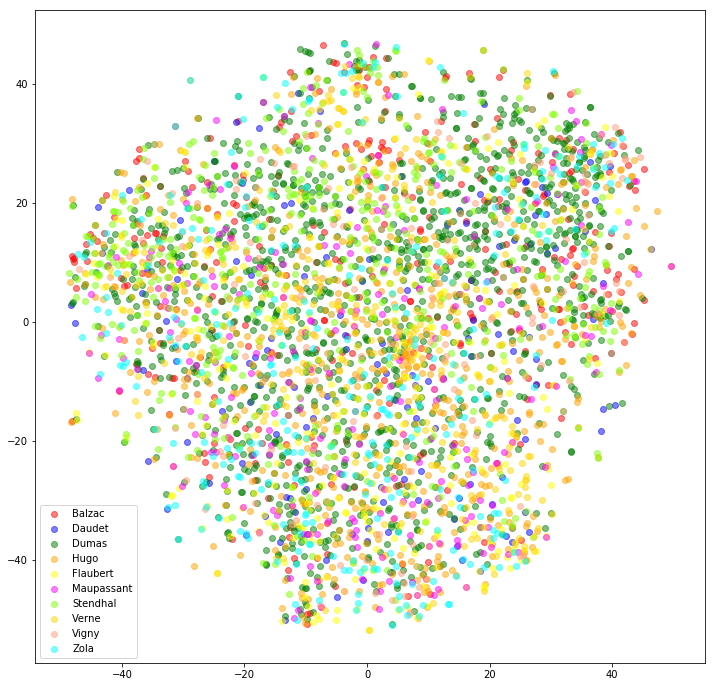

In [70]:
authors = df['author'].iloc[sample].values
authors_list = ['Balzac', 'Daudet', 'Dumas', 'Hugo', 'Flaubert', 'Maupassant', 'Stendhal', 'Verne', 'Vigny', 'Zola']
colors = ['red', 'blue', 'green', 'orange', 'yellow', 'magenta', 'chartreuse', 'gold', 'lightsalmon', 'cyan']

to_plot = authors_list

plt.figure(figsize=[12,12])
for i,author in enumerate(authors_list):
    if author in to_plot:
        plt.scatter(embeddings[authors==author,0], embeddings[authors==author,1], color=colors[i], label=author, alpha=0.5)
plt.legend()
plt.show()

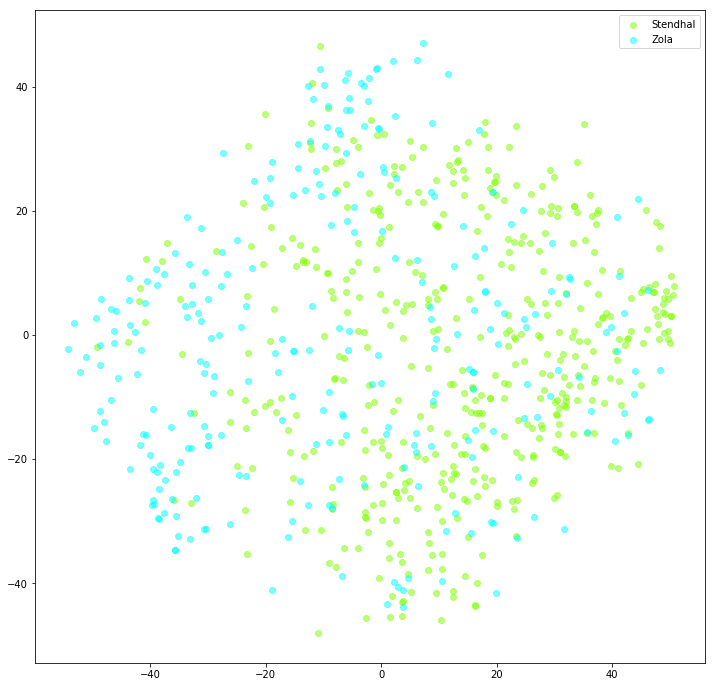

In [68]:
to_plot = ['Stendhal', 'Zola']

plt.figure(figsize=[12,12])
for i,author in enumerate(authors_list):
    if author in to_plot:
        plt.scatter(embeddings[authors==author,0], embeddings[authors==author,1], color=colors[i], label=author, alpha=0.5)
plt.legend()
plt.show()

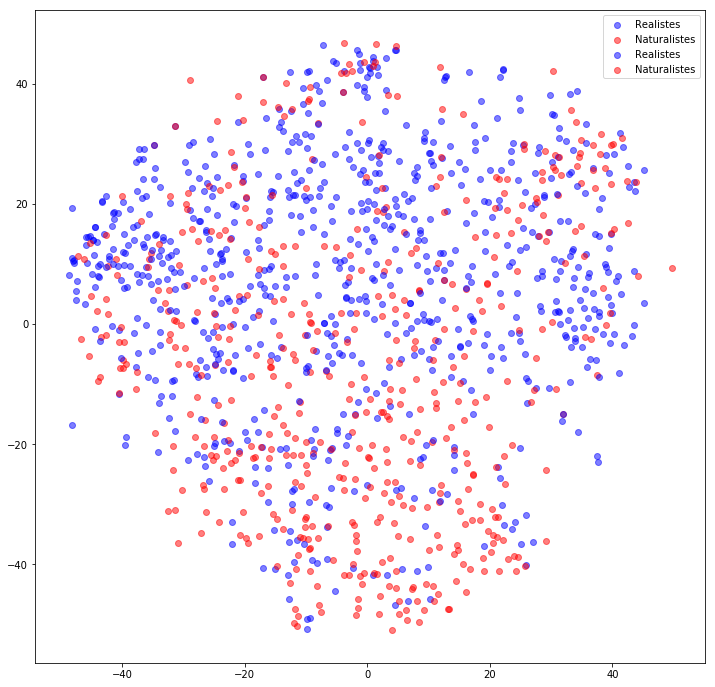

In [71]:
realistes = ['Stendhal', 'Balzac']
naturalistes = ['Zola', 'Maupassant']

plt.figure(figsize=[12,12])
for i,author in enumerate(authors_list):
    if author in realistes:
        plt.scatter(embeddings[authors==author,0], embeddings[authors==author,1], color='b', label='Realistes', alpha=0.5)
    if author in naturalistes:
        plt.scatter(embeddings[authors==author,0], embeddings[authors==author,1], color='r', label='Naturalistes', alpha=0.5)

plt.legend()
plt.show()

In [135]:
np.sum(documents_embedding, axis=1)

array([0.78271898, 0.97832629, 0.95333913, ..., 0.91797529, 0.85593913,
       0.85923562])

In [41]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs', multi_class='multinomial')

regressor.fit(documents_embedding, df['author'].values)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Regression with the features

In [42]:
predictions = regressor.predict(documents_embedding)

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(df['author'].values, predictions)

0.3266144722710788